<a href="https://colab.research.google.com/github/Pragu3704/NatyaAI/blob/main/RAPIDfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 24.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.3 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil
import os

source_path = '/content/drive/MyDrive/Dataset'  # Path to the extracted folder in Google Drive
destination_path = '/content/Dataset/'  # Path in Colab environment where you want to copy the folder

shutil.copytree(source_path, destination_path)

copied_files = os.listdir(destination_path)
print("Files copied to Colab:", copied_files)


Files copied to Colab: ['Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.02.15.931-00.02.39.843-seg03.mp4', 'vid7 - 7of26.mp4', 'vid 1 clip 12 - 5of12.mp4', 'vid 6 - 2of5.mp4', 'Odissi Mangalacharan - namami-00.05.49.427-00.06.08.662-seg09.mp4', 'Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.04.21.100-00.04.52.598-seg04.mp4', 'vid7 - 16of26.mp4', 'Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.01.40.288-00.02.11.145-seg02.mp4', 'Odissi Mangalacharan - namami-00.01.40.299-00.02.13.665-seg02.mp4', 'Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.13.00.779-00.13.41.647-seg21.mp4', 'Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.10.28.706-00.10.55.929-seg13.mp4', 'vid 2 clip 49 - 31of49.mp4', 'Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.11.25.523-00.11.56.341-seg21.mp4', 'Y2meta.app-Madhurashtakam by P

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import os
import math

# Initialize MediaPipe Pose module
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5)

def calculate_angle(a, b, c):
    # Calculate the angle between vectors ab and bc
    angle = math.degrees(math.atan2(c[1] - b[1], c[0] - b[0]) - math.atan2(a[1] - b[1], a[0] - b[0]))
    return angle + 360 if angle < 0 else angle

def extract_joint_angles(landmarks):
    # Define the joints for which you want to calculate angles
    joint_pairs = [(11, 13, 15),   # Left shoulder, elbow, wrist
                   (12, 14, 16),   # Right shoulder, elbow, wrist
                   (23, 25, 27),   # Left hip, knee, ankle
                   (24, 26, 28),   # Right hip, knee, ankle
                   (11, 23, 24),   # Left shoulder, left hip, right hip
                   (12, 24, 23),   # Right shoulder, right hip, left hip
                   (23, 11, 12),   # Left hip, left shoulder, right shoulder
                   (24, 12, 11),   # Right hip, right shoulder, left shoulder
                   (11, 12, 24),   # Left shoulder, right shoulder, right hip
                   (12, 11, 23)]   # Right shoulder, left shoulder, left hip

    angles = []

    for pair in joint_pairs:
        a = landmarks[pair[0]]
        b = landmarks[pair[1]]
        c = landmarks[pair[2]]
        angle = calculate_angle(a, b, c)
        angles.append(angle)

    return angles

def extract_poses(video_path):
    cap = cv2.VideoCapture(video_path)
    poses = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the BGR image to RGB
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Process the frame and get the pose landmarks
        results = pose.process(rgb_frame)

        if results.pose_landmarks:
            # Extract the x, y coordinates of each landmark
            landmarks = [(lm.x, lm.y) for lm in results.pose_landmarks.landmark]
            # Extract joint angles
            joint_angles = extract_joint_angles(landmarks)
            poses.append(joint_angles)

    cap.release()
    return np.array(poses)

def process_videos_in_directory(root_dir, output_dir):
  os.makedirs(output_dir, exist_ok=True)

  for subdir, _, files in os.walk(root_dir):
      for file in files:
          if file.lower().endswith(('.mp4')):  # Adjust the extensions if needed
              video_path = os.path.join(subdir, file)
              print(f'Processing video: {video_path}')

              # Extract joint angles
              video_angles = extract_poses(video_path)

              # Save the extracted joint angles to a .npy file
              output_path = os.path.join(output_dir, os.path.splitext(file)[0] + '_pose.npy')
              np.save(output_path, video_angles)
              print(f'Joint angles data shape for {file}: {video_angles.shape}')
              print(f'Joint angles data saved to: {output_path}')

process_videos_in_directory('/content/drive/MyDrive/Dataset', '/content/drive/MyDrive/Output_Pose')


Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.01.13.403-00.01.40.774-seg01.mp4


/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Joint angles data shape for Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.01.13.403-00.01.40.774-seg01.mp4: (800, 10)
Joint angles data saved to: /content/drive/MyDrive/Output_Pose/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.01.13.403-00.01.40.774-seg01_pose.npy
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.01.40.288-00.02.11.145-seg02.mp4
Joint angles data shape for Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.01.40.288-00.02.11.145-seg02.mp4: (1056, 10)
Joint angles data saved to: /content/drive/MyDrive/Output_Pose/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.01.40.288-00.02.11.145-seg02_pose.npy
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.

In [ ]:
import os
from moviepy.editor import VideoFileClip
import librosa
import numpy as np

def extract_audio_from_video(video_path, output_dir):
    # Extract audio from video
    video_clip = VideoFileClip(video_path)
    audio_path = os.path.join(output_dir, os.path.splitext(os.path.basename(video_path))[0] + '.wav')
    video_clip.audio.write_audiofile(audio_path, codec='pcm_s16le')
    return audio_path

def extract_audio_features(audio_path, sr=22050):
    y, sr = librosa.load(audio_path, sr=sr)

    # Extracting various audio features
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    chromagram = librosa.feature.chroma_stft(y=y, sr=sr)
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
    tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
    pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr)
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

    features = {
        'mfcc': mfccs,
        'chroma': chromagram,
        'spectral_contrast': spectral_contrast,
        'tonnetz': tonnetz,
        'tempo': tempo,
        'beat_frames': beat_frames,
        'pitches': pitches,
        'mel_spectrogram': mel_spectrogram
    }

    return features

In [ ]:
def process_videos_in_directory(root_dir, output_dir):
    # Make sure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Traverse the directory tree
    for subdir, _, files in os.walk(root_dir):
        for file in files:
            if file.lower().endswith(('.mp4')):  # Adjust the extensions if needed
                video_path = os.path.join(subdir, file)
                print(f'Processing video: {video_path}')
                # Extract audio from video
                audio_path = extract_audio_from_video(video_path, output_dir)
                print(f'Extracted audio to: {audio_path}')
                audio_features = extract_audio_features(audio_path)

                # Check if 'mel_spectrogram' is in the audio_features dictionary
                if 'mel_spectrogram' in audio_features:
                    print(f'Mel spectrogram shape for {file}: {audio_features["mel_spectrogram"].shape}')
                else:
                    print(f'Error: "mel_spectrogram" not found in audio features for {file}')

# Example usage
process_videos_in_directory('/content/drive/MyDrive/Dataset', '/content/drive/MyDrive/Output_Music')

Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.01.13.403-00.01.40.774-seg01.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.01.13.403-00.01.40.774-seg01.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.01.13.403-00.01.40.774-seg01.wav
Mel spectrogram shape for Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.01.13.403-00.01.40.774-seg01.mp4: (128, 1192)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.01.40.288-00.02.11.145-seg02.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.01.40.288-00.02.11.145-seg02.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.01.40.288-00.02.11.145-seg02.wav
Mel spectrogram shape for Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.01.40.288-00.02.11.145-seg02.mp4: (128, 1520)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.02.11.145-00.03.08.597-seg03.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.02.11.145-00.03.08.597-seg03.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.02.11.145-00.03.08.597-seg03.wav
Mel spectrogram shape for Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.02.11.145-00.03.08.597-seg03.mp4: (128, 2615)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.03.08.214-00.03.44.413-seg04.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.03.08.214-00.03.44.413-seg04.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.03.08.214-00.03.44.413-seg04.wav
Mel spectrogram shape for Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.03.08.214-00.03.44.413-seg04.mp4: (128, 1631)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.03.44.555-00.04.16.678-seg05.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.03.44.555-00.04.16.678-seg05.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.03.44.555-00.04.16.678-seg05.wav
Mel spectrogram shape for Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.03.44.555-00.04.16.678-seg05.mp4: (128, 1412)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.04.16.448-00.04.45.852-seg06.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.04.16.448-00.04.45.852-seg06.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.04.16.448-00.04.45.852-seg06.wav
Mel spectrogram shape for Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.04.16.448-00.04.45.852-seg06.mp4: (128, 1290)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.04.45.852-00.05.14.635-seg07.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.04.45.852-00.05.14.635-seg07.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.04.45.852-00.05.14.635-seg07.wav


Mel spectrogram shape for Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.04.45.852-00.05.14.635-seg07.mp4: (128, 1382)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.05.14.635-00.05.52.066-seg08.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.05.14.635-00.05.52.066-seg08.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.05.14.635-00.05.52.066-seg08.wav
Mel spectrogram shape for Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.05.14.635-00.05.52.066-seg08.mp4: (128, 1847)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.05.52.066-00.06.21.283-seg09.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.05.52.066-00.06.21.283-seg09.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.05.52.066-00.06.21.283-seg09.wav


Mel spectrogram shape for Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.05.52.066-00.06.21.283-seg09.mp4: (128, 1266)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.06.21.283-00.07.03.365-seg10.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.06.21.283-00.07.03.365-seg10.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.06.21.283-00.07.03.365-seg10.wav
Mel spectrogram shape for Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.06.21.283-00.07.03.365-seg10.mp4: (128, 1929)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.07.03.328-00.07.32.711-seg11.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.07.03.328-00.07.32.711-seg11.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.07.03.328-00.07.32.711-seg11.wav


Mel spectrogram shape for Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.07.03.328-00.07.32.711-seg11.mp4: (128, 1357)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.07.32.711-00.08.36.267-seg12.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.07.32.711-00.08.36.267-seg12.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.07.32.711-00.08.36.267-seg12.wav
Mel spectrogram shape for Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.07.32.711-00.08.36.267-seg12.mp4: (128, 2942)
Processing video: /content/drive/MyDrive/Dataset/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.01.16.283-00.01.47.282-seg01.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.01.16.283-00.01.47.282-seg01.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.01.16.283-00.01.47.282-seg01.wav
Mel spectrogram shape for Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.01.16.283-00.01.47.282-seg01.mp4: (128, 1544)
Processing video: /content/drive/MyDrive/Dataset/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.01.47.282-00.02.15.931-seg02.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.01.47.282-00.02.15.931-seg02.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.01.47.282-00.02.15.931-seg02.wav
Mel spectrogram shape for Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.01.47.282-00.02.15.931-seg02.mp4: (128, 1450)
Processing video: /content/drive/MyDrive/Dataset/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.02.15.931-00.02.39.843-seg03.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.02.15.931-00.02.39.843-seg03.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.02.15.931-00.02.39.843-seg03.wav


Mel spectrogram shape for Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.02.15.931-00.02.39.843-seg03.mp4: (128, 1157)
Processing video: /content/drive/MyDrive/Dataset/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.02.39.843-00.03.01.875-seg04.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.02.39.843-00.03.01.875-seg04.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.02.39.843-00.03.01.875-seg04.wav


Mel spectrogram shape for Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.02.39.843-00.03.01.875-seg04.mp4: (128, 1007)
Processing video: /content/drive/MyDrive/Dataset/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.03.01.562-00.03.28.111-seg05.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.03.01.562-00.03.28.111-seg05.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.03.01.562-00.03.28.111-seg05.wav


Mel spectrogram shape for Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.03.01.562-00.03.28.111-seg05.mp4: (128, 1254)
Processing video: /content/drive/MyDrive/Dataset/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.03.28.111-00.03.54.691-seg06.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.03.28.111-00.03.54.691-seg06.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.03.28.111-00.03.54.691-seg06.wav


Mel spectrogram shape for Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.03.28.111-00.03.54.691-seg06.mp4: (128, 1293)
Processing video: /content/drive/MyDrive/Dataset/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.03.54.691-00.04.16.833-seg07.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.03.54.691-00.04.16.833-seg07.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.03.54.691-00.04.16.833-seg07.wav


Mel spectrogram shape for Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.03.54.691-00.04.16.833-seg07.mp4: (128, 1149)
Processing video: /content/drive/MyDrive/Dataset/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.04.16.224-00.04.37.519-seg08.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.04.16.224-00.04.37.519-seg08.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.04.16.224-00.04.37.519-seg08.wav


Mel spectrogram shape for Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.04.16.224-00.04.37.519-seg08.mp4: (128, 935)
Processing video: /content/drive/MyDrive/Dataset/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.04.37.519-00.05.03.387-seg09.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.04.37.519-00.05.03.387-seg09.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.04.37.519-00.05.03.387-seg09.wav


Mel spectrogram shape for Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.04.37.519-00.05.03.387-seg09.mp4: (128, 1164)
Processing video: /content/drive/MyDrive/Dataset/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.05.03.387-00.05.29.450-seg10.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.05.03.387-00.05.29.450-seg10.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.05.03.387-00.05.29.450-seg10.wav


Mel spectrogram shape for Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.05.03.387-00.05.29.450-seg10.mp4: (128, 1185)
Processing video: /content/drive/MyDrive/Dataset/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.05.29.357-00.06.02.515-seg11.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.05.29.357-00.06.02.515-seg11.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.05.29.357-00.06.02.515-seg11.wav
Mel spectrogram shape for Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.05.29.357-00.06.02.515-seg11.mp4: (128, 1510)
Processing video: /content/drive/MyDrive/Dataset/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.06.02.515-00.06.37.737-seg12.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.06.02.515-00.06.37.737-seg12.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.06.02.515-00.06.37.737-seg12.wav
Mel spectrogram shape for Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.06.02.515-00.06.37.737-seg12.mp4: (128, 1699)
Processing video: /content/drive/MyDrive/Dataset/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.06.37.802-00.07.12.437-seg13.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.06.37.802-00.07.12.437-seg13.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.06.37.802-00.07.12.437-seg13.wav
Mel spectrogram shape for Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.06.37.802-00.07.12.437-seg13.mp4: (128, 1652)
Processing video: /content/drive/MyDrive/Dataset/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.07.12.257-00.07.30.930-seg14.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.07.12.257-00.07.30.930-seg14.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.07.12.257-00.07.30.930-seg14.wav


Mel spectrogram shape for Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.07.12.257-00.07.30.930-seg14.mp4: (128, 907)
Processing video: /content/drive/MyDrive/Dataset/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.07.30.930-00.08.01.373-seg15.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.07.30.930-00.08.01.373-seg15.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.07.30.930-00.08.01.373-seg15.wav
Mel spectrogram shape for Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.07.30.930-00.08.01.373-seg15.mp4: (128, 1334)
Processing video: /content/drive/MyDrive/Dataset/vid 1 clip 12 - 2of12.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 1 clip 12 - 2of12.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 1 clip 12 - 2of12.wav
Mel spectrogram shape for vid 1 clip 12 - 2of12.mp4: (128, 733)
Processing video: /content/drive/MyDrive/Dataset/vid 1 clip 12 - 3of12.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 1 clip 12 - 3of12.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 1 clip 12 - 3of12.wav
Mel spectrogram shape for vid 1 clip 12 - 3of12.mp4: (128, 2578)
Processing video: /content/drive/MyDrive/Dataset/vid 1 clip 12 - 4of12.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 1 clip 12 - 4of12.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 1 clip 12 - 4of12.wav
Mel spectrogram shape for vid 1 clip 12 - 4of12.mp4: (128, 938)
Processing video: /content/drive/MyDrive/Dataset/vid 1 clip 12 - 5of12.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 1 clip 12 - 5of12.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 1 clip 12 - 5of12.wav
Mel spectrogram shape for vid 1 clip 12 - 5of12.mp4: (128, 1942)
Processing video: /content/drive/MyDrive/Dataset/vid 1 clip 12 - 6of12.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 1 clip 12 - 6of12.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 1 clip 12 - 6of12.wav
Mel spectrogram shape for vid 1 clip 12 - 6of12.mp4: (128, 1854)
Processing video: /content/drive/MyDrive/Dataset/vid 1 clip 12 - 7of12.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 1 clip 12 - 7of12.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 1 clip 12 - 7of12.wav
Mel spectrogram shape for vid 1 clip 12 - 7of12.mp4: (128, 1122)
Processing video: /content/drive/MyDrive/Dataset/vid 1 clip 12 - 8of12.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 1 clip 12 - 8of12.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 1 clip 12 - 8of12.wav
Mel spectrogram shape for vid 1 clip 12 - 8of12.mp4: (128, 1337)
Processing video: /content/drive/MyDrive/Dataset/vid 1 clip 12 - 9of12.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 1 clip 12 - 9of12.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 1 clip 12 - 9of12.wav
Mel spectrogram shape for vid 1 clip 12 - 9of12.mp4: (128, 1165)
Processing video: /content/drive/MyDrive/Dataset/vid 1 clip 12 - 10of12.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 1 clip 12 - 10of12.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 1 clip 12 - 10of12.wav
Mel spectrogram shape for vid 1 clip 12 - 10of12.mp4: (128, 2586)
Processing video: /content/drive/MyDrive/Dataset/vid 1 clip 12 - 11of12.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 1 clip 12 - 11of12.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 1 clip 12 - 11of12.wav
Mel spectrogram shape for vid 1 clip 12 - 11of12.mp4: (128, 1208)
Processing video: /content/drive/MyDrive/Dataset/vid 1 clip 12 - 12of12.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 1 clip 12 - 12of12.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 1 clip 12 - 12of12.wav
Mel spectrogram shape for vid 1 clip 12 - 12of12.mp4: (128, 1671)
Processing video: /content/drive/MyDrive/Dataset/Odissi Mangalacharan - namami-00.01.04.996-00.01.40.342-seg01.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Odissi Mangalacharan - namami-00.01.04.996-00.01.40.342-seg01.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Odissi Mangalacharan - namami-00.01.04.996-00.01.40.342-seg01.wav
Mel spectrogram shape for Odissi Mangalacharan - namami-00.01.04.996-00.01.40.342-seg01.mp4: (128, 1586)
Processing video: /content/drive/MyDrive/Dataset/Odissi Mangalacharan - namami-00.01.40.299-00.02.13.665-seg02.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Odissi Mangalacharan - namami-00.01.40.299-00.02.13.665-seg02.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Odissi Mangalacharan - namami-00.01.40.299-00.02.13.665-seg02.wav
Mel spectrogram shape for Odissi Mangalacharan - namami-00.01.40.299-00.02.13.665-seg02.mp4: (128, 1629)
Processing video: /content/drive/MyDrive/Dataset/Odissi Mangalacharan - namami-00.02.13.361-00.02.59.769-seg03.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Odissi Mangalacharan - namami-00.02.13.361-00.02.59.769-seg03.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Odissi Mangalacharan - namami-00.02.13.361-00.02.59.769-seg03.wav
Mel spectrogram shape for Odissi Mangalacharan - namami-00.02.13.361-00.02.59.769-seg03.mp4: (128, 2013)
Processing video: /content/drive/MyDrive/Dataset/Odissi Mangalacharan - namami-00.02.59.769-00.03.26.303-seg04.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Odissi Mangalacharan - namami-00.02.59.769-00.03.26.303-seg04.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Odissi Mangalacharan - namami-00.02.59.769-00.03.26.303-seg04.wav
Mel spectrogram shape for Odissi Mangalacharan - namami-00.02.59.769-00.03.26.303-seg04.mp4: (128, 1325)
Processing video: /content/drive/MyDrive/Dataset/Odissi Mangalacharan - namami-00.03.26.379-00.03.59.402-seg05.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Odissi Mangalacharan - namami-00.03.26.379-00.03.59.402-seg05.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Odissi Mangalacharan - namami-00.03.26.379-00.03.59.402-seg05.wav
Mel spectrogram shape for Odissi Mangalacharan - namami-00.03.26.379-00.03.59.402-seg05.mp4: (128, 1597)
Processing video: /content/drive/MyDrive/Dataset/Odissi Mangalacharan - namami-00.03.59.402-00.04.30.339-seg06.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Odissi Mangalacharan - namami-00.03.59.402-00.04.30.339-seg06.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Odissi Mangalacharan - namami-00.03.59.402-00.04.30.339-seg06.wav
Mel spectrogram shape for Odissi Mangalacharan - namami-00.03.59.402-00.04.30.339-seg06.mp4: (128, 1557)
Processing video: /content/drive/MyDrive/Dataset/Odissi Mangalacharan - namami-00.04.30.339-00.05.11.831-seg07.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Odissi Mangalacharan - namami-00.04.30.339-00.05.11.831-seg07.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Odissi Mangalacharan - namami-00.04.30.339-00.05.11.831-seg07.wav
Mel spectrogram shape for Odissi Mangalacharan - namami-00.04.30.339-00.05.11.831-seg07.mp4: (128, 1956)
Processing video: /content/drive/MyDrive/Dataset/Odissi Mangalacharan - namami-00.05.11.831-00.05.49.291-seg08.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Odissi Mangalacharan - namami-00.05.11.831-00.05.49.291-seg08.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Odissi Mangalacharan - namami-00.05.11.831-00.05.49.291-seg08.wav
Mel spectrogram shape for Odissi Mangalacharan - namami-00.05.11.831-00.05.49.291-seg08.mp4: (128, 1729)
Processing video: /content/drive/MyDrive/Dataset/Odissi Mangalacharan - namami-00.05.49.427-00.06.08.662-seg09.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Odissi Mangalacharan - namami-00.05.49.427-00.06.08.662-seg09.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Odissi Mangalacharan - namami-00.05.49.427-00.06.08.662-seg09.wav
Mel spectrogram shape for Odissi Mangalacharan - namami-00.05.49.427-00.06.08.662-seg09.mp4: (128, 954)
Processing video: /content/drive/MyDrive/Dataset/Odissi Mangalacharan - namami-00.06.08.662-00.06.36.961-seg10.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Odissi Mangalacharan - namami-00.06.08.662-00.06.36.961-seg10.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Odissi Mangalacharan - namami-00.06.08.662-00.06.36.961-seg10.wav
Mel spectrogram shape for Odissi Mangalacharan - namami-00.06.08.662-00.06.36.961-seg10.mp4: (128, 1256)
Processing video: /content/drive/MyDrive/Dataset/Odissi Mangalacharan - namami-00.06.36.961-00.07.06.326-seg11.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Odissi Mangalacharan - namami-00.06.36.961-00.07.06.326-seg11.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Odissi Mangalacharan - namami-00.06.36.961-00.07.06.326-seg11.wav
Mel spectrogram shape for Odissi Mangalacharan - namami-00.06.36.961-00.07.06.326-seg11.mp4: (128, 1382)
Processing video: /content/drive/MyDrive/Dataset/Odissi Mangalacharan - namami-00.07.10.822-00.07.40.028-seg12.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Odissi Mangalacharan - namami-00.07.10.822-00.07.40.028-seg12.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Odissi Mangalacharan - namami-00.07.10.822-00.07.40.028-seg12.wav
Mel spectrogram shape for Odissi Mangalacharan - namami-00.07.10.822-00.07.40.028-seg12.mp4: (128, 1445)
Processing video: /content/drive/MyDrive/Dataset/Odissi Mangalacharan - namami-00.07.39.851-00.08.20.180-seg13.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Odissi Mangalacharan - namami-00.07.39.851-00.08.20.180-seg13.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Odissi Mangalacharan - namami-00.07.39.851-00.08.20.180-seg13.wav
Mel spectrogram shape for Odissi Mangalacharan - namami-00.07.39.851-00.08.20.180-seg13.mp4: (128, 1795)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.00.23.607-00.00.51.053-seg01.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.00.23.607-00.00.51.053-seg01.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.00.23.607-00.00.51.053-seg01.wav
Mel spectrogram shape for Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.00.23.607-00.00.51.053-seg01.mp4: (128, 1310)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.00.51.364-00.01.21.453-seg02.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.00.51.364-00.01.21.453-seg02.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.00.51.364-00.01.21.453-seg02.wav
Mel spectrogram shape for Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.00.51.364-00.01.21.453-seg02.mp4: (128, 1312)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.01.21.453-00.01.50.415-seg03.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.01.21.453-00.01.50.415-seg03.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.01.21.453-00.01.50.415-seg03.wav
Mel spectrogram shape for Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.01.21.453-00.01.50.415-seg03.mp4: (128, 1270)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.01.50.415-00.02.19.670-seg04.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.01.50.415-00.02.19.670-seg04.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.01.50.415-00.02.19.670-seg04.wav
Mel spectrogram shape for Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.01.50.415-00.02.19.670-seg04.mp4: (128, 1392)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.02.19.671-00.02.47.467-seg05.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.02.19.671-00.02.47.467-seg05.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.02.19.671-00.02.47.467-seg05.wav
Mel spectrogram shape for Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.02.19.671-00.02.47.467-seg05.mp4: (128, 1266)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.02.47.467-00.03.14.891-seg06.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.02.47.467-00.03.14.891-seg06.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.02.47.467-00.03.14.891-seg06.wav
Mel spectrogram shape for Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.02.47.467-00.03.14.891-seg06.mp4: (128, 1316)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.03.14.891-00.03.49.175-seg07.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.03.14.891-00.03.49.175-seg07.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.03.14.891-00.03.49.175-seg07.wav
Mel spectrogram shape for Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.03.14.891-00.03.49.175-seg07.mp4: (128, 1689)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.03.49.175-00.04.32.381-seg08.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.03.49.175-00.04.32.381-seg08.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.03.49.175-00.04.32.381-seg08.wav
Mel spectrogram shape for Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.03.49.175-00.04.32.381-seg08.mp4: (128, 2007)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.04.32.381-00.05.04.064-seg09.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.04.32.381-00.05.04.064-seg09.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.04.32.381-00.05.04.064-seg09.wav
Mel spectrogram shape for Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.04.32.381-00.05.04.064-seg09.mp4: (128, 1386)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.05.04.064-00.05.20.276-seg10.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.05.04.064-00.05.20.276-seg10.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.05.04.064-00.05.20.276-seg10.wav
Mel spectrogram shape for Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.05.04.064-00.05.20.276-seg10.mp4: (128, 761)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.05.20.276-00.06.03.667-seg11.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.05.20.276-00.06.03.667-seg11.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.05.20.276-00.06.03.667-seg11.wav
Mel spectrogram shape for Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.05.20.276-00.06.03.667-seg11.mp4: (128, 1969)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.06.03.667-00.06.43.139-seg12.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.06.03.667-00.06.43.139-seg12.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.06.03.667-00.06.43.139-seg12.wav
Mel spectrogram shape for Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.06.03.667-00.06.43.139-seg12.mp4: (128, 1714)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.06.43.139-00.07.22.977-seg13.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.06.43.139-00.07.22.977-seg13.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.06.43.139-00.07.22.977-seg13.wav
Mel spectrogram shape for Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.06.43.139-00.07.22.977-seg13.mp4: (128, 1914)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.07.22.977-00.07.48.382-seg14.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.07.22.977-00.07.48.382-seg14.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.07.22.977-00.07.48.382-seg14.wav
Mel spectrogram shape for Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.07.22.977-00.07.48.382-seg14.mp4: (128, 1102)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.07.48.382-00.08.25.728-seg15.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.07.48.382-00.08.25.728-seg15.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.07.48.382-00.08.25.728-seg15.wav
Mel spectrogram shape for Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.07.48.382-00.08.25.728-seg15.mp4: (128, 1749)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.08.25.728-00.09.12.965-seg16.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.08.25.728-00.09.12.965-seg16.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.08.25.728-00.09.12.965-seg16.wav
Mel spectrogram shape for Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.08.25.728-00.09.12.965-seg16.mp4: (128, 2241)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.09.12.965-00.09.52.719-seg17.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.09.12.965-00.09.52.719-seg17.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.09.12.965-00.09.52.719-seg17.wav
Mel spectrogram shape for Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.09.12.965-00.09.52.719-seg17.mp4: (128, 1771)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.10.04.264-00.10.18.591-seg18.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.10.04.264-00.10.18.591-seg18.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.10.04.264-00.10.18.591-seg18.wav
Mel spectrogram shape for Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.10.04.264-00.10.18.591-seg18.mp4: (128, 630)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.10.28.921-00.10.53.837-seg19.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.10.28.921-00.10.53.837-seg19.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.10.28.921-00.10.53.837-seg19.wav
Mel spectrogram shape for Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.10.28.921-00.10.53.837-seg19.mp4: (128, 1124)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.10.53.837-00.11.25.523-seg20.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.10.53.837-00.11.25.523-seg20.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.10.53.837-00.11.25.523-seg20.wav
Mel spectrogram shape for Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.10.53.837-00.11.25.523-seg20.mp4: (128, 1388)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.11.25.523-00.11.56.341-seg21.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.11.25.523-00.11.56.341-seg21.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.11.25.523-00.11.56.341-seg21.wav
Mel spectrogram shape for Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.11.25.523-00.11.56.341-seg21.mp4: (128, 1343)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.11.56.341-00.12.24.305-seg22.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.11.56.341-00.12.24.305-seg22.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.11.56.341-00.12.24.305-seg22.wav
Mel spectrogram shape for Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.11.56.341-00.12.24.305-seg22.mp4: (128, 1272)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.12.24.305-00.13.06.520-seg23.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.12.24.305-00.13.06.520-seg23.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.12.24.305-00.13.06.520-seg23.wav
Mel spectrogram shape for Y2meta.app-Pallavi... Odissi by Sujata Mohapatra and Choreographed by Guru Kelucharan Mohapatra-(480p)-00.12.24.305-00.13.06.520-seg23.mp4: (128, 1985)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 1of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 1of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 1of49.wav
Mel spectrogram shape for vid 2 clip 49 - 1of49.mp4: (128, 1833)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 2of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 2of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 2of49.wav
Mel spectrogram shape for vid 2 clip 49 - 2of49.mp4: (128, 2150)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 4of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 4of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 4of49.wav
Mel spectrogram shape for vid 2 clip 49 - 4of49.mp4: (128, 2712)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 5of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 5of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 5of49.wav
Mel spectrogram shape for vid 2 clip 49 - 5of49.mp4: (128, 954)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 6of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 6of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 6of49.wav
Mel spectrogram shape for vid 2 clip 49 - 6of49.mp4: (128, 1553)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 7of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 7of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 7of49.wav
Mel spectrogram shape for vid 2 clip 49 - 7of49.mp4: (128, 1553)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 9of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 9of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 9of49.wav
Mel spectrogram shape for vid 2 clip 49 - 9of49.mp4: (128, 2245)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 10of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 10of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 10of49.wav
Mel spectrogram shape for vid 2 clip 49 - 10of49.mp4: (128, 2590)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 11of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 11of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 11of49.wav
Mel spectrogram shape for vid 2 clip 49 - 11of49.mp4: (128, 2240)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 12of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 12of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 12of49.wav
Mel spectrogram shape for vid 2 clip 49 - 12of49.mp4: (128, 3060)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 13of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 13of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 13of49.wav
Mel spectrogram shape for vid 2 clip 49 - 13of49.mp4: (128, 1811)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 14of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 14of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 14of49.wav
Mel spectrogram shape for vid 2 clip 49 - 14of49.mp4: (128, 1420)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 15of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 15of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 15of49.wav
Mel spectrogram shape for vid 2 clip 49 - 15of49.mp4: (128, 1596)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 16of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 16of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 16of49.wav
Mel spectrogram shape for vid 2 clip 49 - 16of49.mp4: (128, 1208)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 17of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 17of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 17of49.wav
Mel spectrogram shape for vid 2 clip 49 - 17of49.mp4: (128, 993)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 18of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 18of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 18of49.wav
Mel spectrogram shape for vid 2 clip 49 - 18of49.mp4: (128, 950)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 19of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 19of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 19of49.wav
Mel spectrogram shape for vid 2 clip 49 - 19of49.mp4: (128, 2156)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 20of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 20of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 20of49.wav
Mel spectrogram shape for vid 2 clip 49 - 20of49.mp4: (128, 864)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 21of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 21of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 21of49.wav
Mel spectrogram shape for vid 2 clip 49 - 21of49.mp4: (128, 2069)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 22of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 22of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 22of49.wav
Mel spectrogram shape for vid 2 clip 49 - 22of49.mp4: (128, 3577)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 23of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 23of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 23of49.wav
Mel spectrogram shape for vid 2 clip 49 - 23of49.mp4: (128, 1983)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 24of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 24of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 24of49.wav
Mel spectrogram shape for vid 2 clip 49 - 24of49.mp4: (128, 2156)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 25of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 25of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 25of49.wav
Mel spectrogram shape for vid 2 clip 49 - 25of49.mp4: (128, 4395)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 26of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 26of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 26of49.wav
Mel spectrogram shape for vid 2 clip 49 - 26of49.mp4: (128, 1725)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 27of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 27of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 27of49.wav
Mel spectrogram shape for vid 2 clip 49 - 27of49.mp4: (128, 2286)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 28of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 28of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 28of49.wav
Mel spectrogram shape for vid 2 clip 49 - 28of49.mp4: (128, 1682)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 29of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 29of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 29of49.wav
Mel spectrogram shape for vid 2 clip 49 - 29of49.mp4: (128, 2199)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 30of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 30of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 30of49.wav
Mel spectrogram shape for vid 2 clip 49 - 30of49.mp4: (128, 2629)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 31of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 31of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 31of49.wav
Mel spectrogram shape for vid 2 clip 49 - 31of49.mp4: (128, 2500)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 32of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 32of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 32of49.wav
Mel spectrogram shape for vid 2 clip 49 - 32of49.mp4: (128, 1596)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 33of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 33of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 33of49.wav
Mel spectrogram shape for vid 2 clip 49 - 33of49.mp4: (128, 1165)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 34of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 34of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 34of49.wav
Mel spectrogram shape for vid 2 clip 49 - 34of49.mp4: (128, 347)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 35of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 35of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 35of49.wav
Mel spectrogram shape for vid 2 clip 49 - 35of49.mp4: (128, 1682)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 36of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 36of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 36of49.wav
Mel spectrogram shape for vid 2 clip 49 - 36of49.mp4: (128, 1682)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 37of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 37of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 37of49.wav
Mel spectrogram shape for vid 2 clip 49 - 37of49.mp4: (128, 1940)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 38of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 38of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 38of49.wav
Mel spectrogram shape for vid 2 clip 49 - 38of49.mp4: (128, 1079)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 39of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 39of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 39of49.wav
Mel spectrogram shape for vid 2 clip 49 - 39of49.mp4: (128, 777)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 40of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 40of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 40of49.wav
Mel spectrogram shape for vid 2 clip 49 - 40of49.mp4: (128, 1294)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 41of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 41of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 41of49.wav


Mel spectrogram shape for vid 2 clip 49 - 41of49.mp4: (128, 1294)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 42of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 42of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 42of49.wav
Mel spectrogram shape for vid 2 clip 49 - 42of49.mp4: (128, 1165)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 43of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 43of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 43of49.wav
Mel spectrogram shape for vid 2 clip 49 - 43of49.mp4: (128, 1208)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 44of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 44of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 44of49.wav
Mel spectrogram shape for vid 2 clip 49 - 44of49.mp4: (128, 1596)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 45of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 45of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 45of49.wav


Mel spectrogram shape for vid 2 clip 49 - 45of49.mp4: (128, 1208)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 46of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 46of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 46of49.wav
Mel spectrogram shape for vid 2 clip 49 - 46of49.mp4: (128, 1165)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 47of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 47of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 47of49.wav
Mel spectrogram shape for vid 2 clip 49 - 47of49.mp4: (128, 2414)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 48of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 48of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 48of49.wav
Mel spectrogram shape for vid 2 clip 49 - 48of49.mp4: (128, 2069)
Processing video: /content/drive/MyDrive/Dataset/vid 2 clip 49 - 49of49.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 49of49.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 2 clip 49 - 49of49.wav
Mel spectrogram shape for vid 2 clip 49 - 49of49.mp4: (128, 691)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.00.06.983-00.00.38.256-seg01.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.00.06.983-00.00.38.256-seg01.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.00.06.983-00.00.38.256-seg01.wav
Mel spectrogram shape for Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.00.06.983-00.00.38.256-seg01.mp4: (128, 1436)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.00.38.144-00.01.08.774-seg02.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.00.38.144-00.01.08.774-seg02.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.00.38.144-00.01.08.774-seg02.wav
Mel spectrogram shape for Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.00.38.144-00.01.08.774-seg02.mp4: (128, 1424)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.01.08.774-00.02.01.046-seg03.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.01.08.774-00.02.01.046-seg03.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.01.08.774-00.02.01.046-seg03.wav
Mel spectrogram shape for Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.01.08.774-00.02.01.046-seg03.mp4: (128, 2353)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.02.01.046-00.02.33.074-seg04.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.02.01.046-00.02.33.074-seg04.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.02.01.046-00.02.33.074-seg04.wav
Mel spectrogram shape for Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.02.01.046-00.02.33.074-seg04.mp4: (128, 1528)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.02.33.074-00.03.13.313-seg05.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.02.33.074-00.03.13.313-seg05.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.02.33.074-00.03.13.313-seg05.wav
Mel spectrogram shape for Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.02.33.074-00.03.13.313-seg05.mp4: (128, 1936)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.03.13.313-00.03.51.127-seg06.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.03.13.313-00.03.51.127-seg06.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.03.13.313-00.03.51.127-seg06.wav
Mel spectrogram shape for Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.03.13.313-00.03.51.127-seg06.mp4: (128, 1803)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.03.51.127-00.04.38.634-seg07.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.03.51.127-00.04.38.634-seg07.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.03.51.127-00.04.38.634-seg07.wav
Mel spectrogram shape for Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.03.51.127-00.04.38.634-seg07.mp4: (128, 2082)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.04.38.634-00.05.19.291-seg08.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.04.38.634-00.05.19.291-seg08.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.04.38.634-00.05.19.291-seg08.wav
Mel spectrogram shape for Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.04.38.634-00.05.19.291-seg08.mp4: (128, 1849)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.05.19.291-00.05.47.338-seg09.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.05.19.291-00.05.47.338-seg09.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.05.19.291-00.05.47.338-seg09.wav


Mel spectrogram shape for Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.05.19.291-00.05.47.338-seg09.mp4: (128, 1296)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.05.47.338-00.06.24.398-seg10.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.05.47.338-00.06.24.398-seg10.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.05.47.338-00.06.24.398-seg10.wav
Mel spectrogram shape for Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.05.47.338-00.06.24.398-seg10.mp4: (128, 1786)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.06.24.569-00.06.59.246-seg11.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.06.24.569-00.06.59.246-seg11.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.06.24.569-00.06.59.246-seg11.wav
Mel spectrogram shape for Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.06.24.569-00.06.59.246-seg11.mp4: (128, 1528)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.06.59.246-00.07.34.576-seg12.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.06.59.246-00.07.34.576-seg12.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.06.59.246-00.07.34.576-seg12.wav
Mel spectrogram shape for Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.06.59.246-00.07.34.576-seg12.mp4: (128, 1601)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.07.34.576-00.08.09.483-seg13.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.07.34.576-00.08.09.483-seg13.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.07.34.576-00.08.09.483-seg13.wav
Mel spectrogram shape for Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.07.34.576-00.08.09.483-seg13.mp4: (128, 1682)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.08.09.483-00.08.57.332-seg14.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.08.09.483-00.08.57.332-seg14.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.08.09.483-00.08.57.332-seg14.wav
Mel spectrogram shape for Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.08.09.483-00.08.57.332-seg14.mp4: (128, 2201)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.08.57.332-00.09.37.746-seg15.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.08.57.332-00.09.37.746-seg15.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.08.57.332-00.09.37.746-seg15.wav
Mel spectrogram shape for Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.08.57.332-00.09.37.746-seg15.mp4: (128, 1956)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.09.37.746-00.10.15.123-seg16.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.09.37.746-00.10.15.123-seg16.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.09.37.746-00.10.15.123-seg16.wav
Mel spectrogram shape for Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.09.37.746-00.10.15.123-seg16.mp4: (128, 1805)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.10.15.123-00.10.55.800-seg17.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.10.15.123-00.10.55.800-seg17.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.10.15.123-00.10.55.800-seg17.wav
Mel spectrogram shape for Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.10.15.123-00.10.55.800-seg17.mp4: (128, 1791)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.10.55.800-00.11.41.520-seg18.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.10.55.800-00.11.41.520-seg18.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.10.55.800-00.11.41.520-seg18.wav
Mel spectrogram shape for Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.10.55.800-00.11.41.520-seg18.mp4: (128, 1994)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.11.41.520-00.12.20.555-seg19.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.11.41.520-00.12.20.555-seg19.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.11.41.520-00.12.20.555-seg19.wav
Mel spectrogram shape for Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.11.41.520-00.12.20.555-seg19.mp4: (128, 1691)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.12.20.555-00.13.00.779-seg20.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.12.20.555-00.13.00.779-seg20.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.12.20.555-00.13.00.779-seg20.wav
Mel spectrogram shape for Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.12.20.555-00.13.00.779-seg20.mp4: (128, 1880)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.13.00.779-00.13.41.647-seg21.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.13.00.779-00.13.41.647-seg21.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.13.00.779-00.13.41.647-seg21.wav
Mel spectrogram shape for Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.13.00.779-00.13.41.647-seg21.mp4: (128, 1875)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.13.41.647-00.14.53.371-seg22.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.13.41.647-00.14.53.371-seg22.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.13.41.647-00.14.53.371-seg22.wav
Mel spectrogram shape for Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.13.41.647-00.14.53.371-seg22.mp4: (128, 3200)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.14.53.371-00.15.42.705-seg23.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.14.53.371-00.15.42.705-seg23.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.14.53.371-00.15.42.705-seg23.wav
Mel spectrogram shape for Y2meta.app-Madhurashtakam by Purnata Mohanty-(1080p)-00.14.53.371-00.15.42.705-seg23.mp4: (128, 2237)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.00.20.510-00.00.50.039-seg01.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.00.20.510-00.00.50.039-seg01.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.00.20.510-00.00.50.039-seg01.wav
Mel spectrogram shape for Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.00.20.510-00.00.50.039-seg01.mp4: (128, 1277)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.00.50.039-00.01.19.966-seg02.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.00.50.039-00.01.19.966-seg02.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.00.50.039-00.01.19.966-seg02.wav
Mel spectrogram shape for Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.00.50.039-00.01.19.966-seg02.mp4: (128, 1466)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.01.19.966-00.01.48.371-seg03.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.01.19.966-00.01.48.371-seg03.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.01.19.966-00.01.48.371-seg03.wav
Mel spectrogram shape for Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.01.19.966-00.01.48.371-seg03.mp4: (128, 1366)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.01.48.371-00.02.18.720-seg04.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.01.48.371-00.02.18.720-seg04.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.01.48.371-00.02.18.720-seg04.wav


Mel spectrogram shape for Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.01.48.371-00.02.18.720-seg04.mp4: (128, 1348)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.02.18.720-00.02.53.139-seg05.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.02.18.720-00.02.53.139-seg05.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.02.18.720-00.02.53.139-seg05.wav
Mel spectrogram shape for Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.02.18.720-00.02.53.139-seg05.mp4: (128, 1506)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.02.53.139-00.03.39.008-seg06.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.02.53.139-00.03.39.008-seg06.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.02.53.139-00.03.39.008-seg06.wav
Mel spectrogram shape for Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.02.53.139-00.03.39.008-seg06.mp4: (128, 2162)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.03.39.008-00.04.24.278-seg07.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.03.39.008-00.04.24.278-seg07.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.03.39.008-00.04.24.278-seg07.wav
Mel spectrogram shape for Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.03.39.008-00.04.24.278-seg07.mp4: (128, 2124)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.04.24.278-00.05.05.797-seg08.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.04.24.278-00.05.05.797-seg08.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.04.24.278-00.05.05.797-seg08.wav
Mel spectrogram shape for Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.04.24.278-00.05.05.797-seg08.mp4: (128, 1931)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.05.05.797-00.05.41.318-seg09.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.05.05.797-00.05.41.318-seg09.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.05.05.797-00.05.41.318-seg09.wav
Mel spectrogram shape for Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.05.05.797-00.05.41.318-seg09.mp4: (128, 1696)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.05.41.318-00.06.12.112-seg10.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.05.41.318-00.06.12.112-seg10.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.05.41.318-00.06.12.112-seg10.wav
Mel spectrogram shape for Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.05.41.318-00.06.12.112-seg10.mp4: (128, 1477)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.06.12.112-00.06.43.393-seg11.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.06.12.112-00.06.43.393-seg11.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.06.12.112-00.06.43.393-seg11.wav
Mel spectrogram shape for Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.06.12.112-00.06.43.393-seg11.mp4: (128, 1499)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.06.43.393-00.07.15.732-seg12.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.06.43.393-00.07.15.732-seg12.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.06.43.393-00.07.15.732-seg12.wav
Mel spectrogram shape for Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.06.43.393-00.07.15.732-seg12.mp4: (128, 1572)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.07.15.732-00.07.42.087-seg13.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.07.15.732-00.07.42.087-seg13.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.07.15.732-00.07.42.087-seg13.wav


Mel spectrogram shape for Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.07.15.732-00.07.42.087-seg13.mp4: (128, 1163)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.07.42.087-00.08.27.341-seg14.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.07.42.087-00.08.27.341-seg14.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.07.42.087-00.08.27.341-seg14.wav
Mel spectrogram shape for Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.07.42.087-00.08.27.341-seg14.mp4: (128, 2007)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.08.27.341-00.09.00.801-seg15.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.08.27.341-00.09.00.801-seg15.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.08.27.341-00.09.00.801-seg15.wav
Mel spectrogram shape for Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.08.27.341-00.09.00.801-seg15.mp4: (128, 1468)
Processing video: /content/drive/MyDrive/Dataset/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.09.00.801-00.09.45.216-seg16.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.09.00.801-00.09.45.216-seg16.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.09.00.801-00.09.45.216-seg16.wav
Mel spectrogram shape for Y2meta.app-IHC CONTINUUM_ Yugmadwanda Pallavi by Odissi-exponent Sujata Mohapatra-(1080p50)-00.09.00.801-00.09.45.216-seg16.mp4: (128, 1921)
Processing video: /content/drive/MyDrive/Dataset/vid 6 - 1of5.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 6 - 1of5.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 6 - 1of5.wav
Mel spectrogram shape for vid 6 - 1of5.mp4: (128, 1542)
Processing video: /content/drive/MyDrive/Dataset/vid 6 - 2of5.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 6 - 2of5.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 6 - 2of5.wav
Mel spectrogram shape for vid 6 - 2of5.mp4: (128, 752)
Processing video: /content/drive/MyDrive/Dataset/vid 6 - 3of5.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 6 - 3of5.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 6 - 3of5.wav
Mel spectrogram shape for vid 6 - 3of5.mp4: (128, 950)
Processing video: /content/drive/MyDrive/Dataset/vid 6 - 4of5.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 6 - 4of5.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 6 - 4of5.wav
Mel spectrogram shape for vid 6 - 4of5.mp4: (128, 907)
Processing video: /content/drive/MyDrive/Dataset/vid 6 - 5of5.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid 6 - 5of5.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid 6 - 5of5.wav
Mel spectrogram shape for vid 6 - 5of5.mp4: (128, 1251)
Processing video: /content/drive/MyDrive/Dataset/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.02.26.559-00.03.02.258-seg01.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.02.26.559-00.03.02.258-seg01.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.02.26.559-00.03.02.258-seg01.wav
Mel spectrogram shape for Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.02.26.559-00.03.02.258-seg01.mp4: (128, 1681)
Processing video: /content/drive/MyDrive/Dataset/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.03.02.258-00.03.31.829-seg02.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.03.02.258-00.03.31.829-seg02.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.03.02.258-00.03.31.829-seg02.wav
Mel spectrogram shape for Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.03.02.258-00.03.31.829-seg02.mp4: (128, 1410)
Processing video: /content/drive/MyDrive/Dataset/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.03.31.829-00.04.21.100-seg03.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.03.31.829-00.04.21.100-seg03.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.03.31.829-00.04.21.100-seg03.wav
Mel spectrogram shape for Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.03.31.829-00.04.21.100-seg03.mp4: (128, 2210)
Processing video: /content/drive/MyDrive/Dataset/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.04.21.100-00.04.52.598-seg04.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.04.21.100-00.04.52.598-seg04.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.04.21.100-00.04.52.598-seg04.wav
Mel spectrogram shape for Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.04.21.100-00.04.52.598-seg04.mp4: (128, 1582)
Processing video: /content/drive/MyDrive/Dataset/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.04.52.598-00.05.26.803-seg05.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.04.52.598-00.05.26.803-seg05.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.04.52.598-00.05.26.803-seg05.wav
Mel spectrogram shape for Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.04.52.598-00.05.26.803-seg05.mp4: (128, 1514)
Processing video: /content/drive/MyDrive/Dataset/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.05.26.803-00.06.08.169-seg06.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.05.26.803-00.06.08.169-seg06.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.05.26.803-00.06.08.169-seg06.wav
Mel spectrogram shape for Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.05.26.803-00.06.08.169-seg06.mp4: (128, 1972)
Processing video: /content/drive/MyDrive/Dataset/vid7 - 1of26.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid7 - 1of26.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid7 - 1of26.wav
Mel spectrogram shape for vid7 - 1of26.mp4: (128, 758)
Processing video: /content/drive/MyDrive/Dataset/vid7 - 2of26.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid7 - 2of26.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid7 - 2of26.wav
Mel spectrogram shape for vid7 - 2of26.mp4: (128, 974)
Processing video: /content/drive/MyDrive/Dataset/vid7 - 3of26.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid7 - 3of26.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid7 - 3of26.wav
Mel spectrogram shape for vid7 - 3of26.mp4: (128, 1682)
Processing video: /content/drive/MyDrive/Dataset/vid7 - 4of26.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid7 - 4of26.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid7 - 4of26.wav
Mel spectrogram shape for vid7 - 4of26.mp4: (128, 907)
Processing video: /content/drive/MyDrive/Dataset/vid7 - 5of26.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid7 - 5of26.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid7 - 5of26.wav
Mel spectrogram shape for vid7 - 5of26.mp4: (128, 950)
Processing video: /content/drive/MyDrive/Dataset/vid7 - 6of26.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid7 - 6of26.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid7 - 6of26.wav
Mel spectrogram shape for vid7 - 6of26.mp4: (128, 1122)
Processing video: /content/drive/MyDrive/Dataset/vid7 - 7of26.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid7 - 7of26.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid7 - 7of26.wav
Mel spectrogram shape for vid7 - 7of26.mp4: (128, 907)
Processing video: /content/drive/MyDrive/Dataset/vid7 - 8of26.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid7 - 8of26.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid7 - 8of26.wav
Mel spectrogram shape for vid7 - 8of26.mp4: (128, 1165)
Processing video: /content/drive/MyDrive/Dataset/vid7 - 9of26.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid7 - 9of26.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid7 - 9of26.wav
Mel spectrogram shape for vid7 - 9of26.mp4: (128, 1122)
Processing video: /content/drive/MyDrive/Dataset/vid7 - 10of26.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid7 - 10of26.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid7 - 10of26.wav
Mel spectrogram shape for vid7 - 10of26.mp4: (128, 1122)
Processing video: /content/drive/MyDrive/Dataset/vid7 - 11of26.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid7 - 11of26.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid7 - 11of26.wav
Mel spectrogram shape for vid7 - 11of26.mp4: (128, 1079)
Processing video: /content/drive/MyDrive/Dataset/vid7 - 12of26.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid7 - 12of26.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid7 - 12of26.wav
Mel spectrogram shape for vid7 - 12of26.mp4: (128, 1553)
Processing video: /content/drive/MyDrive/Dataset/vid7 - 13of26.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid7 - 13of26.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid7 - 13of26.wav
Mel spectrogram shape for vid7 - 13of26.mp4: (128, 1208)
Processing video: /content/drive/MyDrive/Dataset/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.06.08.169-00.06.49.706-seg07.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.06.08.169-00.06.49.706-seg07.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.06.08.169-00.06.49.706-seg07.wav
Mel spectrogram shape for Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.06.08.169-00.06.49.706-seg07.mp4: (128, 1996)
Processing video: /content/drive/MyDrive/Dataset/vid7 - 14of26.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid7 - 14of26.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid7 - 14of26.wav
Mel spectrogram shape for vid7 - 14of26.mp4: (128, 1337)
Processing video: /content/drive/MyDrive/Dataset/vid7 - 15of26.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid7 - 15of26.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid7 - 15of26.wav
Mel spectrogram shape for vid7 - 15of26.mp4: (128, 1036)
Processing video: /content/drive/MyDrive/Dataset/vid7 - 16of26.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid7 - 16of26.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid7 - 16of26.wav
Mel spectrogram shape for vid7 - 16of26.mp4: (128, 1854)
Processing video: /content/drive/MyDrive/Dataset/vid7 - 17of26.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid7 - 17of26.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid7 - 17of26.wav
Mel spectrogram shape for vid7 - 17of26.mp4: (128, 1079)
Processing video: /content/drive/MyDrive/Dataset/vid7 - 18of26.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid7 - 18of26.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid7 - 18of26.wav
Mel spectrogram shape for vid7 - 18of26.mp4: (128, 1079)
Processing video: /content/drive/MyDrive/Dataset/vid7 - 19of26.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid7 - 19of26.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid7 - 19of26.wav
Mel spectrogram shape for vid7 - 19of26.mp4: (128, 993)
Processing video: /content/drive/MyDrive/Dataset/vid7 - 20of26.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid7 - 20of26.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid7 - 20of26.wav
Mel spectrogram shape for vid7 - 20of26.mp4: (128, 993)
Processing video: /content/drive/MyDrive/Dataset/vid7 - 21of26.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid7 - 21of26.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid7 - 21of26.wav
Mel spectrogram shape for vid7 - 21of26.mp4: (128, 1079)
Processing video: /content/drive/MyDrive/Dataset/vid7 - 22of26.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid7 - 22of26.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid7 - 22of26.wav
Mel spectrogram shape for vid7 - 22of26.mp4: (128, 1165)
Processing video: /content/drive/MyDrive/Dataset/vid7 - 23of26.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid7 - 23of26.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid7 - 23of26.wav
Mel spectrogram shape for vid7 - 23of26.mp4: (128, 1165)
Processing video: /content/drive/MyDrive/Dataset/vid7 - 24of26.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid7 - 24of26.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid7 - 24of26.wav
Mel spectrogram shape for vid7 - 24of26.mp4: (128, 1811)
Processing video: /content/drive/MyDrive/Dataset/vid7 - 25of26.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid7 - 25of26.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid7 - 25of26.wav
Mel spectrogram shape for vid7 - 25of26.mp4: (128, 2371)
Processing video: /content/drive/MyDrive/Dataset/vid7 - 26of26.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/vid7 - 26of26.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/vid7 - 26of26.wav
Mel spectrogram shape for vid7 - 26of26.mp4: (128, 1811)
Processing video: /content/drive/MyDrive/Dataset/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.06.49.706-00.07.21.163-seg08.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.06.49.706-00.07.21.163-seg08.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.06.49.706-00.07.21.163-seg08.wav
Mel spectrogram shape for Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.06.49.706-00.07.21.163-seg08.mp4: (128, 1365)
Processing video: /content/drive/MyDrive/Dataset/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.07.21.436-00.08.18.575-seg09.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.07.21.436-00.08.18.575-seg09.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.07.21.436-00.08.18.575-seg09.wav
Mel spectrogram shape for Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.07.21.436-00.08.18.575-seg09.mp4: (128, 2514)
Processing video: /content/drive/MyDrive/Dataset/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.08.18.575-00.09.02.055-seg10.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.08.18.575-00.09.02.055-seg10.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.08.18.575-00.09.02.055-seg10.wav
Mel spectrogram shape for Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.08.18.575-00.09.02.055-seg10.mp4: (128, 1963)
Processing video: /content/drive/MyDrive/Dataset/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.09.02.055-00.09.49.457-seg11.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.09.02.055-00.09.49.457-seg11.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.09.02.055-00.09.49.457-seg11.wav
Mel spectrogram shape for Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.09.02.055-00.09.49.457-seg11.mp4: (128, 2244)
Processing video: /content/drive/MyDrive/Dataset/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.09.49.457-00.10.28.826-seg12.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.09.49.457-00.10.28.826-seg12.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.09.49.457-00.10.28.826-seg12.wav
Mel spectrogram shape for Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.09.49.457-00.10.28.826-seg12.mp4: (128, 1731)
Processing video: /content/drive/MyDrive/Dataset/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.10.28.706-00.10.55.929-seg13.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.10.28.706-00.10.55.929-seg13.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.10.28.706-00.10.55.929-seg13.wav
Mel spectrogram shape for Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.10.28.706-00.10.55.929-seg13.mp4: (128, 1355)
Processing video: /content/drive/MyDrive/Dataset/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.10.55.929-00.11.27.987-seg14.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.10.55.929-00.11.27.987-seg14.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.10.55.929-00.11.27.987-seg14.wav
Mel spectrogram shape for Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.10.55.929-00.11.27.987-seg14.mp4: (128, 1410)
Processing video: /content/drive/MyDrive/Dataset/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.11.27.987-00.12.05.757-seg15.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.11.27.987-00.12.05.757-seg15.wav


MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.11.27.987-00.12.05.757-seg15.wav
Mel spectrogram shape for Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.11.27.987-00.12.05.757-seg15.mp4: (128, 1713)
Processing video: /content/drive/MyDrive/Dataset/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.12.05.757-00.12.45.720-seg16.mp4
MoviePy - Writing audio in /content/drive/MyDrive/Output_Music/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.12.05.757-00.12.45.720-seg16.wav


chunk:  75%|███████▌  | 730/969 [00:00<00:00, 3576.30it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/moviepy/audio/io/readers.py:197: UserWarning: Error in file /content/drive/MyDrive/Dataset/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.12.05.757-00.12.45.720-seg16.mp4, At time t=43.89-43.94 seconds, indices wanted: 98600-100599, but len(buffer)=98601
index 98601 is out of bounds for axis 0 with size 98601
  warnings.warn("Error in file %s, "%(self.filename)+



MoviePy - Done.
Extracted audio to: /content/drive/MyDrive/Output_Music/Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.12.05.757-00.12.45.720-seg16.wav
Mel spectrogram shape for Vivekini das - Rageshri pallavi Nrityantar Academy of performing arts-00.12.05.757-00.12.45.720-seg16.mp4: (128, 1893)


In [ ]:
import os
import numpy as np

def normalize_audio_features(file_path, output_dir):
    # Load audio features from .npz file
    audio_features = np.load(file_path)

    # Extract individual features
    mfcc = audio_features['mfcc']
    chroma = audio_features['chroma']
    spectral_contrast = audio_features['spectral_contrast']
    tonnetz = audio_features['tonnetz']
    tempo = audio_features['tempo']
    beat_frames = audio_features['beat_frames']
    pitches = audio_features['pitches']
    mel_spectrogram = audio_features['mel_spectrogram']

    # Normalize each feature
    def normalize(feature):
        return (feature - np.min(feature)) / (np.max(feature) - np.min(feature) + 1e-8)

    mfcc_norm = normalize(mfcc)
    chroma_norm = normalize(chroma)
    spectral_contrast_norm = normalize(spectral_contrast)
    tonnetz_norm = normalize(tonnetz)
    pitches_norm = normalize(pitches)
    mel_spectrogram_norm = normalize(mel_spectrogram)

    # tempo and beat_frames are scalar/vector, so we don't normalize them

    # Save normalized features to new .npz file in output directory
    filename = os.path.basename(file_path)
    normalized_file_path = os.path.join(output_dir, filename.replace('.npz', '_normalized.npz'))
    np.savez(normalized_file_path,
             mfcc=mfcc_norm,
             chroma=chroma_norm,
             spectral_contrast=spectral_contrast_norm,
             tonnetz=tonnetz_norm,
             tempo=tempo,
             beat_frames=beat_frames,
             pitches=pitches_norm,
             mel_spectrogram=mel_spectrogram_norm)
    print(f'Normalized audio features saved to: {normalized_file_path}')

def normalize_audio_files(root_dir, output_dir):
    # Make sure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Traverse the directory tree
    for subdir, _, files in os.walk(root_dir):
        for file in files:
            if file.lower().endswith('.npz'):
                file_path = os.path.join(subdir, file)
                print(f'Normalizing audio features in: {file_path}')

                # Normalize audio features
                normalize_audio_features(file_path, output_dir)

# Example usage
root_dir_audio = '/content/drive/MyDrive/Output_Music_Features'
output_dir_audio = '/content/drive/MyDrive/Normalised_Music_Features'
normalize_audio_files(root_dir_audio, output_dir_audio)

Normalizing audio features in: /content/drive/MyDrive/Output_Music_Features/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.01.13.403-00.01.40.774-seg01_audio_features.npz
Normalized audio features saved to: /content/drive/MyDrive/Normalised_Music_Features/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.01.13.403-00.01.40.774-seg01_audio_features_normalized.npz
Normalizing audio features in: /content/drive/MyDrive/Output_Music_Features/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.01.40.288-00.02.11.145-seg02_audio_features.npz
Normalized audio features saved to: /content/drive/MyDrive/Normalised_Music_Features/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.01.40.288-00.02.11.145-seg02_audio_features_normalized.npz
Normalizing audio features in: /content/drive/MyDrive/Output_Music_Features/Y2meta.app-Shantakaram _ Anushree Padman

In [ ]:
import os
import numpy as np

def normalize_angles(angles):
    # Convert angles to radians
    angles_rad = np.deg2rad(angles)
    # Use sine and cosine to handle the circular nature of angles
    sin_angles = np.sin(angles_rad)
    cos_angles = np.cos(angles_rad)
    return np.concatenate([sin_angles, cos_angles], axis=-1)

def preprocess_poses(poses, target_frame_rate=128):
    # Calculate the current frame rate
    current_frame_rate = len(poses)
    # Calculate the target length based on the target frame rate
    target_length = int(np.ceil(current_frame_rate / target_frame_rate * 128))

    # Normalize the angles
    normalized_poses = normalize_angles(poses)

    # Resize the poses to match the target length
    if len(normalized_poses) > target_length:
        normalized_poses = normalized_poses[:target_length]
    elif len(normalized_poses) < target_length:
        padding = np.zeros((target_length - len(normalized_poses), *normalized_poses.shape[1:]))
        normalized_poses = np.vstack((normalized_poses, padding))

    return normalized_poses

def normalize_pose_files(input_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for file_name in os.listdir(input_dir):
        if file_name.endswith('.npy'):
            input_path = os.path.join(input_dir, file_name)
            output_path = os.path.join(output_dir, file_name)

            poses = np.load(input_path)
            normalized_poses = preprocess_poses(poses)
            np.save(output_path, normalized_poses)
            print(f'Normalized and saved: {output_path}')

# Use the function
normalize_pose_files('/content/drive/MyDrive/Output_Pose', '/content/drive/MyDrive/Normalized_Pose')

Normalized and saved: /content/drive/MyDrive/Normalized_Pose/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.01.13.403-00.01.40.774-seg01_pose.npy
Normalized and saved: /content/drive/MyDrive/Normalized_Pose/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.01.40.288-00.02.11.145-seg02_pose.npy
Normalized and saved: /content/drive/MyDrive/Normalized_Pose/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.02.11.145-00.03.08.597-seg03_pose.npy
Normalized and saved: /content/drive/MyDrive/Normalized_Pose/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.03.08.214-00.03.44.413-seg04_pose.npy
Normalized and saved: /content/drive/MyDrive/Normalized_Pose/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.03.44.555-00.04.16.678-seg05_pose.npy
Normalized and saved: /content/drive/MyDrive/Normalized_Pose/Y2meta.ap

In [ ]:
import os
import numpy as np

def normalize_audio_features(file_path, output_dir):
    # Load audio features from .npz file
    audio_features = np.load(file_path)

    # Extract individual features
    mel_spec = audio_features['mel_spectrogram']
    onset_strength = audio_features['onset_strength']
    tempo = audio_features['tempo']
    beat_frames = audio_features['beat_frames']

    # Normalize each feature
    mel_spec_norm = (mel_spec - mel_spec.min()) / (mel_spec.max() - mel_spec.min())
    onset_strength_norm = (onset_strength - onset_strength.min()) / (onset_strength.max() - onset_strength.min())
    # Normalize other features similarly if needed

    # Save normalized features to new .npz file in output directory
    filename = os.path.basename(file_path)
    normalized_file_path = os.path.join(output_dir, filename.replace('.npz', '_normalized.npz'))
    np.savez(normalized_file_path,
             mel_spectrogram=mel_spec_norm,
             onset_strength=onset_strength_norm,
             tempo=tempo,
             beat_frames=beat_frames)
    print(f'Normalized audio features saved to: {normalized_file_path}')

def normalize_audio_files(root_dir, output_dir):
    # Make sure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Traverse the directory tree
    for subdir, _, files in os.walk(root_dir):
        for file in files:
            if file.lower().endswith('.npz'):
                file_path = os.path.join(subdir, file)
                print(f'Normalizing audio features in: {file_path}')

                # Normalize audio features
                normalize_audio_features(file_path, output_dir)

# Example usage
root_dir_audio = '/content/drive/MyDrive/Output_Music_Features'
output_dir_audio = '/content/drive/MyDrive/Normalised_Music_Features'
normalize_audio_files('/content/drive/MyDrive/Output_Music_Features', '/content/drive/MyDrive/Normalised_Music_Features')


Normalizing audio features in: /content/drive/MyDrive/Output_Music_Features/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.01.13.403-00.01.40.774-seg01_audio_features.npz


KeyError: 'onset_strength is not a file in the archive'

In [ ]:
import os
import numpy as np

def load_normalized_data(pose_dir, audio_dir):
    pose_data = {}
    audio_data = {}

    # Load pose data
    for file in os.listdir(pose_dir):
        if file.endswith('.npy'):
            file_path = os.path.join(pose_dir, file)
            pose_data[file] = np.load(file_path)

    # Load audio data
    for file in os.listdir(audio_dir):
        if file.endswith('_normalized.npz'):
            file_path = os.path.join(audio_dir, file)
            audio_data[file] = np.load(file_path)

    return pose_data, audio_data

def synchronize_data(pose_data, audio_data, output_dir):
    os.makedirs(output_dir, exist_ok=True)

    for pose_file, pose_array in pose_data.items():
        # Find the corresponding audio file
        audio_file = next((af for af in audio_data.keys() if af.startswith(pose_file.split('_pose')[0])), None)

        if audio_file is None:
            print(f"No matching audio file found for {pose_file}")
            continue

        audio_features = audio_data[audio_file]

        # Get the number of frames in the pose data
        num_frames = pose_array.shape[0]

        # Resize audio features to match the number of pose frames
        resized_audio = {}
        for key in audio_features.keys():
            if key in ['tempo', 'beat_frames']:  # These are scalar/vector, handle differently
                resized_audio[key] = audio_features[key]
            else:
                feature = audio_features[key]
                if feature.shape[1] != num_frames:
                    resized_feature = np.zeros((feature.shape[0], num_frames))
                    for i in range(feature.shape[0]):
                        resized_feature[i] = np.interp(np.linspace(0, 1, num_frames),
                                                       np.linspace(0, 1, feature.shape[1]),
                                                       feature[i])
                    resized_audio[key] = resized_feature
                else:
                    resized_audio[key] = feature

        # Combine pose and audio data
        combined_data = {
            'pose': pose_array,
            'audio': resized_audio
        }

        # Save the combined data
        output_file = os.path.join(output_dir, f"{pose_file.split('_pose')[0]}_synchronized.npz")
        np.savez(output_file, **combined_data)
        print(f"Saved synchronized data to {output_file}")

# Usage
pose_dir = '/content/drive/MyDrive/Normalized_Pose'
audio_dir = '/content/drive/MyDrive/Normalised_Music_Features'
output_dir = '/content/drive/MyDrive/Synchronized_Data'

pose_data, audio_data = load_normalized_data(pose_dir, audio_dir)
synchronize_data(pose_data, audio_data, output_dir)

Saved synchronized data to /content/drive/MyDrive/Synchronized_Data/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.01.13.403-00.01.40.774-seg01_synchronized.npz
Saved synchronized data to /content/drive/MyDrive/Synchronized_Data/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.01.40.288-00.02.11.145-seg02_synchronized.npz
Saved synchronized data to /content/drive/MyDrive/Synchronized_Data/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.02.11.145-00.03.08.597-seg03_synchronized.npz
Saved synchronized data to /content/drive/MyDrive/Synchronized_Data/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.03.08.214-00.03.44.413-seg04_synchronized.npz
Saved synchronized data to /content/drive/MyDrive/Synchronized_Data/Y2meta.app-Shantakaram _ Anushree Padmanabha _ Odissi Dance _ Mangalacharan-(1080p)-00.03.44.555-00.04.16.678-seg05_synchronized

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os

# 1. Data Loading and Preprocessing
def load_synchronized_data(data_dir):
    data = []
    for file in os.listdir(data_dir):
        if file.endswith('_synchronized.npz'):
            npz_file = np.load(os.path.join(data_dir, file), allow_pickle=True)
            data.append({
                'audio': npz_file['audio'].item(),
                'pose': npz_file['pose']
            })
    return data

# Load the data
data = load_synchronized_data('/content/drive/MyDrive/Synchronized_Data')

# 2. Data Preparation
def prepare_sequences(data, seq_length):
    X, y = [], []
    for item in data:
        # Prepare audio features
        mfcc = item['audio']['mfcc']
        chroma = item['audio']['chroma']
        spectral_contrast = item['audio']['spectral_contrast']
        tonnetz = item['audio']['tonnetz']
        mel_spectrogram = item['audio']['mel_spectrogram']
        pitches = item['audio']['pitches']

        # Handle tempo and beat_frames
        tempo = item['audio']['tempo']
        beat_frames = item['audio']['beat_frames']

        # Normalize tempo to the sequence length
        tempo_seq = np.full(seq_length, tempo)

        # Create a binary beat sequence
        beat_seq = np.zeros(seq_length)
        beat_seq[beat_frames[beat_frames < seq_length]] = 1

        audio_features = np.concatenate([
            mfcc,
            chroma,
            spectral_contrast,
            tonnetz,
            mel_spectrogram,
            pitches,
            tempo_seq.reshape(1, -1),
            beat_seq.reshape(1, -1)
        ])

        pose_sequence = item['pose']

        for i in range(0, len(pose_sequence) - seq_length, seq_length // 2):
            X.append(audio_features[:, i:i+seq_length].T)
            y.append(pose_sequence[i:i+seq_length])

    return np.array(X), np.array(y)

Model input shape: (None, 75, 1193)
Model output shape: (None, 75, 20)
Epoch 1/100
3/3 [==============================] - 7s 1s/step - loss: 0.5998 - val_loss: 0.3061
Epoch 2/100
3/3 [==============================] - 3s 929ms/step - loss: 0.2507 - val_loss: 0.3063
Epoch 3/100
3/3 [==============================] - 3s 884ms/step - loss: 0.2680 - val_loss: 0.2664
Epoch 4/100
3/3 [==============================] - 3s 865ms/step - loss: 0.2057 - val_loss: 0.2658
Epoch 5/100
3/3 [==============================] - 3s 877ms/step - loss: 0.2004 - val_loss: 0.2792
Epoch 6/100
3/3 [==============================] - 3s 919ms/step - loss: 0.2074 - val_loss: 0.2707
Epoch 7/100
3/3 [==============================] - 3s 869ms/step - loss: 0.2009 - val_loss: 0.2628
Epoch 8/100
3/3 [==============================] - 3s 894ms/step - loss: 0.1957 - val_loss: 0.2674
Epoch 9/100
3/3 [==============================] - 3s 903ms/step - loss: 0.1999 - val_loss: 0.2697
Epoch 10/100
3/3 [=======================

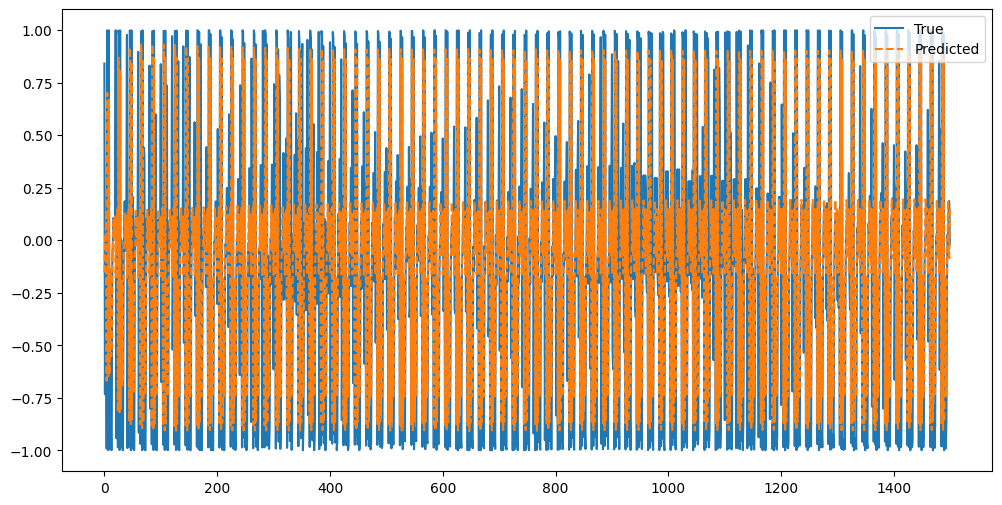

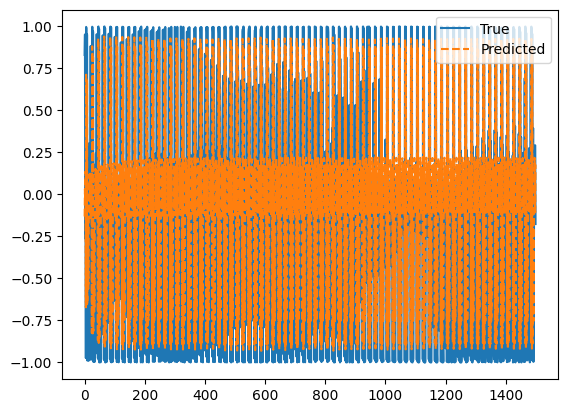

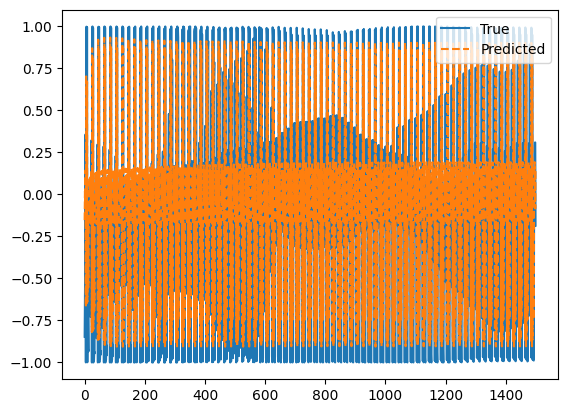

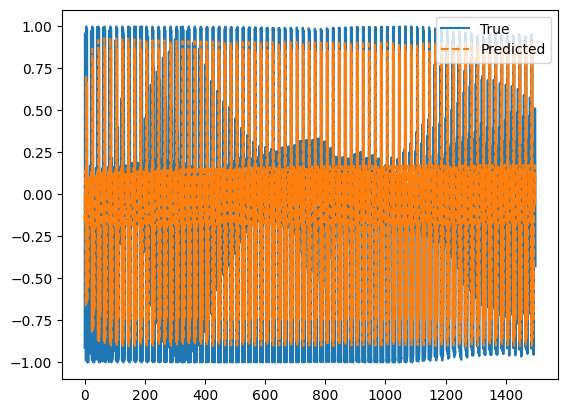

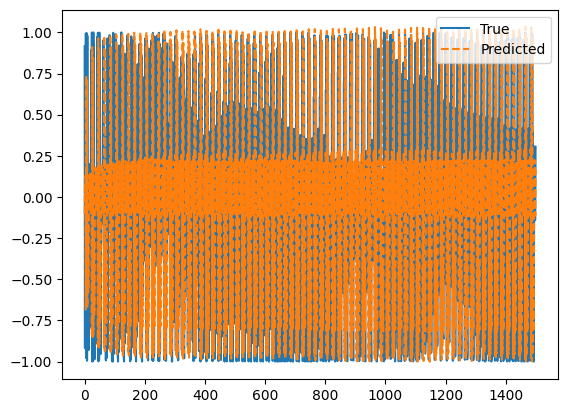

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
from sklearn.model_selection import train_test_split

# 1. Data Loading and Preprocessing
def load_synchronized_data(data_dir):
    data = []
    for file in os.listdir(data_dir):
        if file.endswith('_synchronized.npz'):
            npz_file = np.load(os.path.join(data_dir, file), allow_pickle=True)
            data.append({
                'audio': npz_file['audio'].item(),
                'pose': npz_file['pose']
            })
    return data

# Helper function to pad or truncate sequences to a fixed length
def pad_or_truncate(sequence, length):
    if sequence.shape[1] > length:
        return sequence[:, :length]
    elif sequence.shape[1] < length:
        pad_width = length - sequence.shape[1]
        return np.pad(sequence, ((0, 0), (0, pad_width)), mode='constant')
    return sequence

# 2. Data Preparation
def prepare_sequences(data, seq_length, joint_pairs):
    X, y = [], []
    for item in data:
        # Prepare audio features
        mfcc = pad_or_truncate(item['audio']['mfcc'], seq_length)
        chroma = pad_or_truncate(item['audio']['chroma'], seq_length)
        spectral_contrast = pad_or_truncate(item['audio']['spectral_contrast'], seq_length)
        tonnetz = pad_or_truncate(item['audio']['tonnetz'], seq_length)
        mel_spectrogram = pad_or_truncate(item['audio']['mel_spectrogram'], seq_length)
        pitches = pad_or_truncate(item['audio']['pitches'], seq_length)

        # Handle tempo and beat_frames
        tempo_seq = np.full((1, seq_length), item['audio']['tempo'])
        beat_seq = np.zeros((1, seq_length))
        beat_seq[:, item['audio']['beat_frames'][item['audio']['beat_frames'] < seq_length]] = 1

        audio_features = np.concatenate([
            mfcc,
            chroma,
            spectral_contrast,
            tonnetz,
            mel_spectrogram,
            pitches,
            tempo_seq,
            beat_seq
        ], axis=0)

        pose_sequence = item['pose']

        for i in range(0, len(pose_sequence) - seq_length, seq_length // 2):
            if audio_features.shape[1] >= i + seq_length and pose_sequence.shape[0] >= i + seq_length:
                X.append(audio_features[:, i:i+seq_length].T)
                y.append(pose_sequence[i:i+seq_length, :len(joint_pairs)*3])

    return np.array(X), np.array(y)

# Model parameters
lstm_units = 512
dropout_rate = 0.2

def build_lstm_model(input_shape, output_shape):
    inputs = keras.Input(shape=input_shape)
    x = layers.LSTM(lstm_units, return_sequences=True, dropout=dropout_rate)(inputs)
    x = layers.LSTM(lstm_units, return_sequences=True, dropout=dropout_rate)(x)
    x = layers.TimeDistributed(layers.Dense(output_shape))(x)
    return keras.Model(inputs, x)

data = load_synchronized_data('/content/drive/MyDrive/Synchronized_Data')

# Determine seq_length based on your data
seq_length = min(128, min(len(item['pose']) for item in data))

# Define joint_pairs
joint_pairs = [(11, 13, 15), (12, 14, 16), (23, 25, 27), (24, 26, 28), (11, 23, 24),
               (12, 24, 23), (23, 11, 12), (24, 12, 11), (11, 12, 24), (12, 11, 23)]

X, y = prepare_sequences(data, seq_length, joint_pairs)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
input_shape = X.shape[1:]  # (seq_length, num_features)
output_shape = y.shape[2]  # number of pose parameters
model = build_lstm_model(input_shape, output_shape)

print(f"Model input shape: {model.input_shape}")
print(f"Model output shape: {model.output_shape}")

# Compile and train the model
model.compile(optimizer="adam", loss="mse")

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
)

def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse_value = np.mean((predictions - y_test) ** 2)
    mae_value = np.mean(np.abs(predictions - y_test))
    return predictions, mse_value, mae_value

def plot_predictions(y_test, predictions):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 6))
    for i in range(5):  # Plotting for the first 5 test samples
        plt.plot(y_test[i].flatten(), label='True')
        plt.plot(predictions[i].flatten(), label='Predicted', linestyle='--')
        plt.legend()
        plt.show()

predictions, mse_value, mae_value = evaluate_model(model, X_test, y_test)
plot_predictions(y_test, predictions)


In [ ]:
# Evaluate the final loss on the test set
final_loss = model.evaluate(X_test, y_test)
print(f"Final Test Loss: {final_loss}")

# Get validation metrics from the training history
val_mse = history.history['val_loss'][-1]
print(f"Validation MSE: {val_mse}")

# Calculate Mean Absolute Error (MAE) on the test set
from sklearn.metrics import mean_absolute_error

predictions = model.predict(X_test)
mae = mean_absolute_error(y_test.reshape(-1, y_test.shape[-1]), predictions.reshape(-1, predictions.shape[-1]))
print(f"Mean Absolute Error (MAE): {mae}")


2/2 [==============================] - 0s 112ms/step - loss: 0.2456
Final Test Loss: 0.2455698698759079
Validation MSE: 0.26067647337913513
2/2 [==============================] - 0s 108ms/step
Mean Absolute Error (MAE): 0.31422761063439497


In [ ]:
# Assuming 'model' is your trained model
model.save('/content/drive/MyDrive/odissi_dance.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model input shape: (None, 75, 1193)
Model output shape: (None, 75, 20)
Epoch 1/200
2/2 [==============================] - 8s 1s/step - loss: 0.5572 - val_loss: 0.4010
Epoch 2/200
2/2 [==============================] - 3s 814ms/step - loss: 0.2948 - val_loss: 0.3620
Epoch 3/200
2/2 [==============================] - 3s 774ms/step - loss: 0.3324 - val_loss: 0.2942
Epoch 4/200
2/2 [==============================] - 3s 873ms/step - loss: 0.2568 - val_loss: 0.2673
Epoch 5/200
2/2 [==============================] - 3s 787ms/step - loss: 0.2169 - val_loss: 0.2659
Epoch 6/200
2/2 [==============================] - 3s 836ms/step - loss: 0.2043 - val_loss: 0.2810
Epoch 7/200
2/2 [==============================] - 3s 820ms/step - loss: 0.2120 - val_loss: 0.2855
Epoch 8/200
2/2 [==============================] - 3s 938ms/step - loss: 0.2136 - val_loss: 0.2786
Epoch 9/200
2/2 [==============================] - 3s 783ms/step - loss: 0.2097 - val_loss: 0.2707
Epoch 10/200
2/2 [=======================

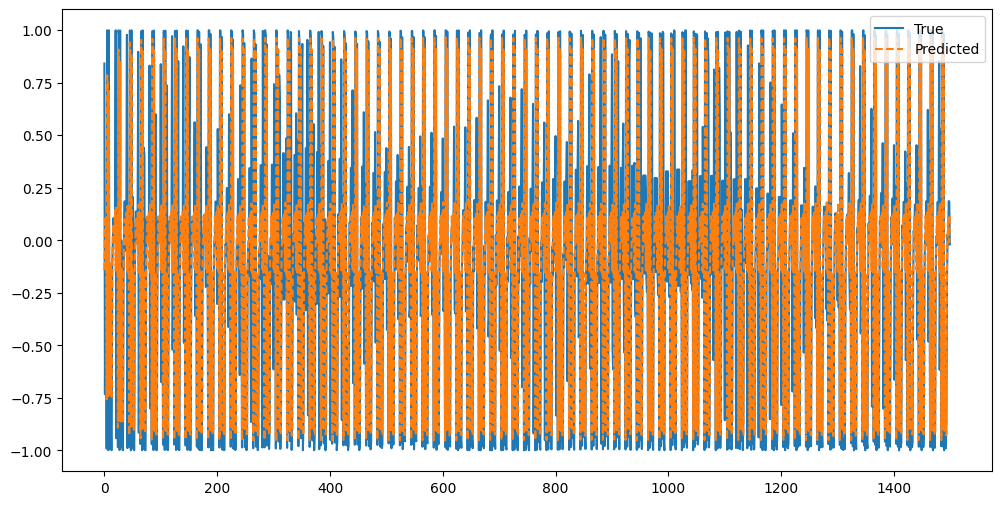

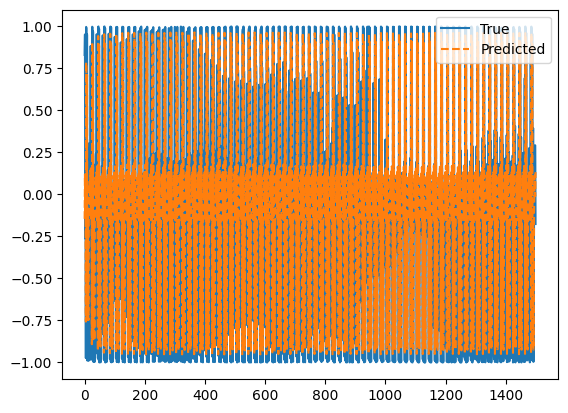

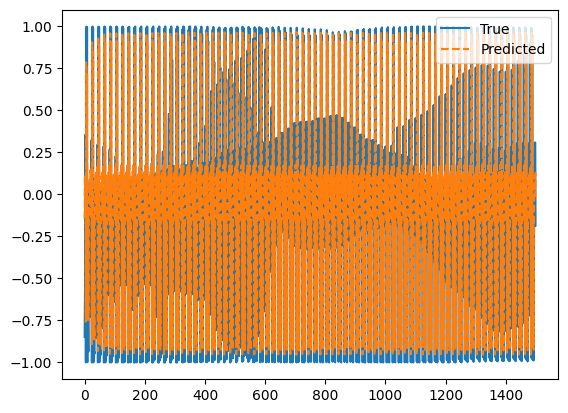

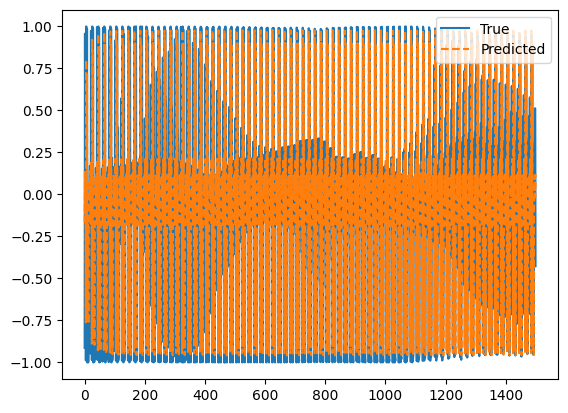

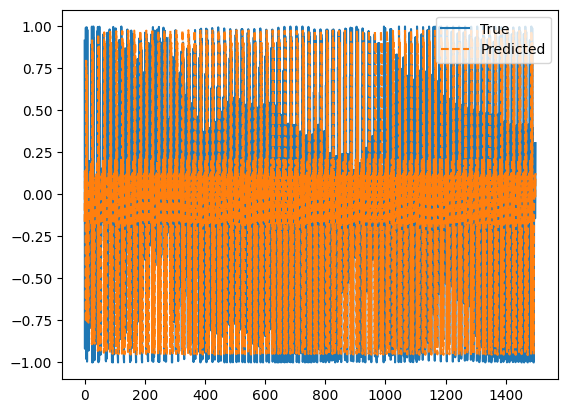

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 1. Data Loading and Preprocessing
def load_synchronized_data(data_dir):
    data = []
    for file in os.listdir(data_dir):
        if file.endswith('_synchronized.npz'):
            npz_file = np.load(os.path.join(data_dir, file), allow_pickle=True)
            data.append({
                'audio': npz_file['audio'].item(),
                'pose': npz_file['pose']
            })
    return data

def pad_or_truncate(sequence, length):
    if sequence.shape[1] > length:
        return sequence[:, :length]
    elif sequence.shape[1] < length:
        pad_width = length - sequence.shape[1]
        return np.pad(sequence, ((0, 0), (0, pad_width)), mode='constant')
    return sequence

# Normalize data
def normalize_data(X):
    samples, timesteps, features = X.shape
    X_flat = X.reshape(samples * timesteps, features)
    scaler = MinMaxScaler(feature_range=(-1, 1))
    X_normalized = scaler.fit_transform(X_flat)
    X_normalized = X_normalized.reshape(samples, timesteps, features)
    return X_normalized, scaler

def prepare_sequences(data, seq_length, joint_pairs):
    X, y = [], []
    for item in data:
        mfcc = pad_or_truncate(item['audio']['mfcc'], seq_length)
        chroma = pad_or_truncate(item['audio']['chroma'], seq_length)
        spectral_contrast = pad_or_truncate(item['audio']['spectral_contrast'], seq_length)
        tonnetz = pad_or_truncate(item['audio']['tonnetz'], seq_length)
        mel_spectrogram = pad_or_truncate(item['audio']['mel_spectrogram'], seq_length)
        pitches = pad_or_truncate(item['audio']['pitches'], seq_length)

        tempo_seq = np.full((1, seq_length), item['audio']['tempo'])
        beat_seq = np.zeros((1, seq_length))
        beat_seq[:, item['audio']['beat_frames'][item['audio']['beat_frames'] < seq_length]] = 1

        audio_features = np.concatenate([
            mfcc, chroma, spectral_contrast, tonnetz, mel_spectrogram, pitches, tempo_seq, beat_seq
        ], axis=0)

        pose_sequence = item['pose']

        for i in range(0, len(pose_sequence) - seq_length, seq_length // 2):
            if audio_features.shape[1] >= i + seq_length and pose_sequence.shape[0] >= i + seq_length:
                X.append(audio_features[:, i:i+seq_length].T)
                y.append(pose_sequence[i:i+seq_length, :len(joint_pairs)*3])

    X, scaler_X = normalize_data(np.array(X))
    y, scaler_y = normalize_data(np.array(y))
    return X, y, scaler_X, scaler_y

# Model parameters
lstm_units = 512
dropout_rate = 0.6

def build_lstm_model(input_shape, output_shape):
    inputs = keras.Input(shape=input_shape)
    x = layers.LSTM(lstm_units, return_sequences=True, dropout=dropout_rate)(inputs)
    x = layers.LSTM(lstm_units, return_sequences=True, dropout=dropout_rate)(x)
    x = layers.TimeDistributed(layers.Dense(output_shape))(x)
    return keras.Model(inputs, x)

data = load_synchronized_data('/content/drive/MyDrive/Synchronized_Data')
seq_length = min(128, min(len(item['pose']) for item in data))
joint_pairs = [(11, 13, 15), (12, 14, 16), (23, 25, 27), (24, 26, 28), (11, 23, 24),
               (12, 24, 23), (23, 11, 12), (24, 12, 11), (11, 12, 24), (12, 11, 23)]

X, y, scaler_X, scaler_y = prepare_sequences(data, seq_length, joint_pairs)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

input_shape = X.shape[1:]
output_shape = y.shape[2]
model = build_lstm_model(input_shape, output_shape)

print(f"Model input shape: {model.input_shape}")
print(f"Model output shape: {model.output_shape}")

model.compile(optimizer="adam", loss="mse")

history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=128,
    validation_split=0.2,
)

def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse_value = np.mean((predictions - y_test) ** 2)
    mae_value = np.mean(np.abs(predictions - y_test))
    return predictions, mse_value, mae_value

def plot_predictions(y_test, predictions):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 6))
    for i in range(5):
        plt.plot(y_test[i].flatten(), label='True')
        plt.plot(predictions[i].flatten(), label='Predicted', linestyle='--')
        plt.legend()
        plt.show()

predictions, mse_value, mae_value = evaluate_model(model, X_test, y_test)
plot_predictions(y_test, predictions)


In [ ]:
# Evaluate the final loss on the test set
final_loss = model.evaluate(X_test, y_test)
print(f"Final Test Loss: {final_loss}")

# Get validation metrics from the training history
val_mse = history.history['val_loss'][-1]
print(f"Validation MSE: {val_mse}")

# Calculate Mean Absolute Error (MAE) on the test set
from sklearn.metrics import mean_absolute_error

predictions = model.predict(X_test)
mae = mean_absolute_error(y_test.reshape(-1, y_test.shape[-1]), predictions.reshape(-1, predictions.shape[-1]))
print(f"Mean Absolute Error (MAE): {mae}")


2/2 [==============================] - 0s 57ms/step - loss: 0.2373
Final Test Loss: 0.2373025119304657
Validation MSE: 0.25422632694244385
2/2 [==============================] - 0s 43ms/step
Mean Absolute Error (MAE): 0.31145667020925827


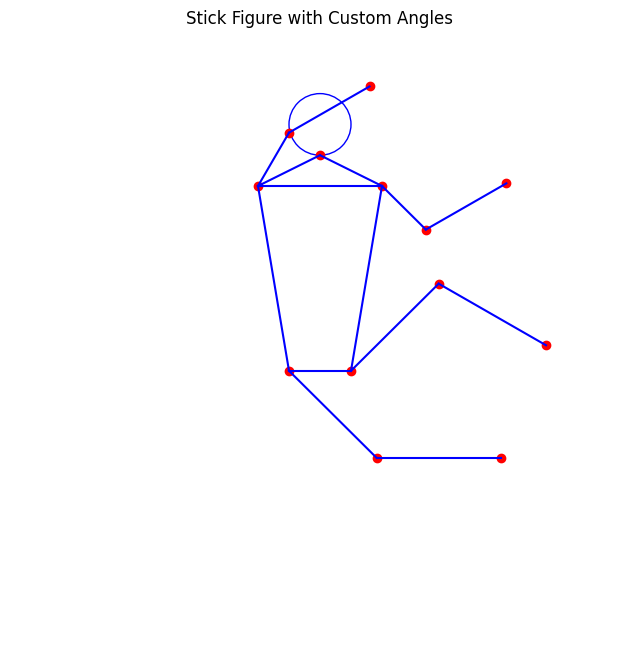

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_joint_position(base_pos, angle, length):
    """
    Calculate the new joint position based on the base position, angle, and segment length.
    """
    angle_rad = np.radians(angle)
    x_offset = length * np.cos(angle_rad)
    y_offset = length * np.sin(angle_rad)
    return base_pos + np.array([x_offset, y_offset])

def plot_stick_figure(joint_angles):
    # Initialize figure
    fig, ax = plt.subplots(figsize=(8, 8))

    # Define joint positions (fixed positions)
    joints = {
        1: np.array([0, 0.6]),      # Neck (top of the neck)
        11: np.array([-0.2, 0.5]),  # Left shoulder
        12: np.array([0.2, 0.5]),   # Right shoulder
        23: np.array([-0.1, -0.1]), # Left hip
        24: np.array([0.1, -0.1]),  # Right hip
    }

    # Segment lengths
    upper_arm_length = 0.2
    forearm_length = 0.3
    upper_leg_length = 0.4
    lower_leg_length = 0.4

    # Calculate joint positions based on angles
    joints[13] = calculate_joint_position(joints[11], joint_angles[(11, 13)], upper_arm_length)
    joints[15] = calculate_joint_position(joints[13], joint_angles[(13, 15)], forearm_length)

    joints[14] = calculate_joint_position(joints[12], joint_angles[(12, 14)], upper_arm_length)
    joints[16] = calculate_joint_position(joints[14], joint_angles[(14, 16)], forearm_length)

    joints[25] = calculate_joint_position(joints[23], joint_angles[(23, 25)], upper_leg_length)
    joints[27] = calculate_joint_position(joints[25], joint_angles[(25, 27)], lower_leg_length)

    joints[26] = calculate_joint_position(joints[24], joint_angles[(24, 26)], upper_leg_length)
    joints[28] = calculate_joint_position(joints[26], joint_angles[(26, 28)], lower_leg_length)

    # Plot joints
    for joint, pos in joints.items():
        ax.plot(pos[0], pos[1], 'ro')

    # Plot limbs
    limbs = [
        (1, 11), (1, 12),    # Neck to shoulders
        (11, 13), (13, 15),  # Left arm
        (12, 14), (14, 16),  # Right arm
        (23, 25), (25, 27),  # Left leg
        (24, 26), (26, 28),  # Right leg
        (11, 23), (12, 24),  # Shoulders to hips
        (23, 24), (11, 12)   # Hips and shoulders
    ]

    for start, end in limbs:
        ax.plot([joints[start][0], joints[end][0]],
                [joints[start][1], joints[end][1]], 'b-')

    # Draw head (circle) above the neck
    head_radius = 0.1
    head_center = joints[1] + np.array([0, head_radius])
    head = plt.Circle(head_center, head_radius, fill=False, color='b')
    ax.add_artist(head)

    # Set plot limits and remove axes
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.axis('off')

    plt.title('Stick Figure with Custom Angles')
    plt.show()

# Define joint angles for all pairs in degrees
joint_angles = {
    (11, 13): 60,    # Left shoulder to left elbow
    (13, 15): 30,    # Left elbow to left wrist
    (12, 14): -45,   # Right shoulder to right elbow
    (14, 16): 30,    # Right elbow to right wrist
    (23, 25): -45,   # Left hip to left knee
    (25, 27): 0,     # Left knee to left ankle
    (24, 26): 45,    # Right hip to right knee
    (26, 28): -30,   # Right knee to right ankle
    (11, 23): 0,     # Left shoulder to left hip (usually zero or fixed)
    (12, 24): 0      # Right shoulder to right hip (usually zero or fixed)
}

# Joint pairs for angle calculations
joint_pairs = [
    (11, 13, 15),   # Left shoulder, elbow, wrist
    (12, 14, 16),   # Right shoulder, elbow, wrist
    (23, 25, 27),   # Left hip, knee, ankle
    (24, 26, 28),   # Right hip, knee, ankle
    (11, 23, 24),   # Left shoulder, left hip, right hip
    (12, 24, 23),   # Right shoulder, right hip, left hip
    (23, 11, 12),   # Left hip, left shoulder, right shoulder
    (24, 12, 11),   # Right hip, right shoulder, left shoulder
    (11, 12, 24),   # Left shoulder, right shoulder, right hip
    (12, 11, 23)    # Right shoulder, left shoulder, left hip
]

# Plot the stick figure with the specified joint angles
plot_stick_figure(joint_angles)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
import librosa
import imageio

# Function to calculate joint position based on base position, angle, and segment length
def calculate_joint_position(base_pos, angle, length):
    angle_rad = np.radians(angle)
    x_offset = length * np.cos(angle_rad)
    y_offset = length * np.sin(angle_rad)
    return base_pos + np.array([x_offset, y_offset])

# Function to plot a stick figure with given joint angles
def plot_stick_figure(joint_angles, ax):
    # Define joint positions (fixed positions)
    joints = {
        1: np.array([0, 0.6]),      # Neck (top of the neck)
        11: np.array([-0.2, 0.5]),  # Left shoulder
        12: np.array([0.2, 0.5]),   # Right shoulder
        23: np.array([-0.1, -0.1]), # Left hip
        24: np.array([0.1, -0.1]),  # Right hip
    }

    # Segment lengths
    upper_arm_length = 0.2
    forearm_length = 0.3
    upper_leg_length = 0.4
    lower_leg_length = 0.4

    # Calculate joint positions based on angles
    joints[13] = calculate_joint_position(joints[11], joint_angles[(11, 13)], upper_arm_length)
    joints[15] = calculate_joint_position(joints[13], joint_angles[(13, 15)], forearm_length)

    joints[14] = calculate_joint_position(joints[12], joint_angles[(12, 14)], upper_arm_length)
    joints[16] = calculate_joint_position(joints[14], joint_angles[(14, 16)], forearm_length)

    joints[25] = calculate_joint_position(joints[23], joint_angles[(23, 25)], upper_leg_length)
    joints[27] = calculate_joint_position(joints[25], joint_angles[(25, 27)], lower_leg_length)

    joints[26] = calculate_joint_position(joints[24], joint_angles[(24, 26)], upper_leg_length)
    joints[28] = calculate_joint_position(joints[26], joint_angles[(26, 28)], lower_leg_length)

    # Plot joints
    for joint, pos in joints.items():
        ax.plot(pos[0], pos[1], 'ro')

    # Plot limbs
    limbs = [
        (1, 11), (1, 12),    # Neck to shoulders
        (11, 13), (13, 15),  # Left arm
        (12, 14), (14, 16),  # Right arm
        (23, 25), (25, 27),  # Left leg
        (24, 26), (26, 28),  # Right leg
        (11, 23), (12, 24),  # Shoulders to hips
        (23, 24), (11, 12)   # Hips and shoulders
    ]

    for start, end in limbs:
        ax.plot([joints[start][0], joints[end][0]],
                [joints[start][1], joints[end][1]], 'b-')

    # Draw head (circle) above the neck
    head_radius = 0.1
    head_center = joints[1] + np.array([0, head_radius])
    head = plt.Circle(head_center, head_radius, fill=False, color='b')
    ax.add_artist(head)

# Load LSTM model
model = load_model('odissi_dance.h5')

# Function to extract audio features
def extract_audio_features(audio_path, sr=22050, n_mfcc=13):
    y, sr = librosa.load(audio_path, sr=sr)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return mfccs.T

# Function to generate frames for the video
def generate_frames(audio_features, model, joint_pairs):
    frames = []
    for features in audio_features:
        features = features.reshape(1, -1)
        joint_angles = model.predict(features)[0]
        joint_angles_dict = {joint_pairs[i]: joint_angles[i] for i in range(len(joint_pairs))}

        fig, ax = plt.subplots(figsize=(8, 8))
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)
        ax.axis('off')
        plot_stick_figure(joint_angles_dict, ax)

        # Save the current frame
        fig.canvas.draw()
        frame = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
        frame = frame.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        frames.append(frame)
        plt.close(fig)

    return frames

# Generate video from frames
def create_video(frames, output_path, fps=30):
    with imageio.get_writer(output_path, fps=fps) as writer:
        for frame in frames:
            writer.append_data(frame)

# Define joint pairs for the angles
joint_pairs = [
    (11, 13), (13, 15),   # Left shoulder, elbow, wrist
    (12, 14), (14, 16),   # Right shoulder, elbow, wrist
    (23, 25), (25, 27),   # Left hip, knee, ankle
    (24, 26), (26, 28),   # Right hip, knee, ankle
    (11, 23), (12, 24)    # Shoulders to hips
]

# Path to audio file
audio_path = '/content/drive/MyDrive/Output_Music/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.01.47.282-00.02.15.931-seg02.wav'

# Extract audio features
audio_features = extract_audio_features(audio_path)

# Generate frames
frames = generate_frames(audio_features, model, joint_pairs)

# Create video
output_video_path = '/content/drive/MyDrive/output_video.mp4'
create_video(frames, output_video_path)

print(f"Video created at {output_video_path}")

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_2" is incompatible with the layer: expected shape=(None, 75, 1193), found shape=(None, 13)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
import librosa
import imageio

# Function to calculate joint position based on base position, angle, and segment length
def calculate_joint_position(base_pos, angle, length):
    angle_rad = np.radians(angle)
    x_offset = length * np.cos(angle_rad)
    y_offset = length * np.sin(angle_rad)
    return base_pos + np.array([x_offset, y_offset])

# Function to plot a stick figure with given joint angles
def plot_stick_figure(joint_angles, ax):
    # Define joint positions (fixed positions)
    joints = {
        1: np.array([0, 0.6]),      # Neck (top of the neck)
        11: np.array([-0.2, 0.5]),  # Left shoulder
        12: np.array([0.2, 0.5]),   # Right shoulder
        23: np.array([-0.1, -0.1]), # Left hip
        24: np.array([0.1, -0.1]),  # Right hip
    }

    # Segment lengths
    upper_arm_length = 0.2
    forearm_length = 0.3
    upper_leg_length = 0.4
    lower_leg_length = 0.4

    # Calculate joint positions based on angles
    joints[13] = calculate_joint_position(joints[11], joint_angles[(11, 13)], upper_arm_length)
    joints[15] = calculate_joint_position(joints[13], joint_angles[(13, 15)], forearm_length)

    joints[14] = calculate_joint_position(joints[12], joint_angles[(12, 14)], upper_arm_length)
    joints[16] = calculate_joint_position(joints[14], joint_angles[(14, 16)], forearm_length)

    joints[25] = calculate_joint_position(joints[23], joint_angles[(23, 25)], upper_leg_length)
    joints[27] = calculate_joint_position(joints[25], joint_angles[(25, 27)], lower_leg_length)

    joints[26] = calculate_joint_position(joints[24], joint_angles[(24, 26)], upper_leg_length)
    joints[28] = calculate_joint_position(joints[26], joint_angles[(26, 28)], lower_leg_length)

    # Plot joints
    for joint, pos in joints.items():
        ax.plot(pos[0], pos[1], 'ro')

    # Plot limbs
    limbs = [
        (1, 11), (1, 12),    # Neck to shoulders
        (11, 13), (13, 15),  # Left arm
        (12, 14), (14, 16),  # Right arm
        (23, 25), (25, 27),  # Left legnp.random
        (24, 26), (26, 28),  # Right leg
        (11, 23), (12, 24),  # Shoulders to hips
        (23, 24), (11, 12)   # Hips and shoulders
    ]

    for start, end in limbs:
        ax.plot([joints[start][0], joints[end][0]],
                [joints[start][1], joints[end][1]], 'b-')

    # Draw head (circle) above the neck
    head_radius = 0.1
    head_center = joints[1] + np.array([0, head_radius])
    head = plt.Circle(head_center, head_radius, fill=False, color='b')
    ax.add_artist(head)

# Load LSTM model
model = load_model('odissi_dance.h5')

# Function to extract audio features
def extract_audio_features(audio_path, sr=22050, n_mfcc=13):
    y, sr = librosa.load(audio_path, sr=sr)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

    # Ensure the features have the expected shape (time_steps, features)
    # Let's assume we need to reshape them to (75, 1193)
    time_steps = 75
    features_per_step = 1193
    padding_needed = time_steps * features_per_step - mfccs.size

    # Pad with zeros if needed
    if padding_needed > 0:
        mfccs = np.pad(mfccs, ((0, 0), (0, padding_needed)), mode='constant')

    # Reshape to (time_steps, features_per_step)
    mfccs = mfccs.flatten()[:time_steps * features_per_step]
    mfccs = mfccs.reshape((time_steps, features_per_step))

    return mfccs

# Function to generate frames for the video
def generate_frames(audio_features, model, joint_pairs):
    frames = []

    # Add a batch dimension
    audio_features = np.expand_dims(audio_features, axis=0)

    joint_angles_sequence = model.predict(audio_features)[0]

    for joint_angles in joint_angles_sequence:
        joint_angles_dict = {joint_pairs[i]: joint_angles[i] for i in range(len(joint_pairs))}

        fig, ax = plt.subplots(figsize=(8, 8))
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)
        ax.axis('off')
        plot_stick_figure(joint_angles_dict, ax)

        # Save the current frame
        fig.canvas.draw()
        frame = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
        frame = frame.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        frames.append(frame)
        plt.close(fig)

    return frames

# Generate video from frames
def create_video(frames, output_path, fps=30):
    with imageio.get_writer(output_path, fps=fps) as writer:
        for frame in frames:
            writer.append_data(frame)

# Define joint pairs for the angles
joint_pairs = [
    (11, 13), (13, 15),   # Left shoulder, elbow, wrist
    (12, 14), (14, 16),   # Right shoulder, elbow, wrist
    (23, 25), (25, 27),   # Left hip, knee, ankle
    (24, 26), (26, 28),   # Right hip, knee, ankle
    (11, 23), (12, 24)    # Shoulders to hips
]

# Path to audio file
audio_path = '/content/drive/MyDrive/Output_Music/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.01.47.282-00.02.15.931-seg02.wav'

# Extract audio features
audio_features = extract_audio_features(audio_path)

# Generate frames
frames = generate_frames(audio_features, model, joint_pairs)

# Create video
output_video_path = '/content/drive/MyDrive/output_video.mp4'
create_video(frames, output_video_path)

print(f"Video created at {output_video_path}")

1/1 [==============================] - 1s 655ms/step


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video created at /content/drive/MyDrive/output_video.mp4


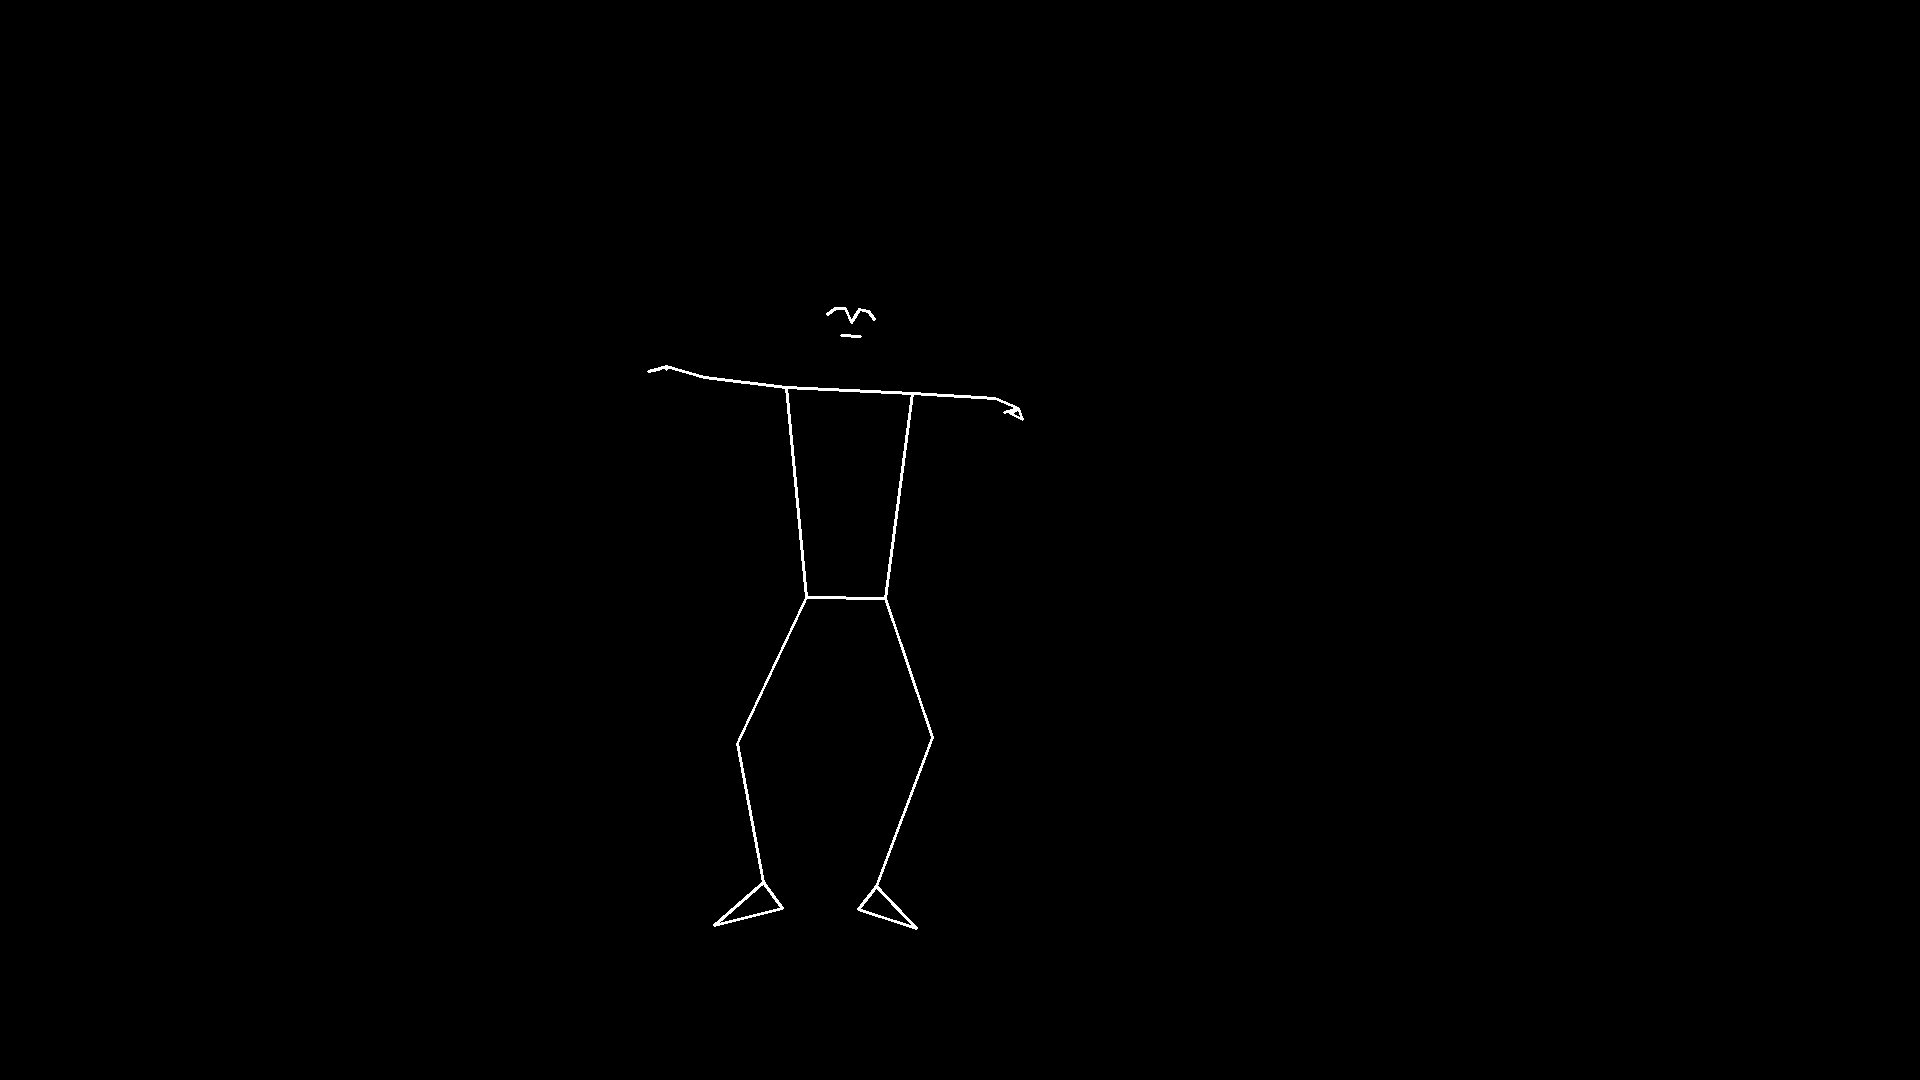

Processing frame 0


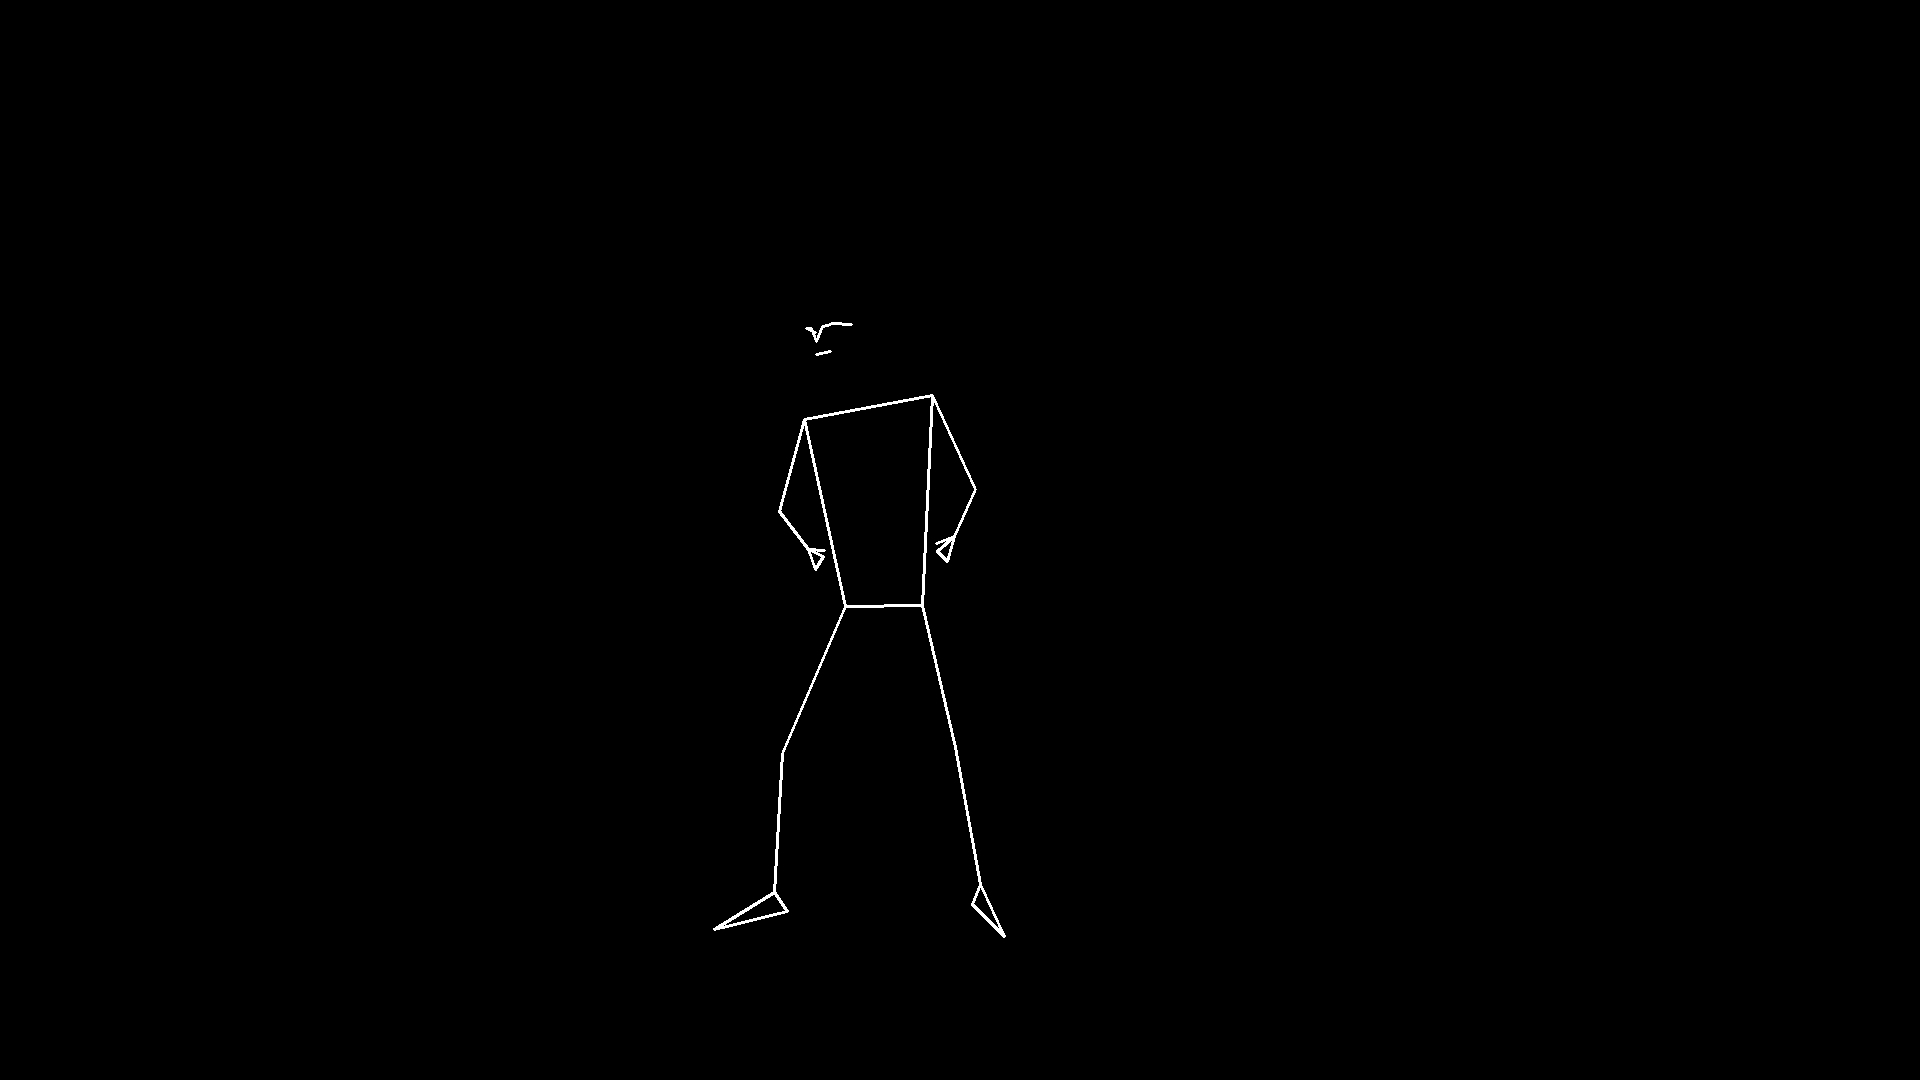

Processing frame 30


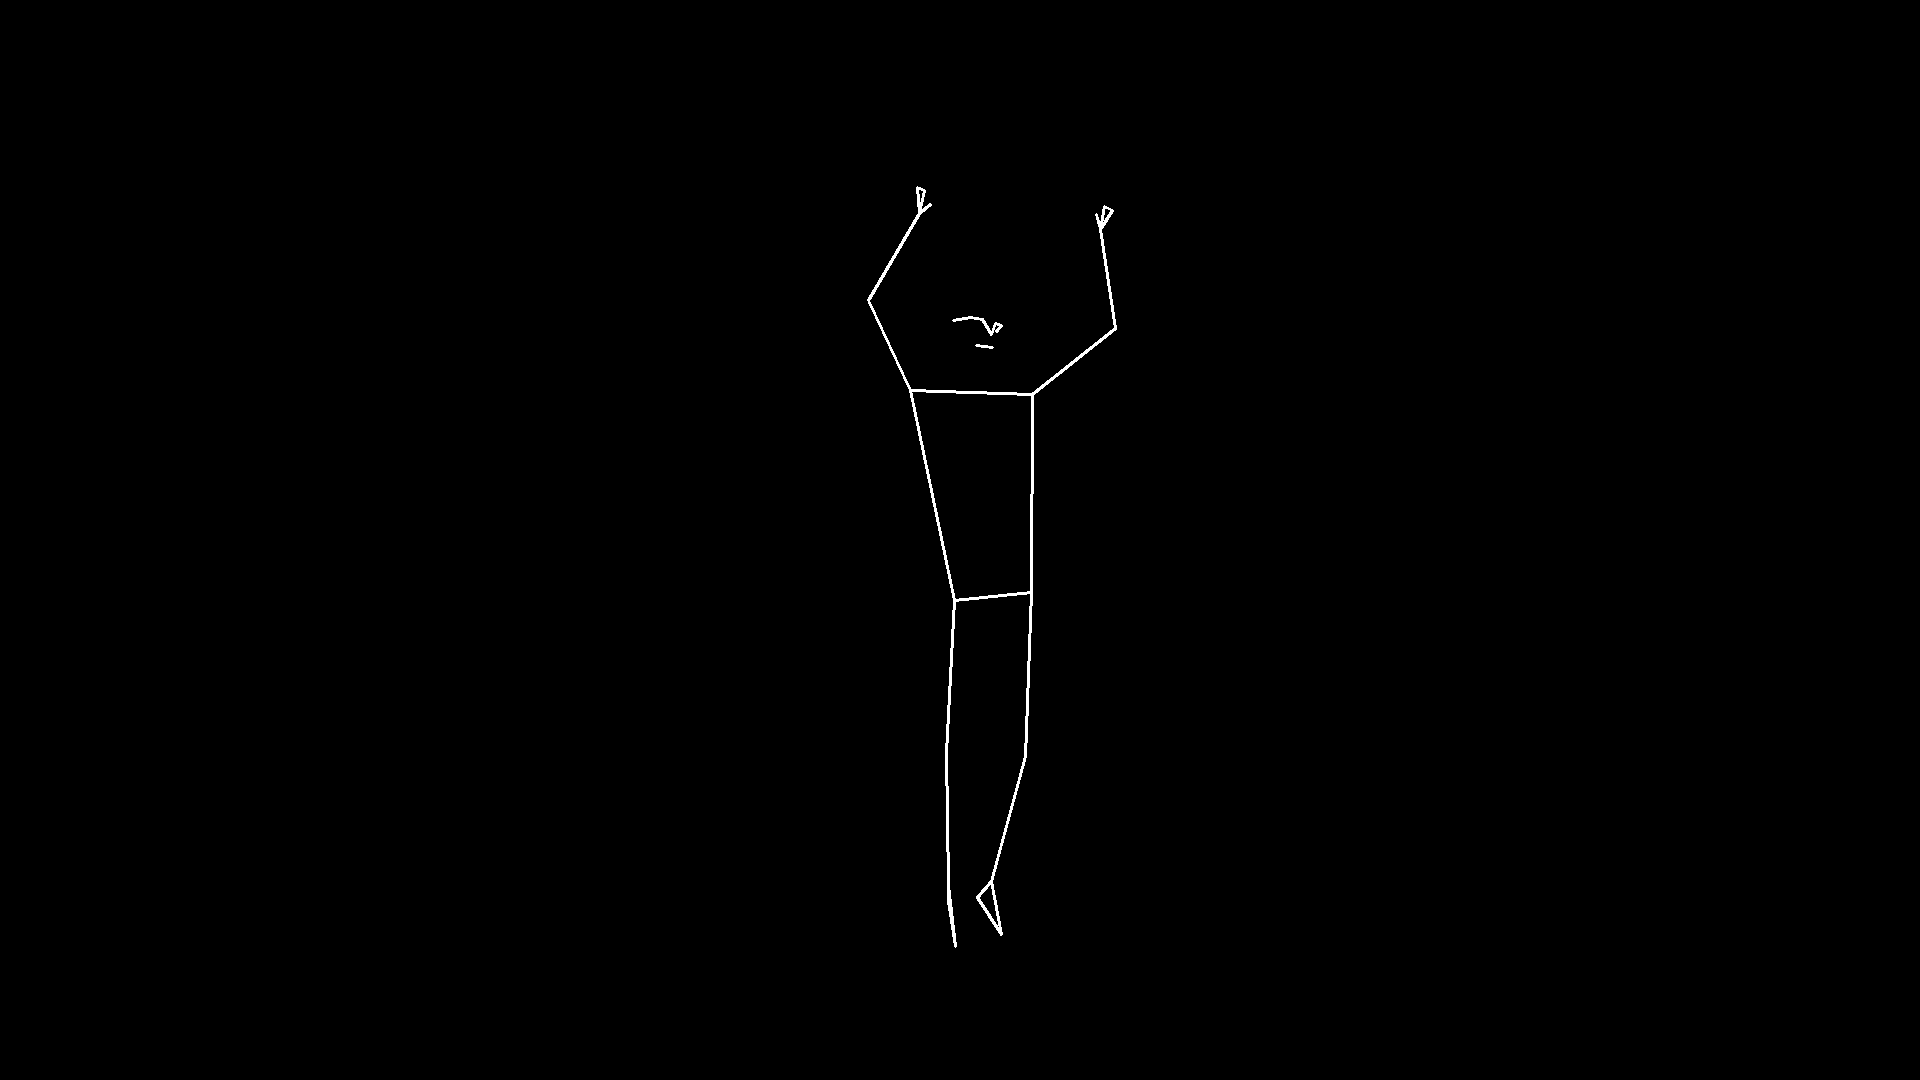

Processing frame 60


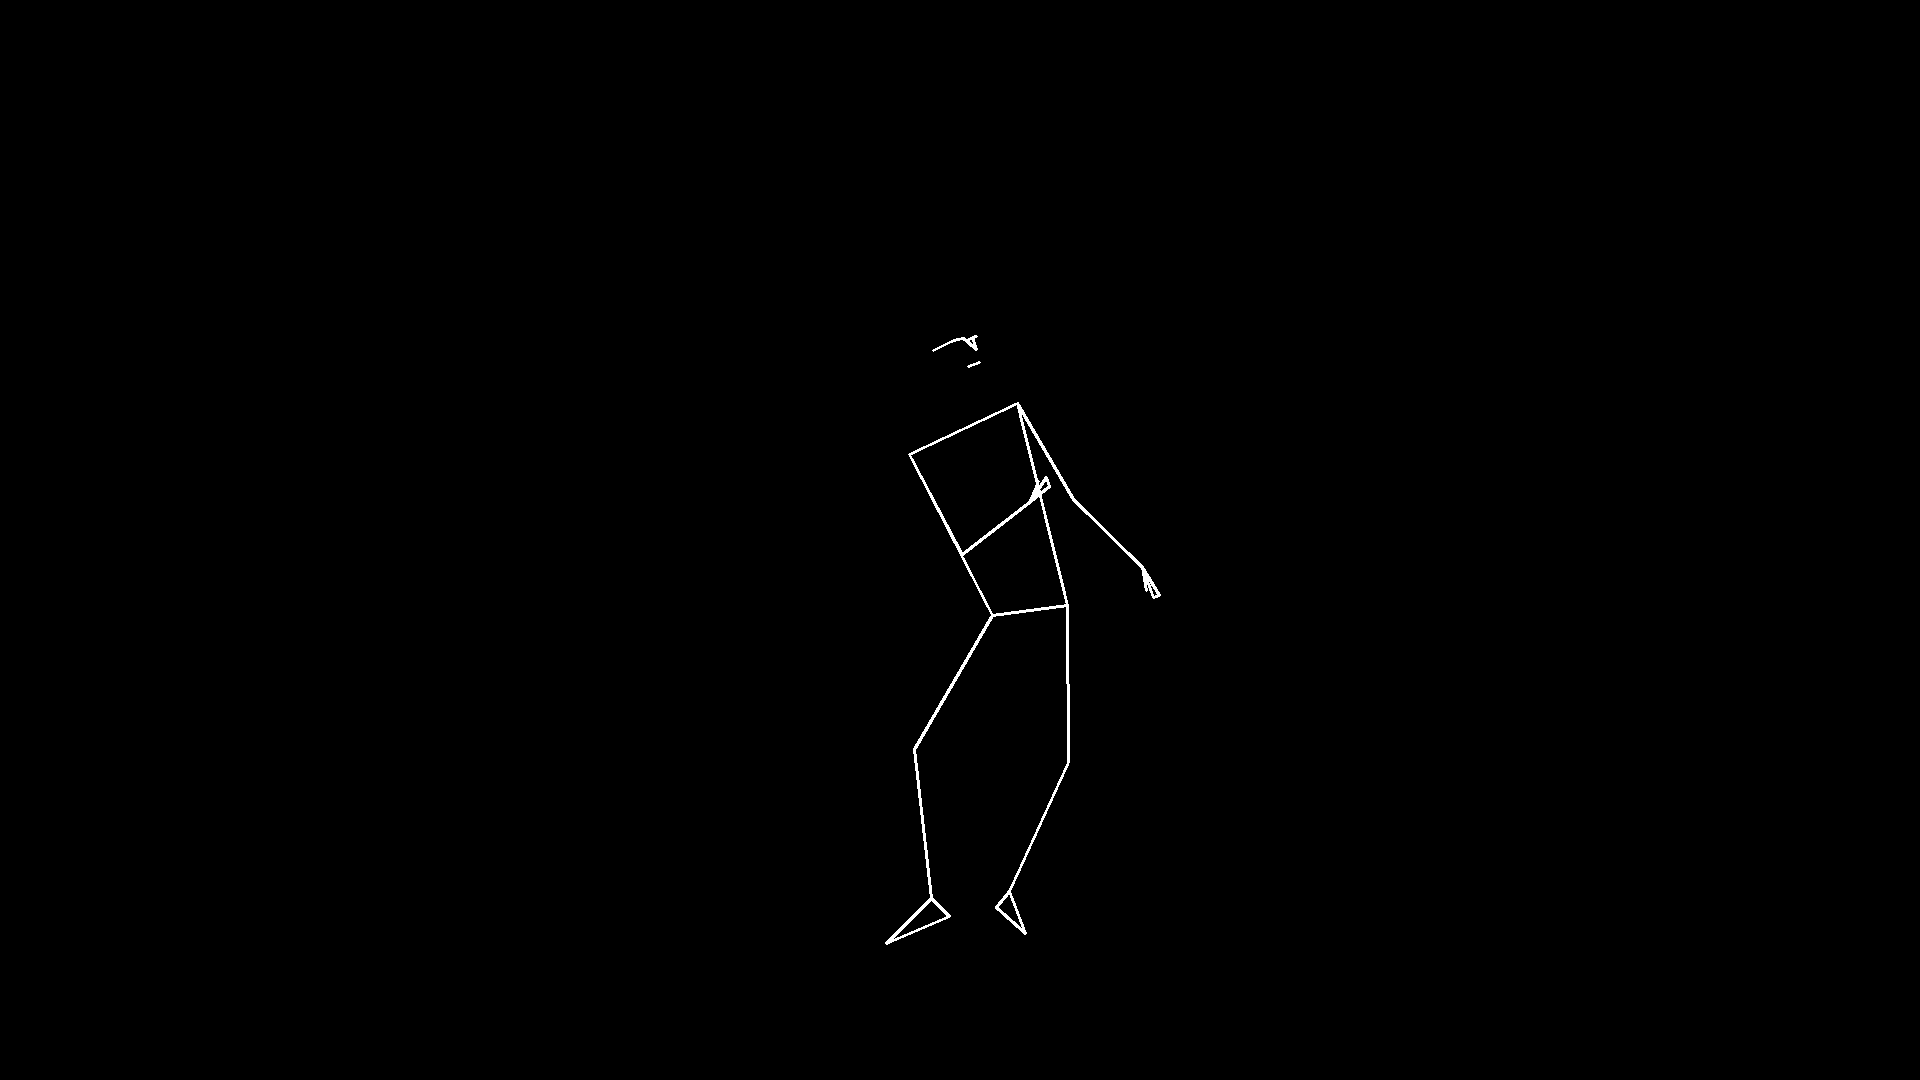

Processing frame 90


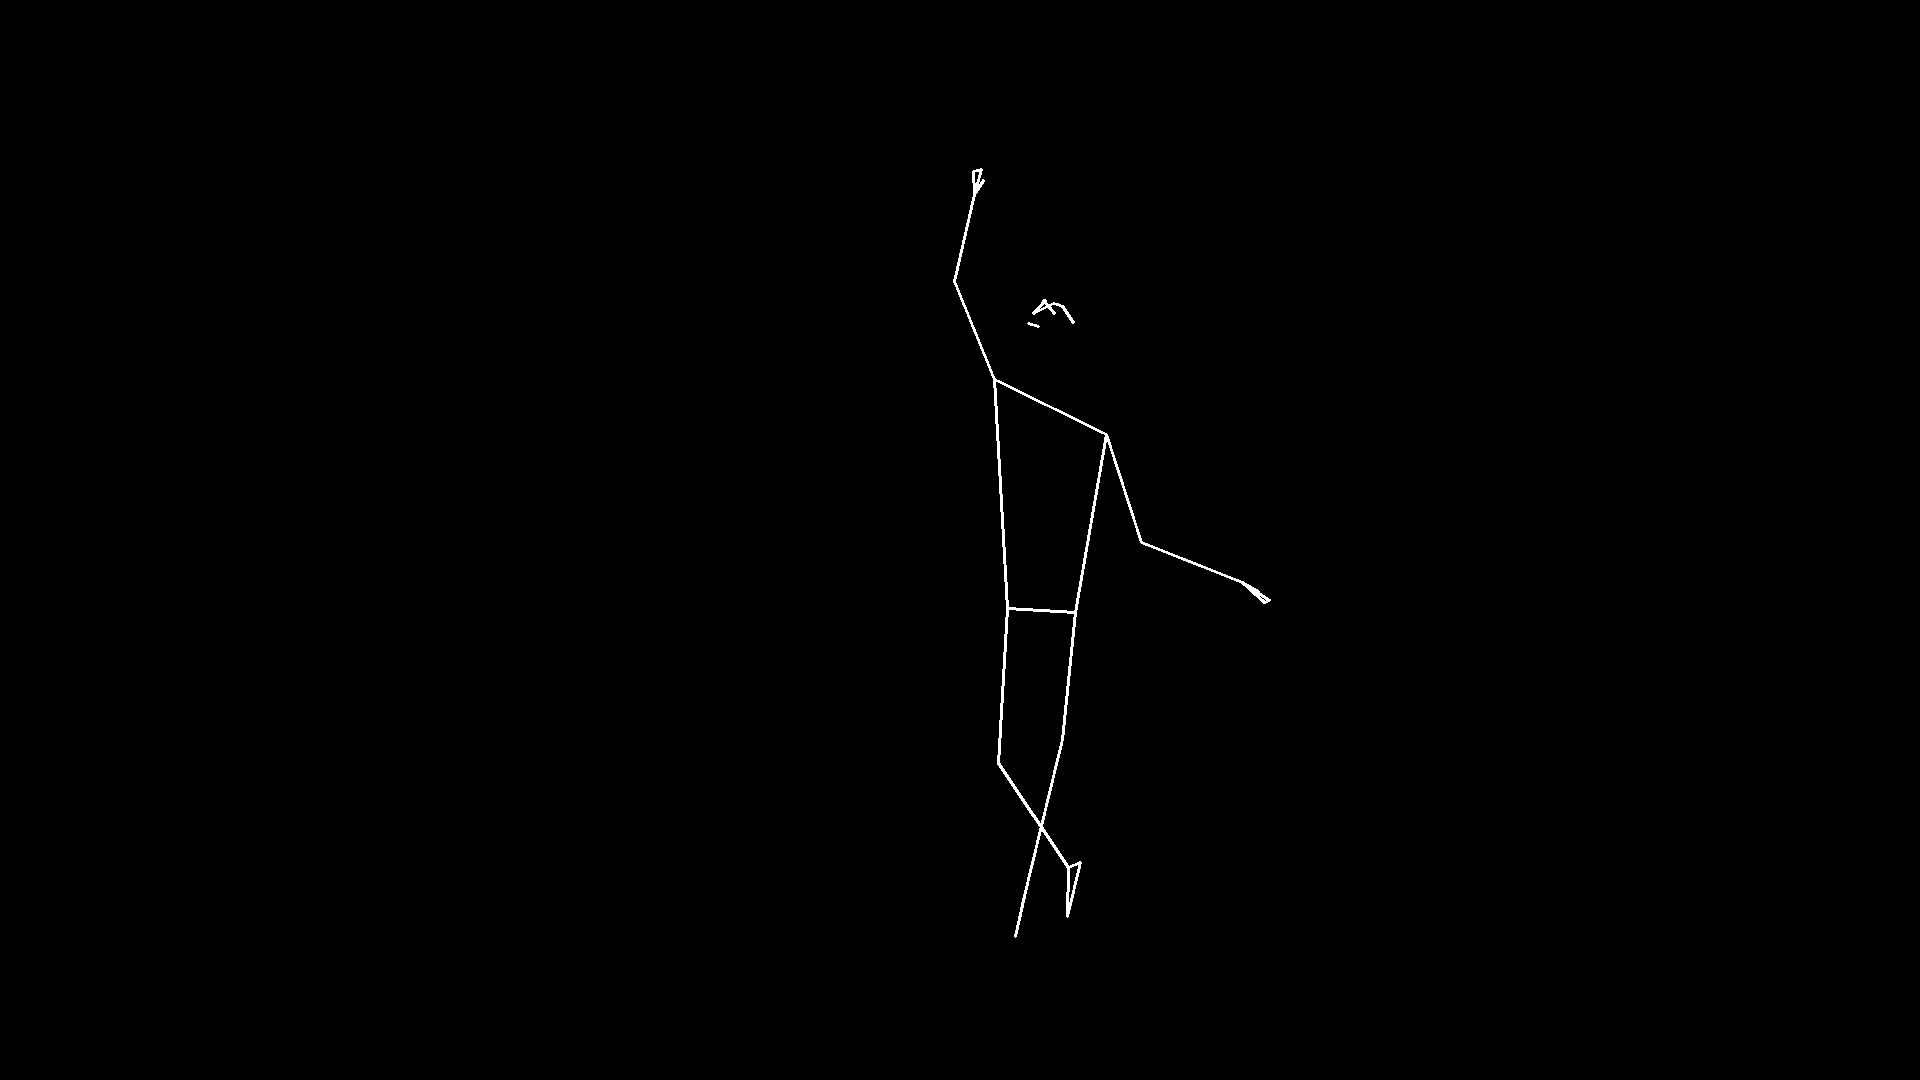

Processing frame 120


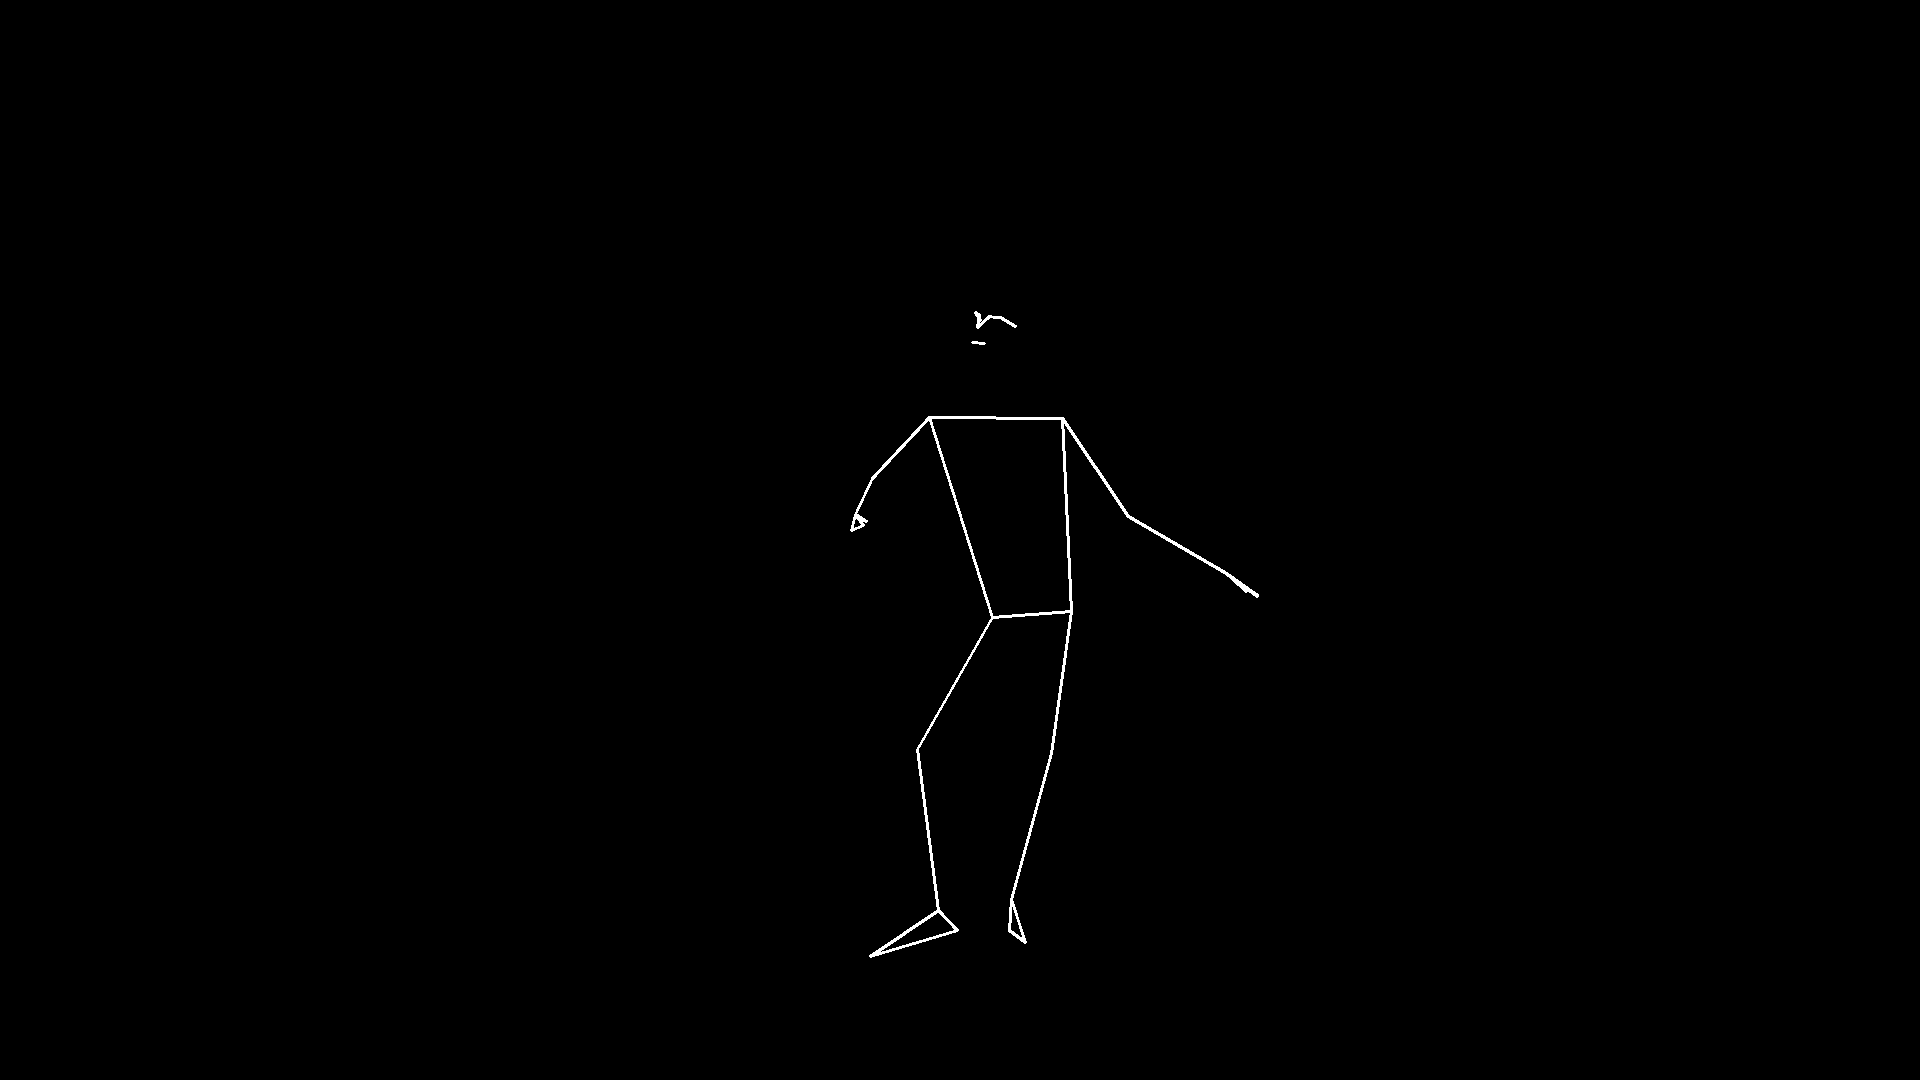

Processing frame 150


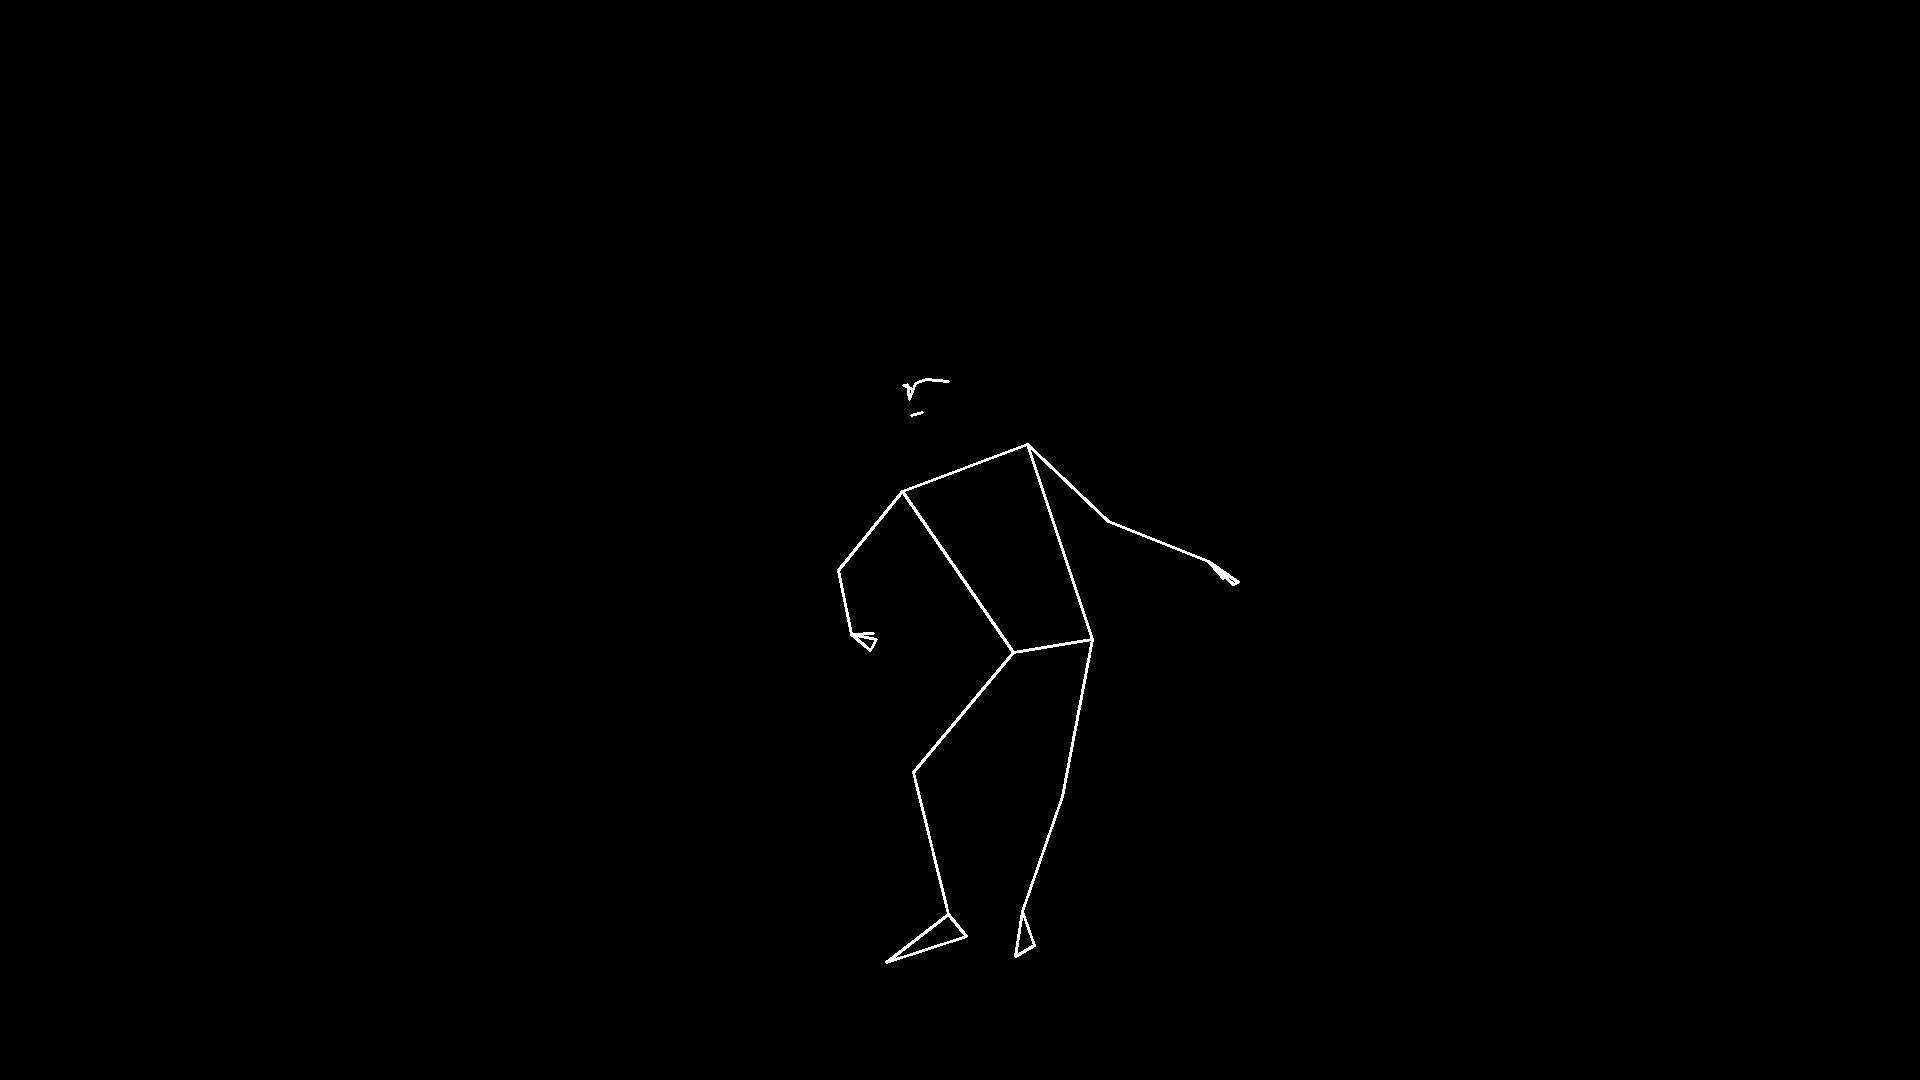

Processing frame 180


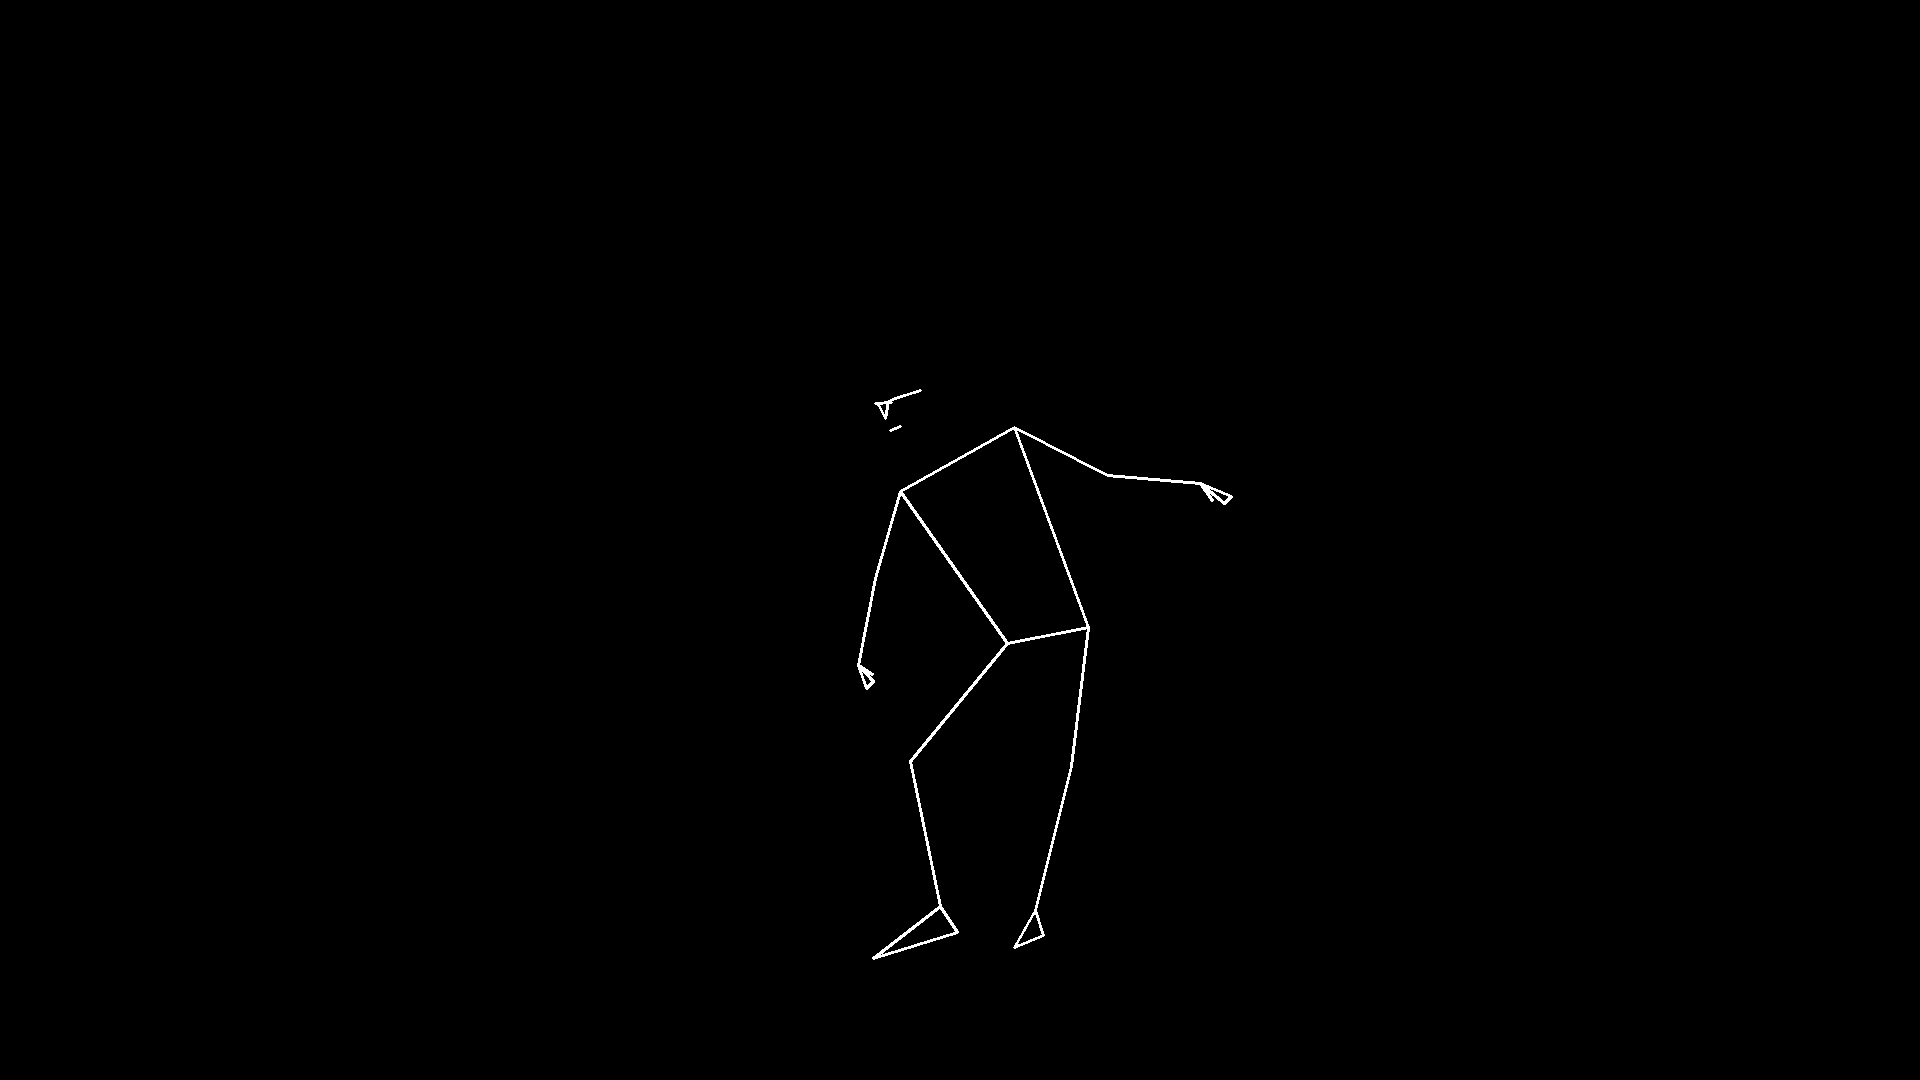

Processing frame 210


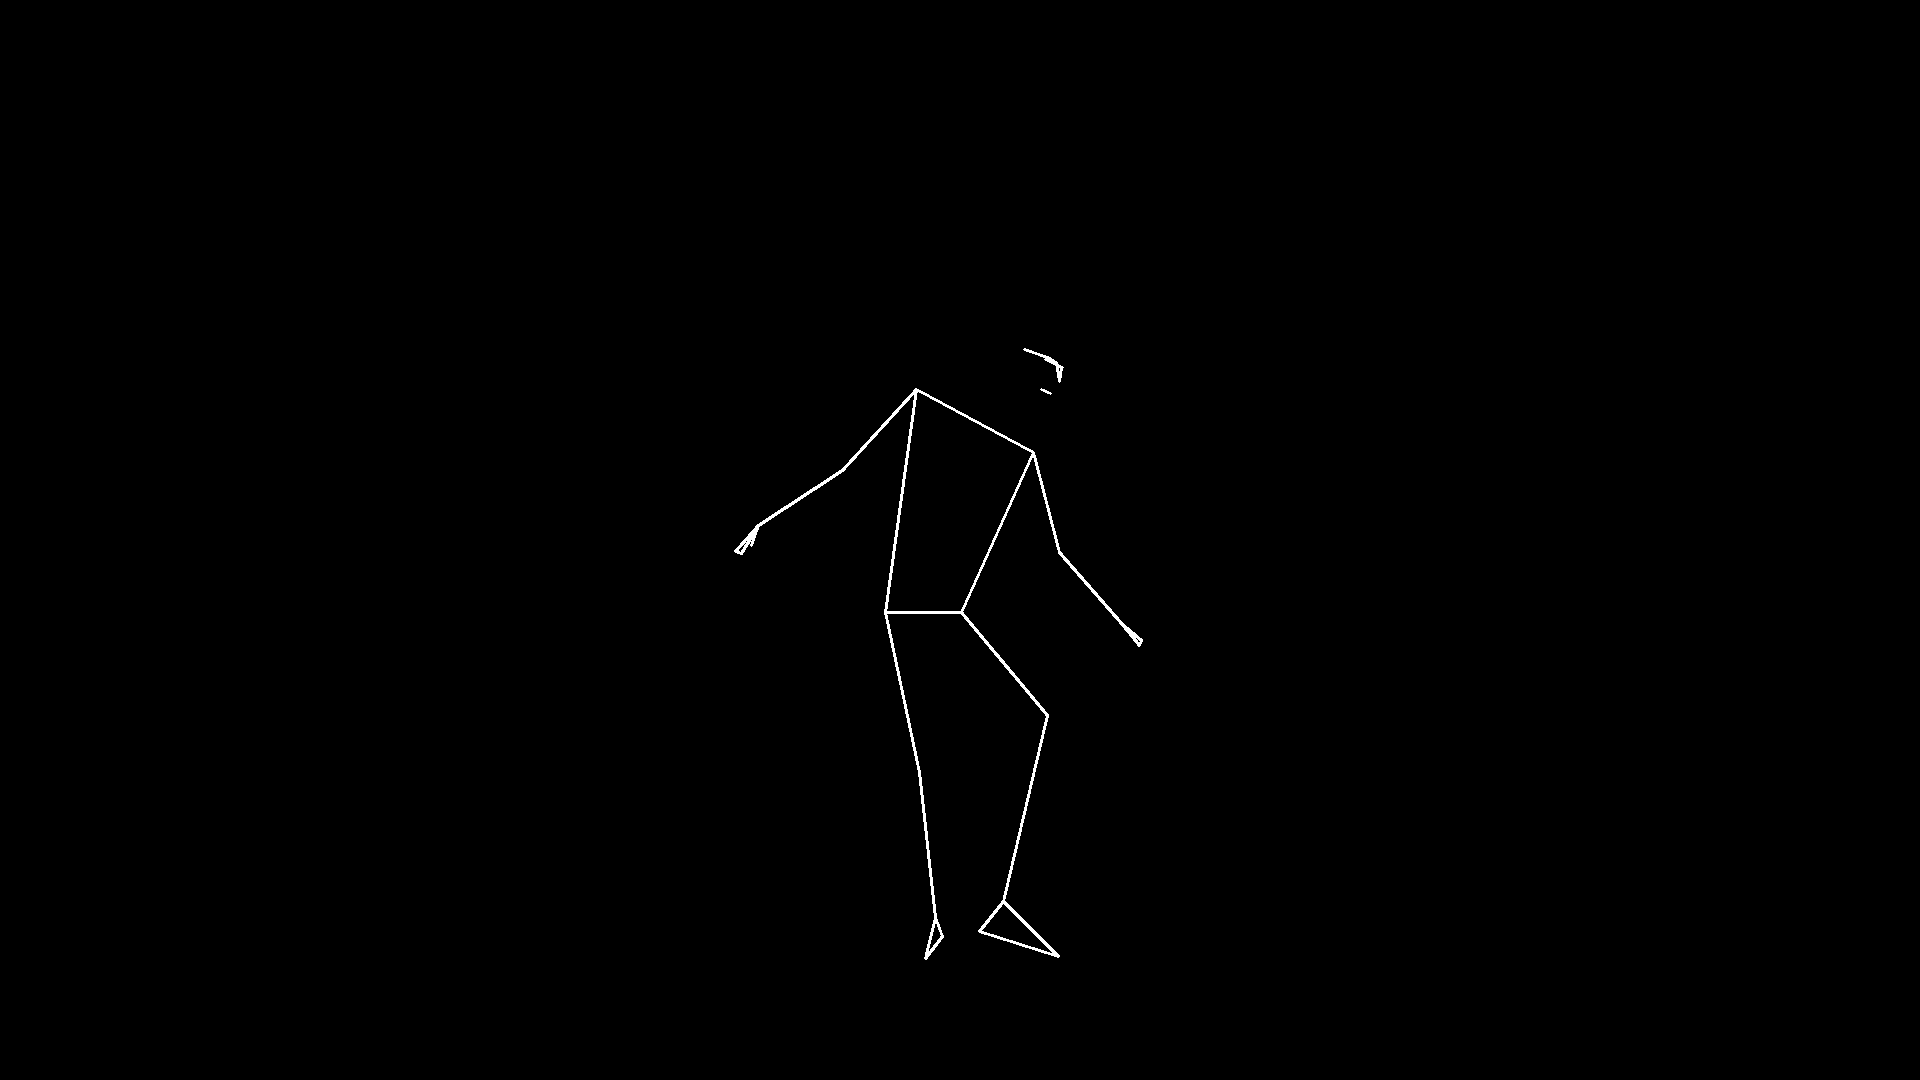

Processing frame 240


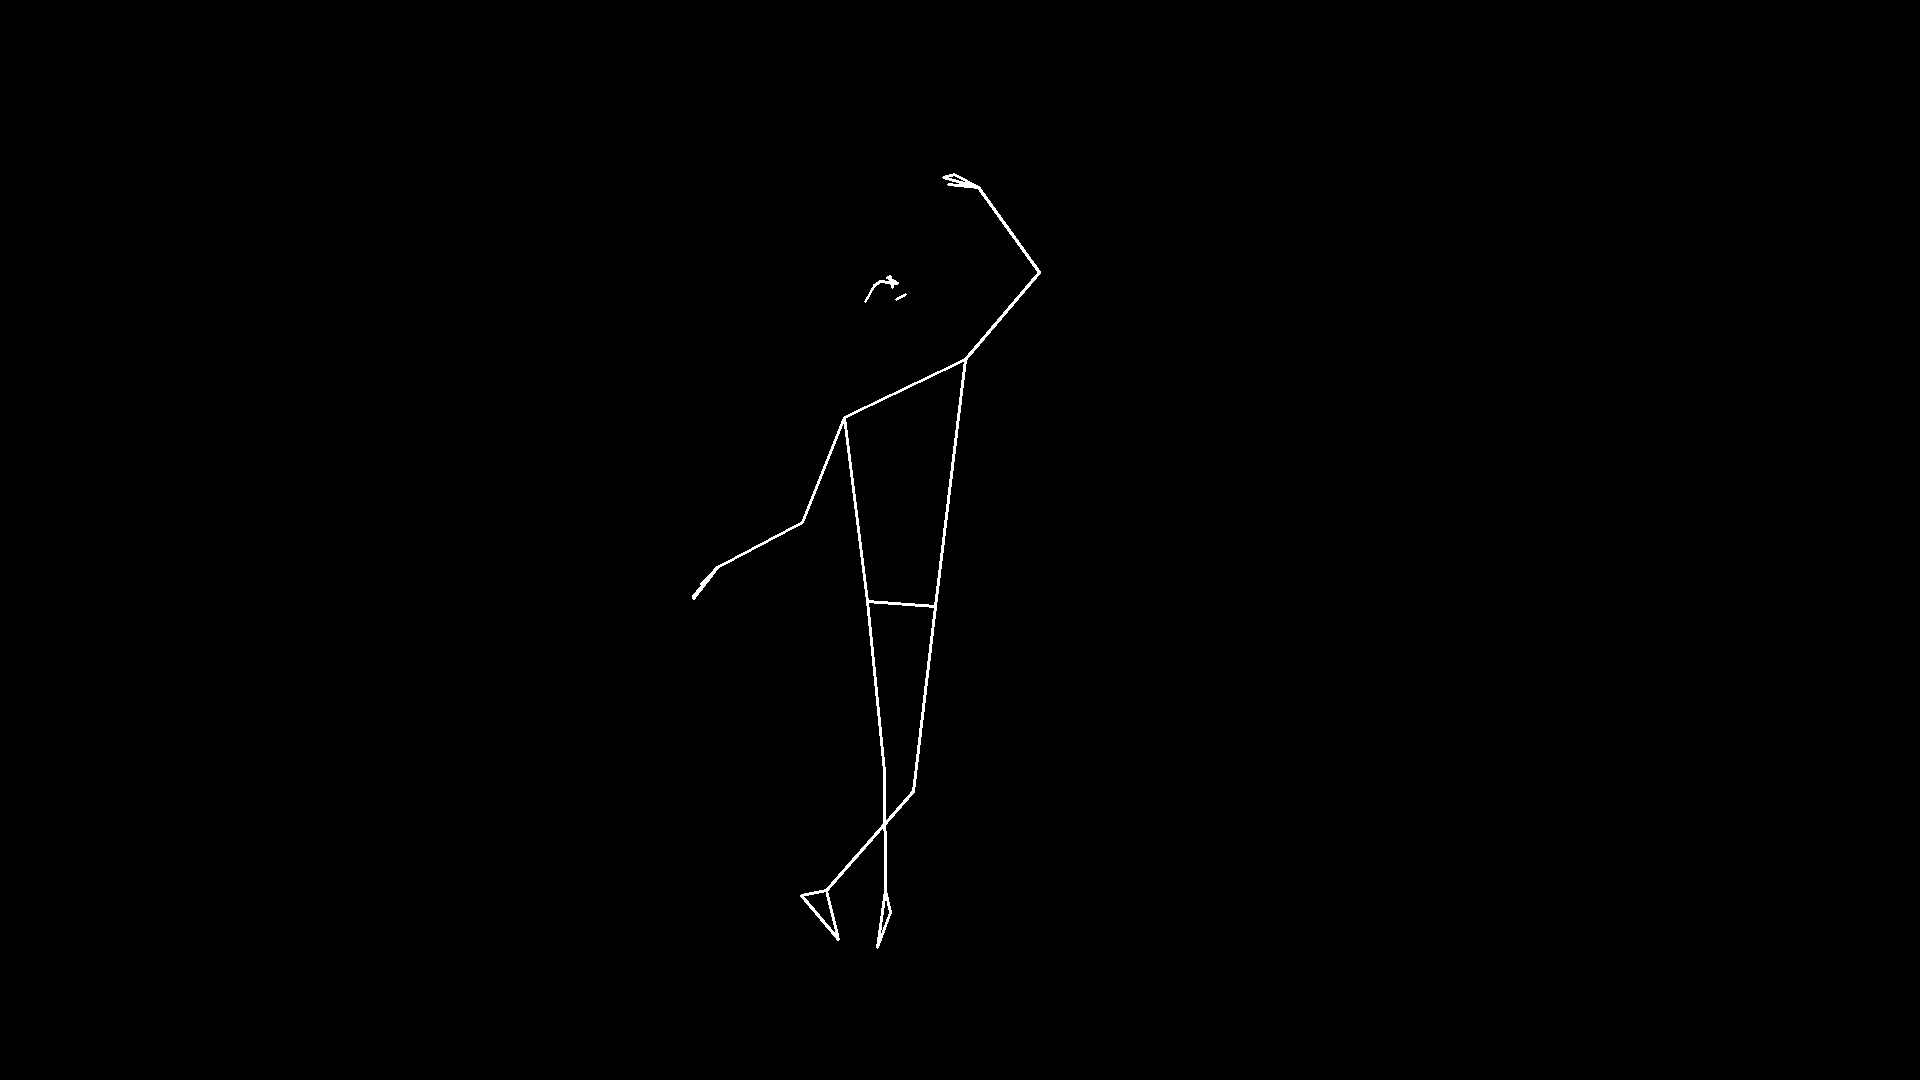

Processing frame 270


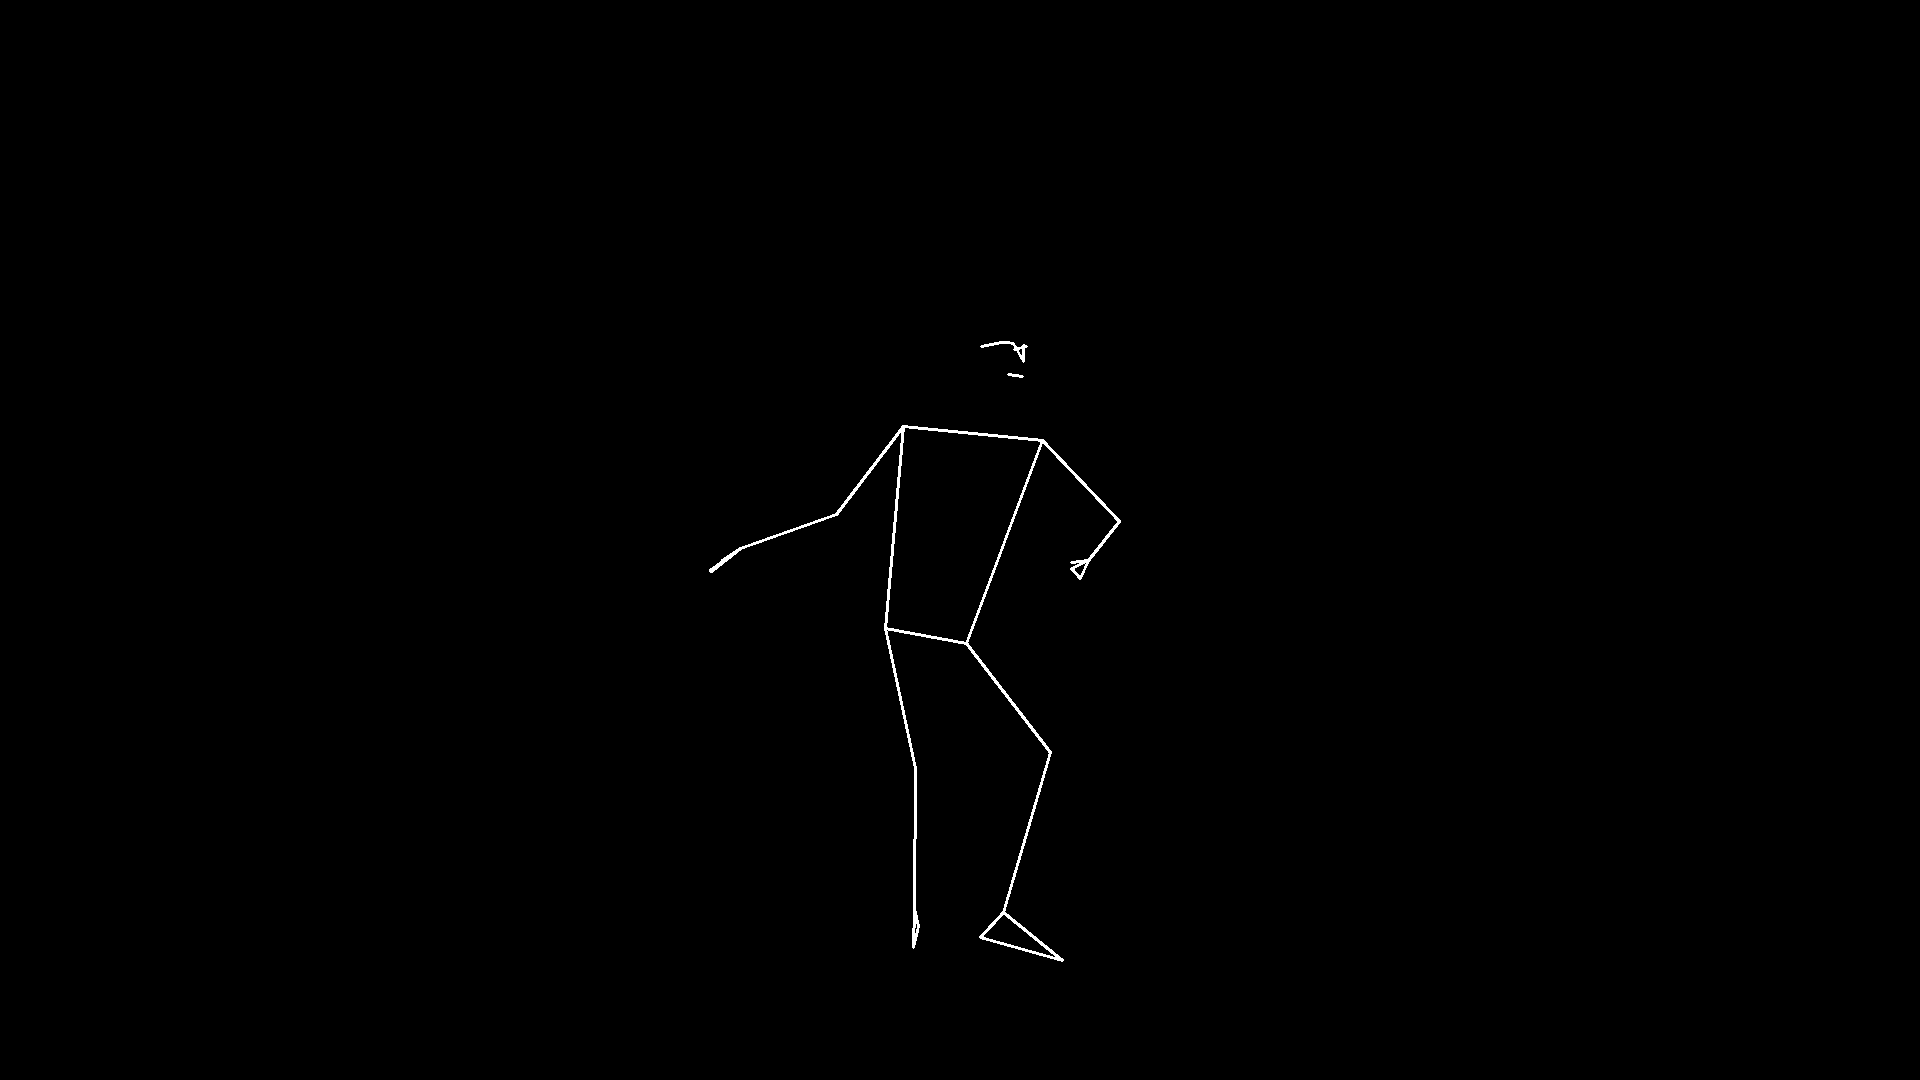

Processing frame 300


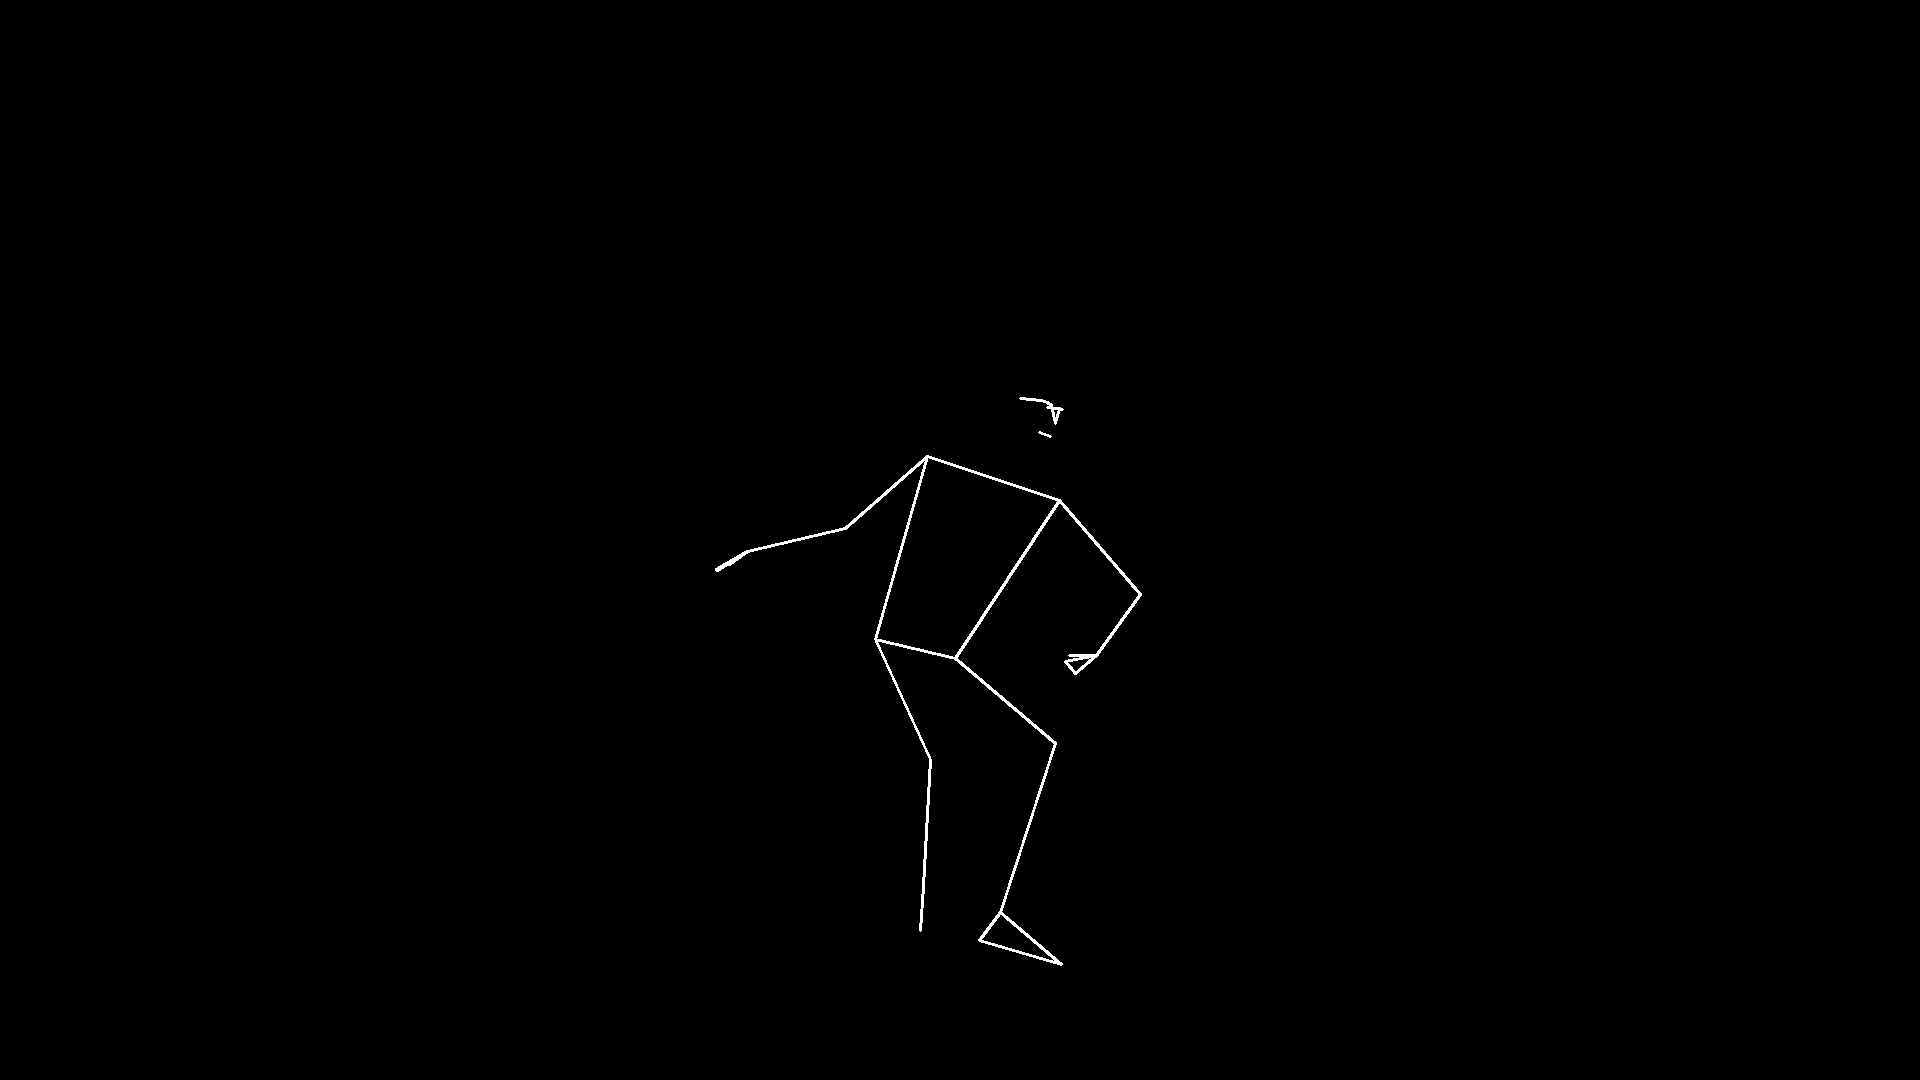

Processing frame 330


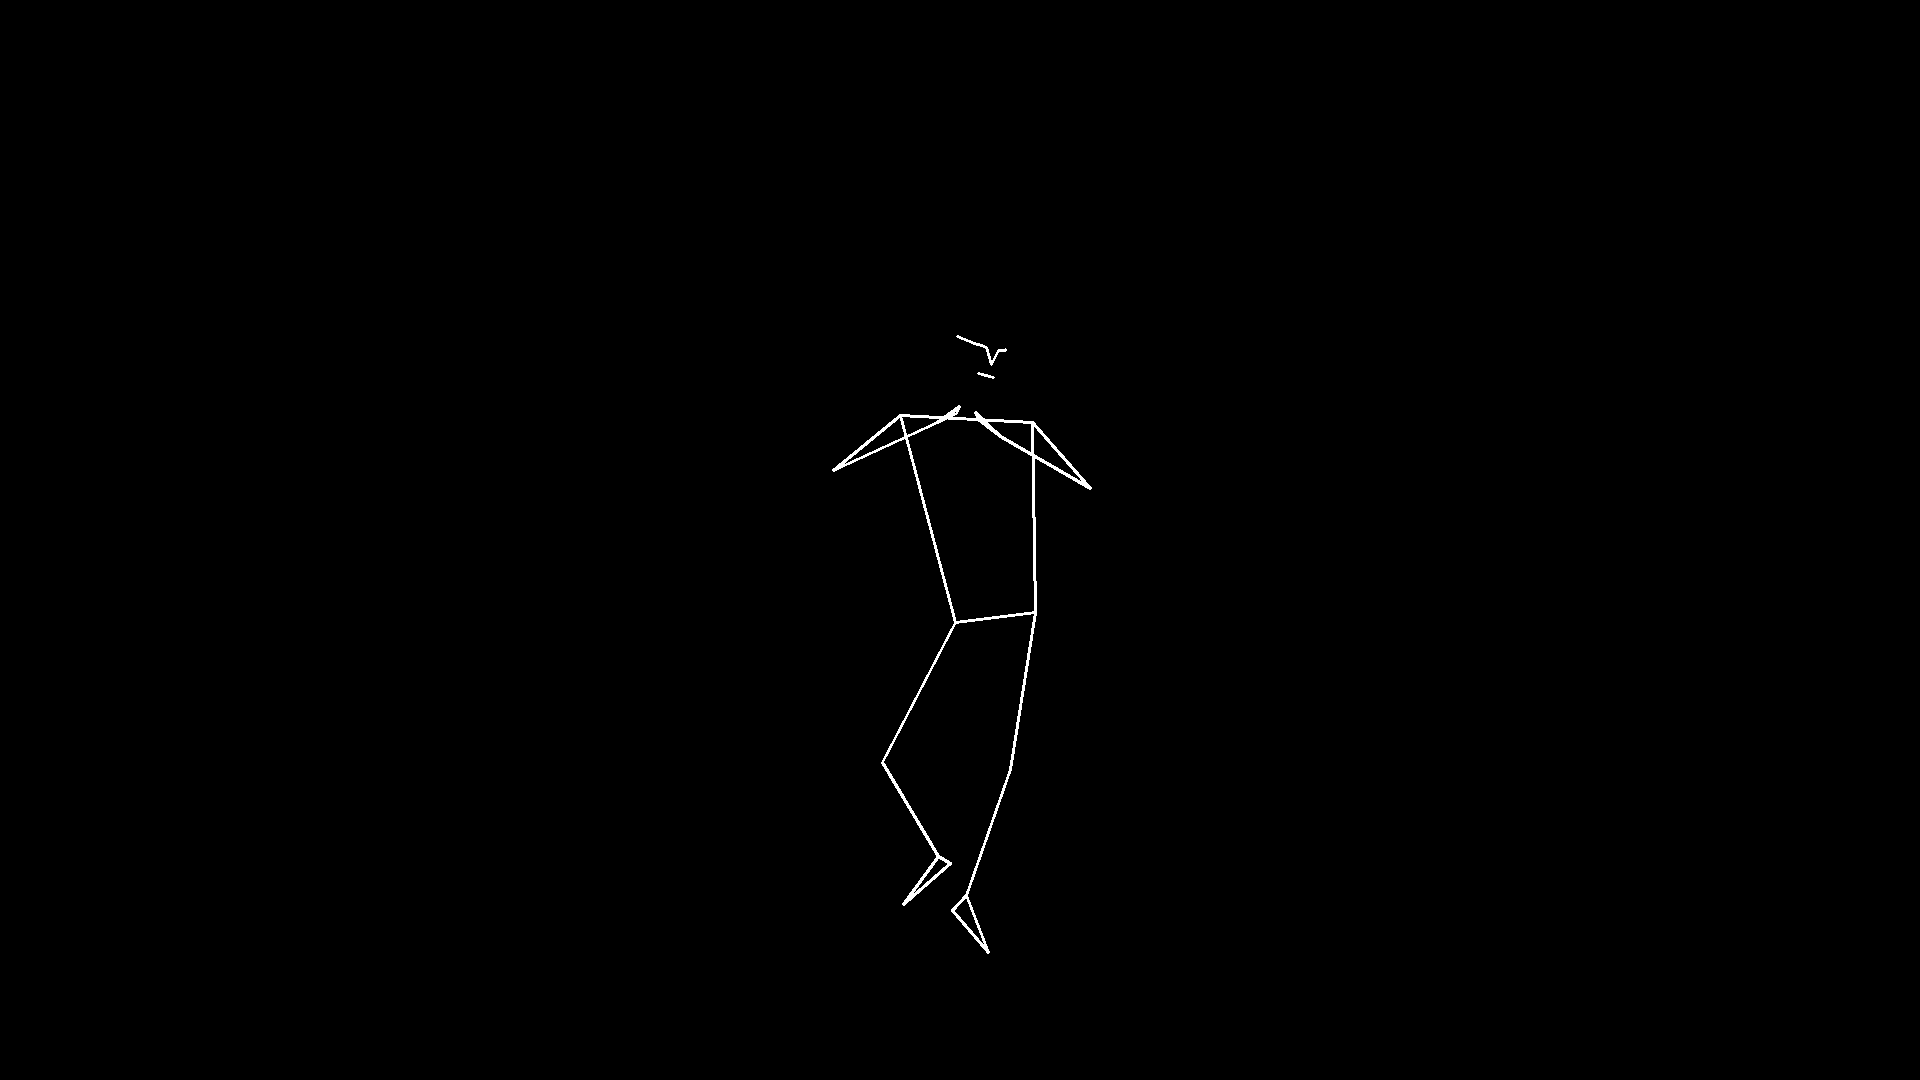

Processing frame 360


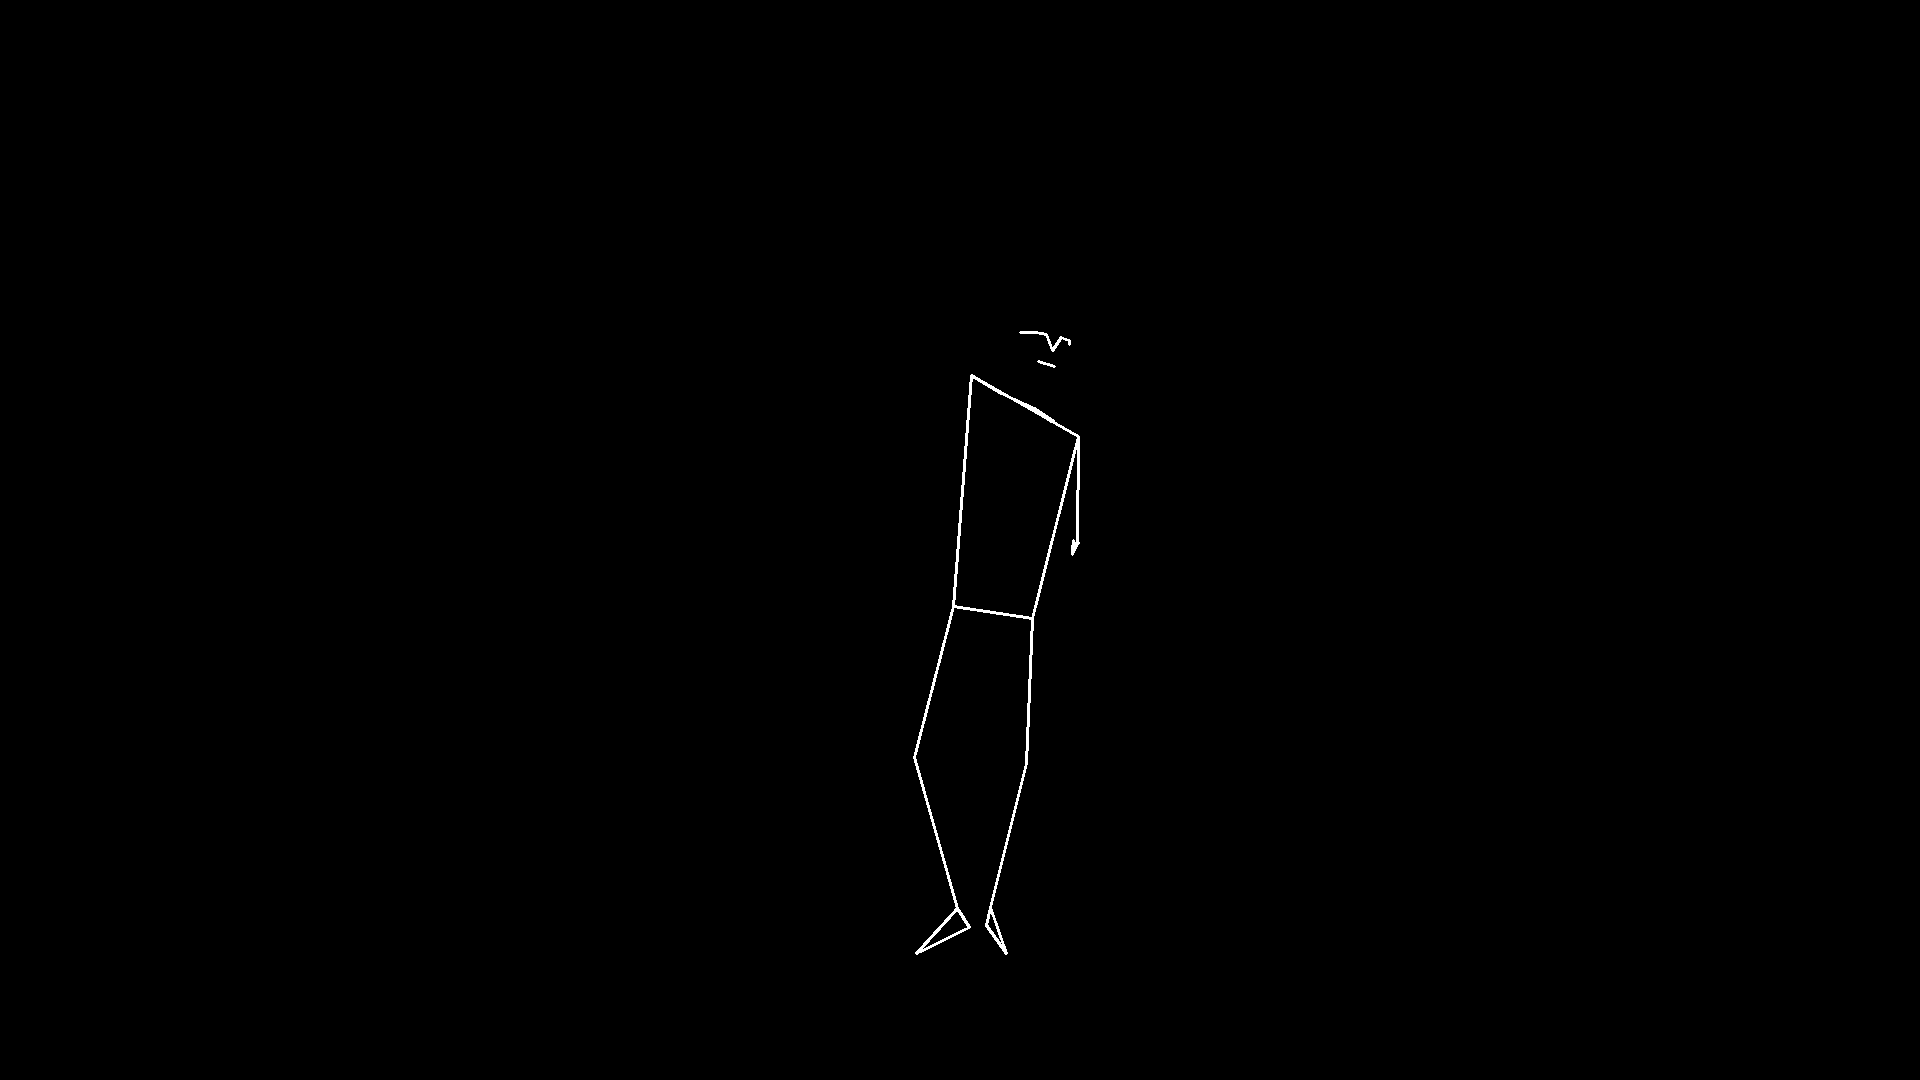

Processing frame 390


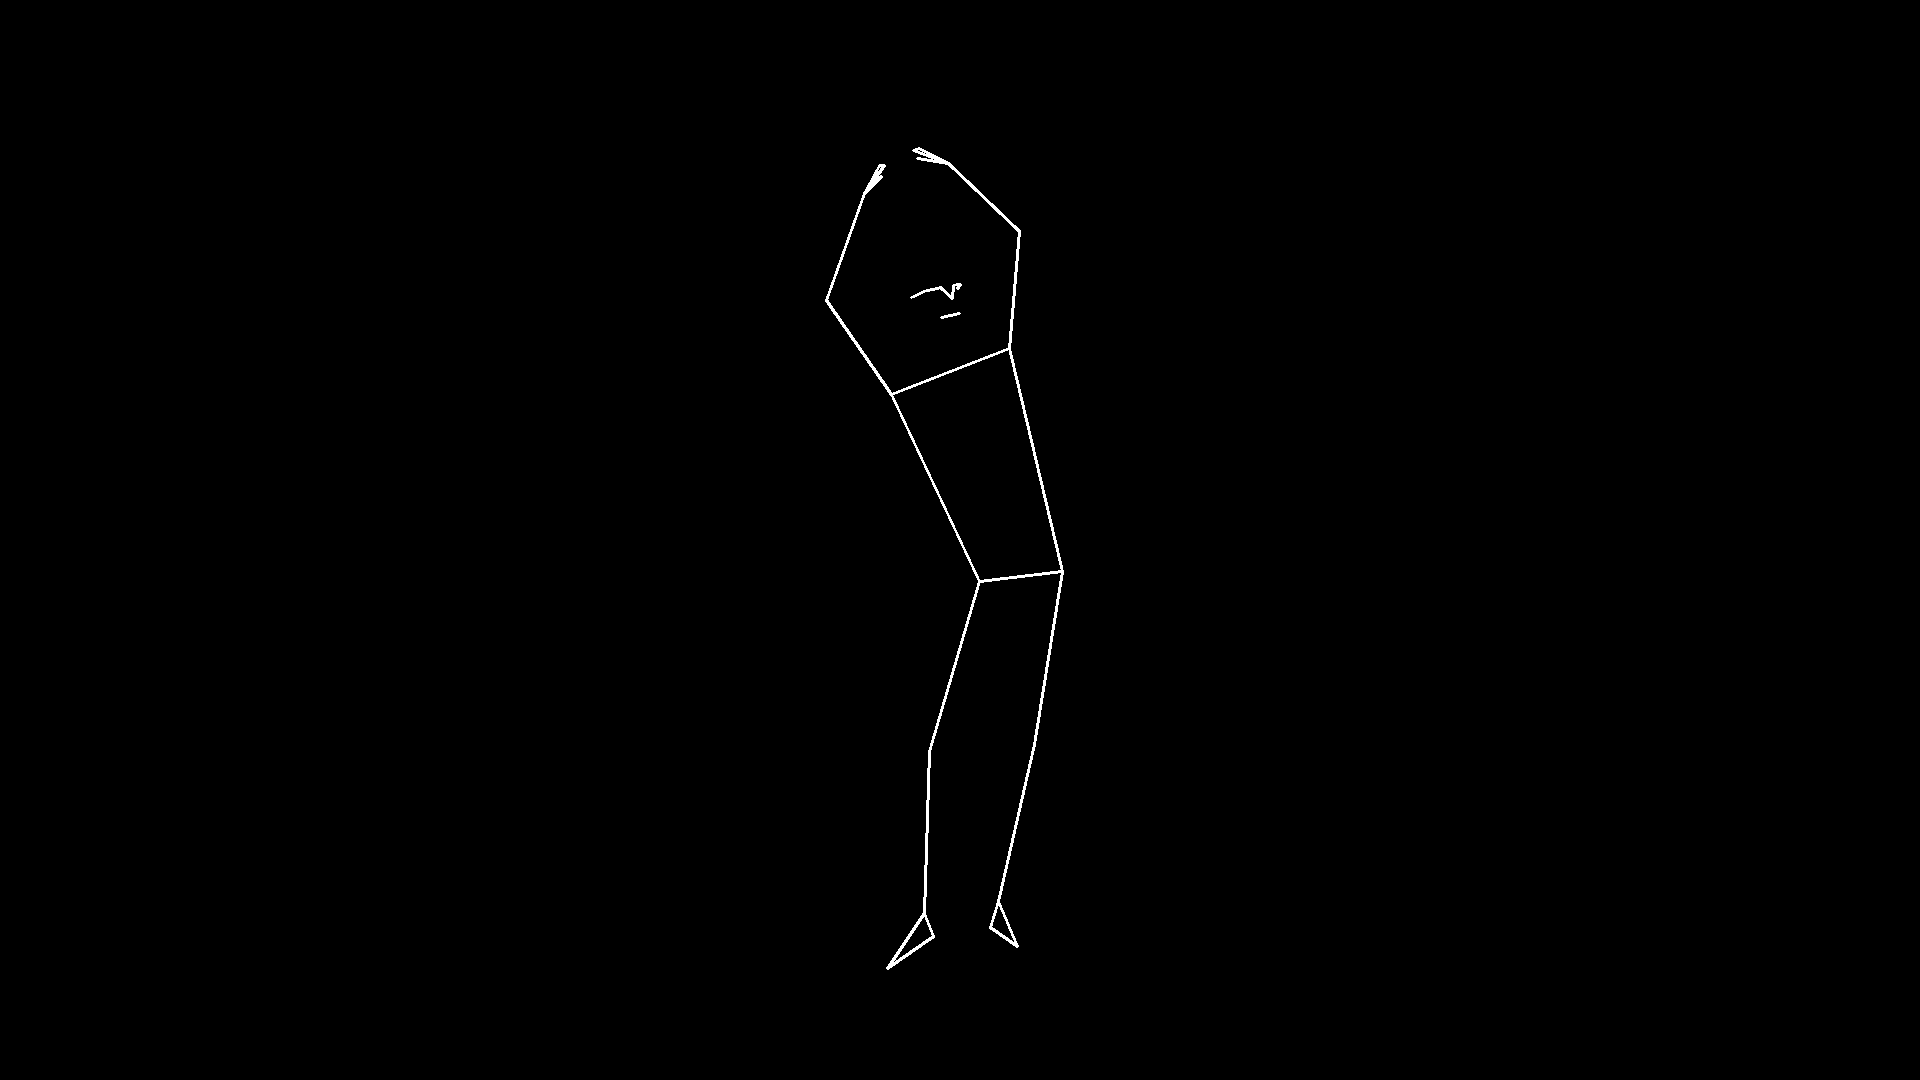

Processing frame 420


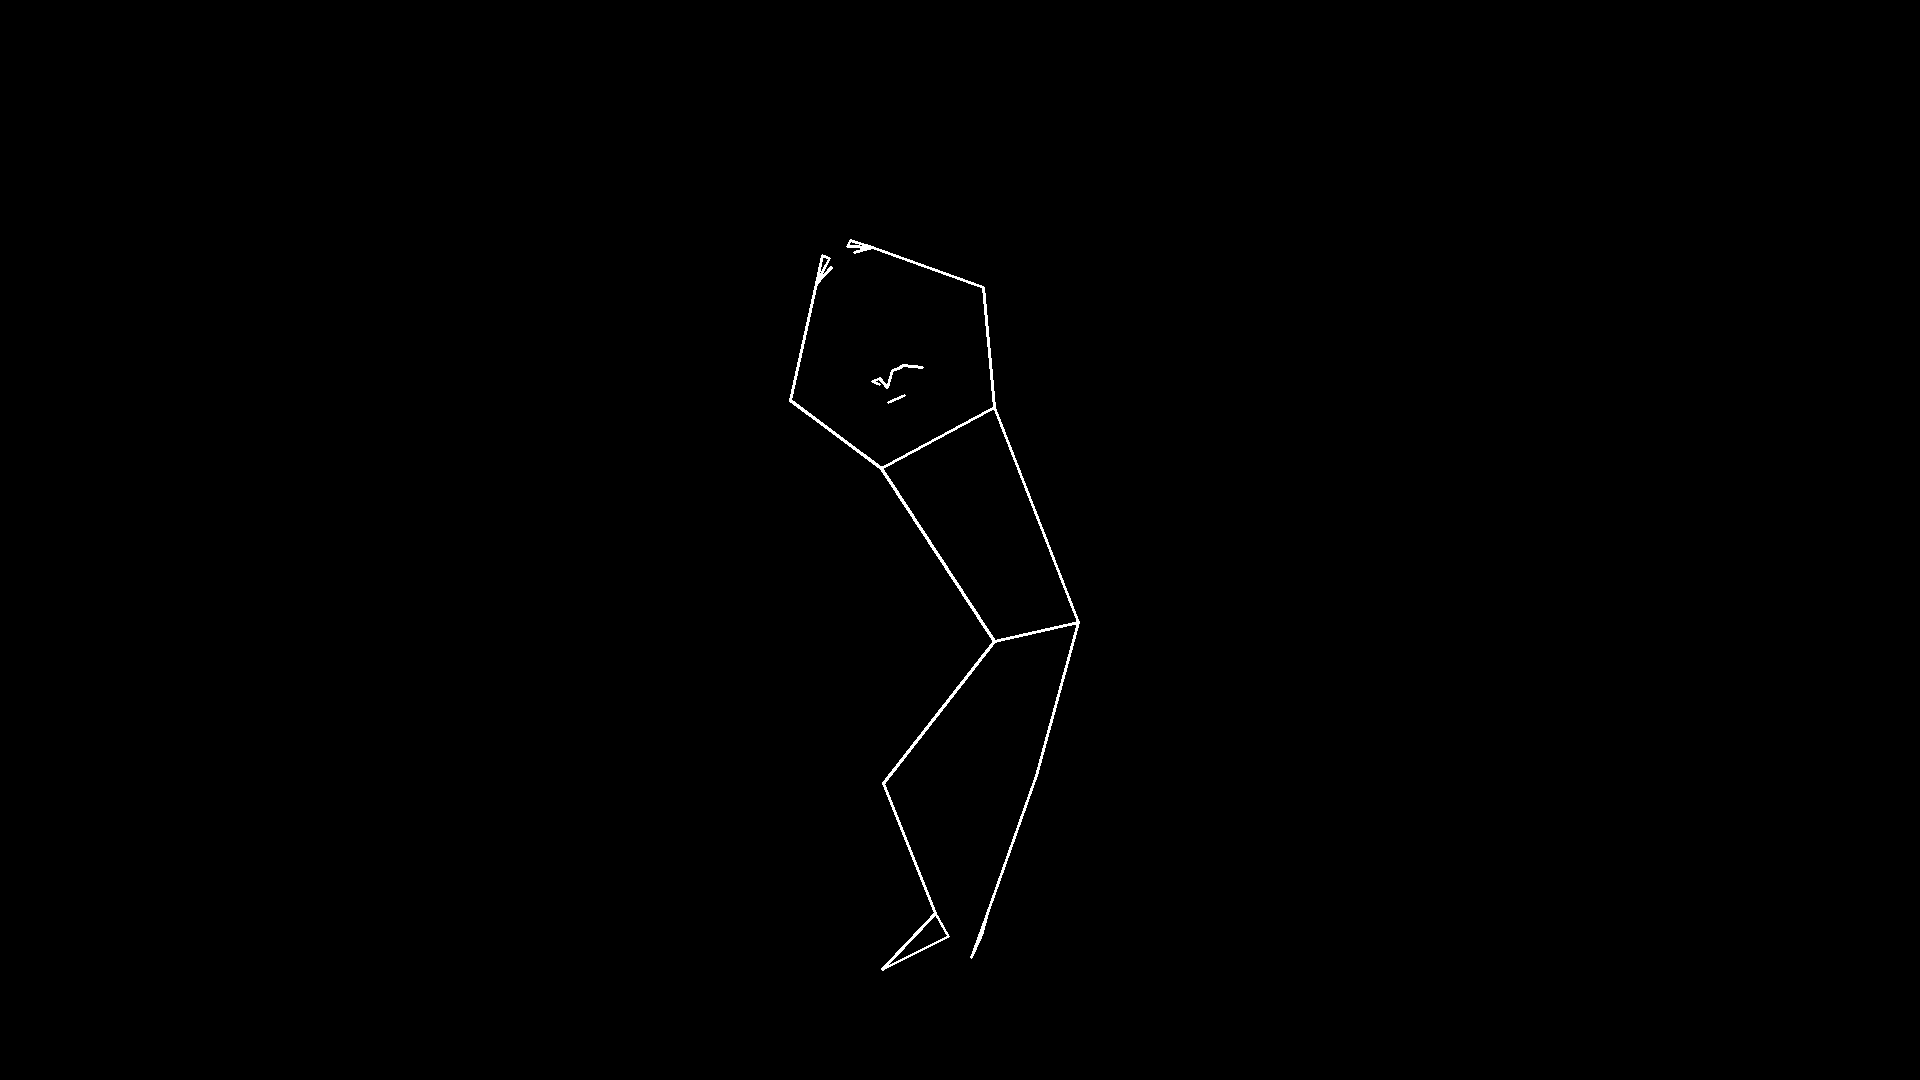

Processing frame 450


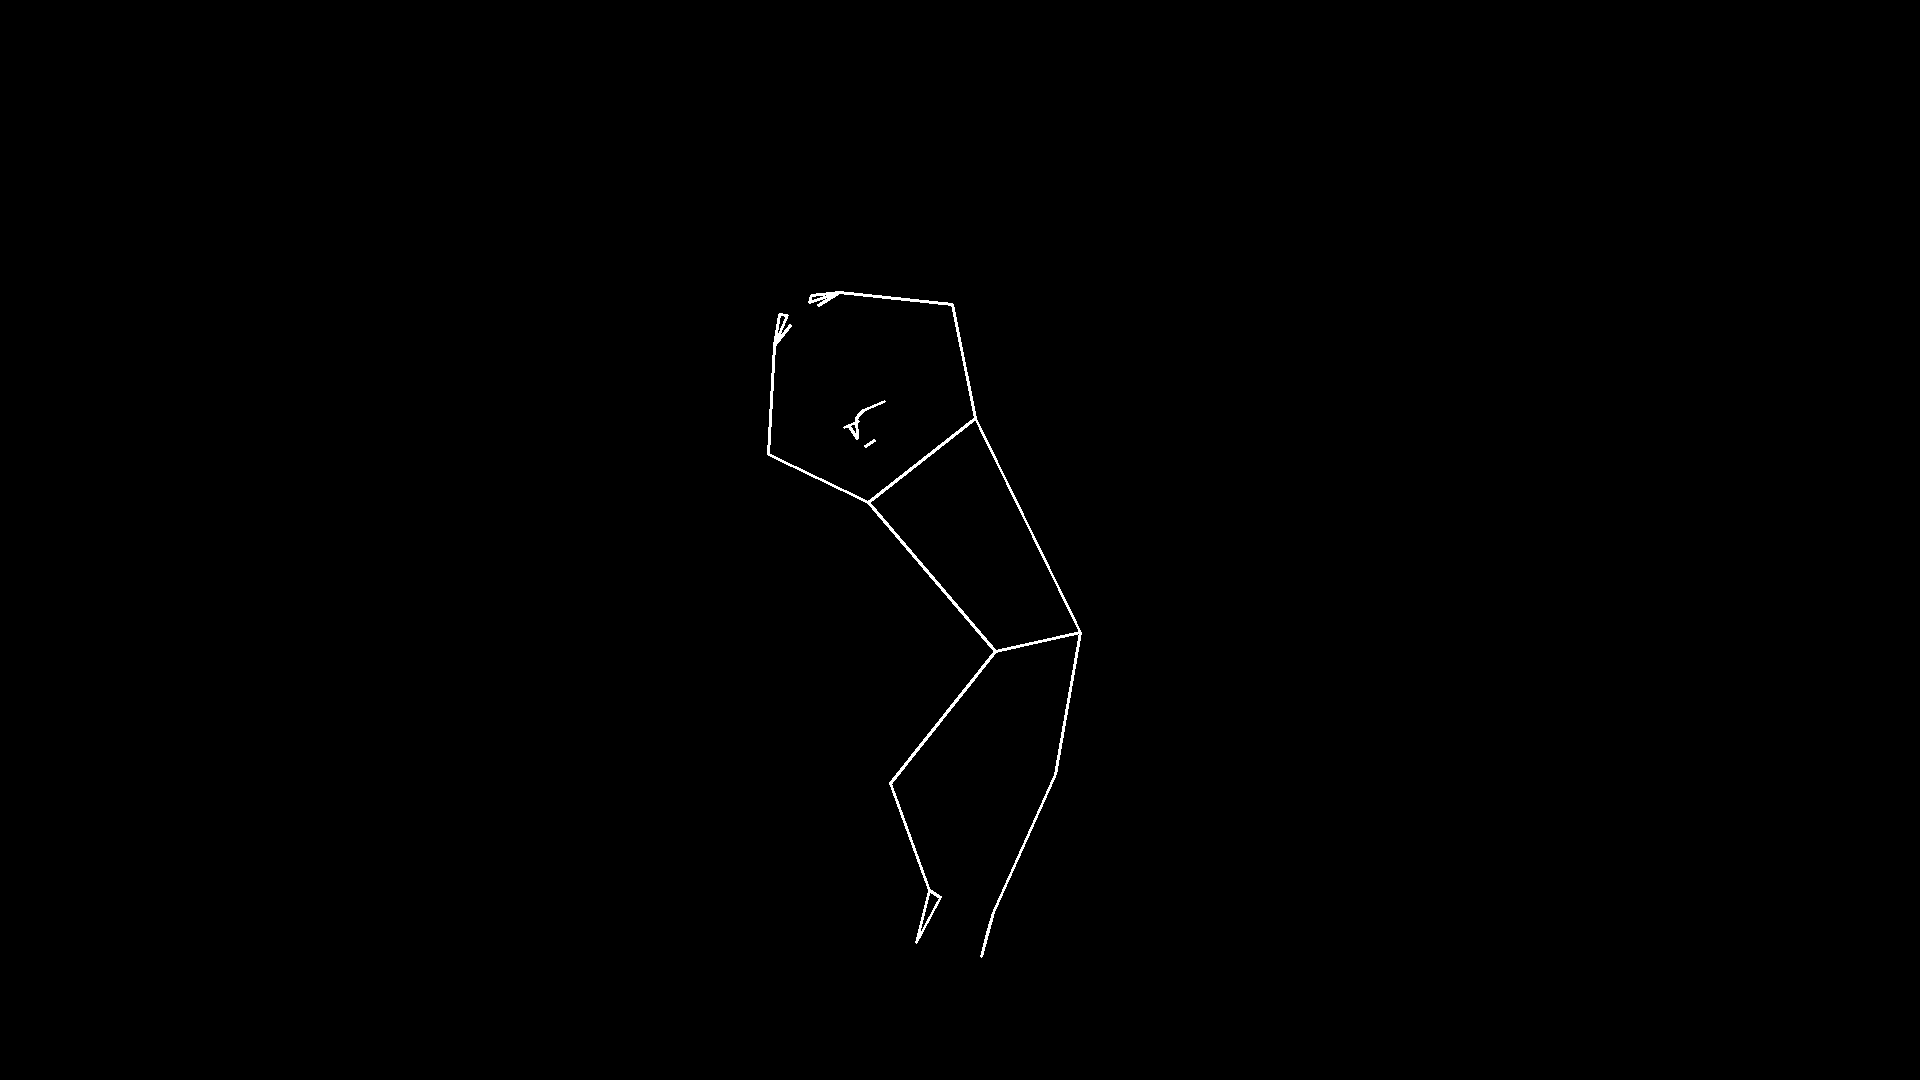

Processing frame 480


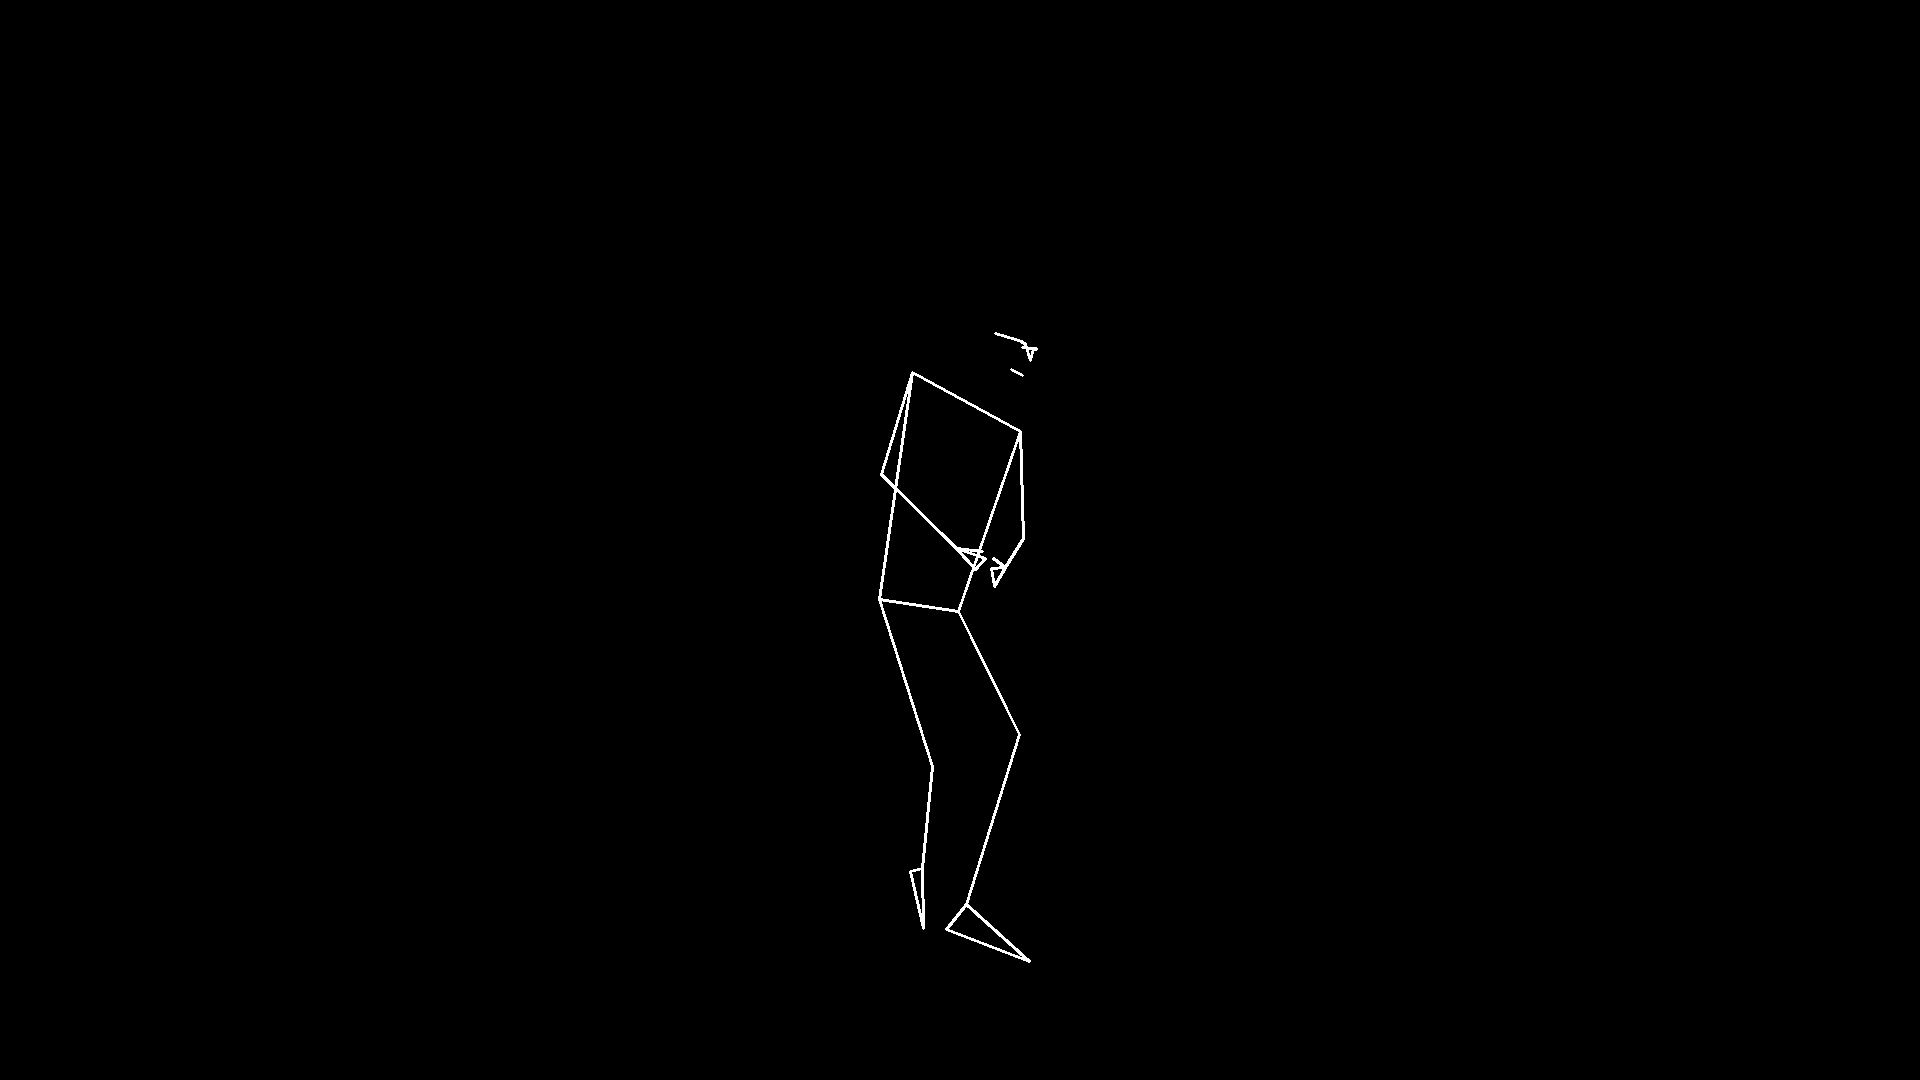

Processing frame 510


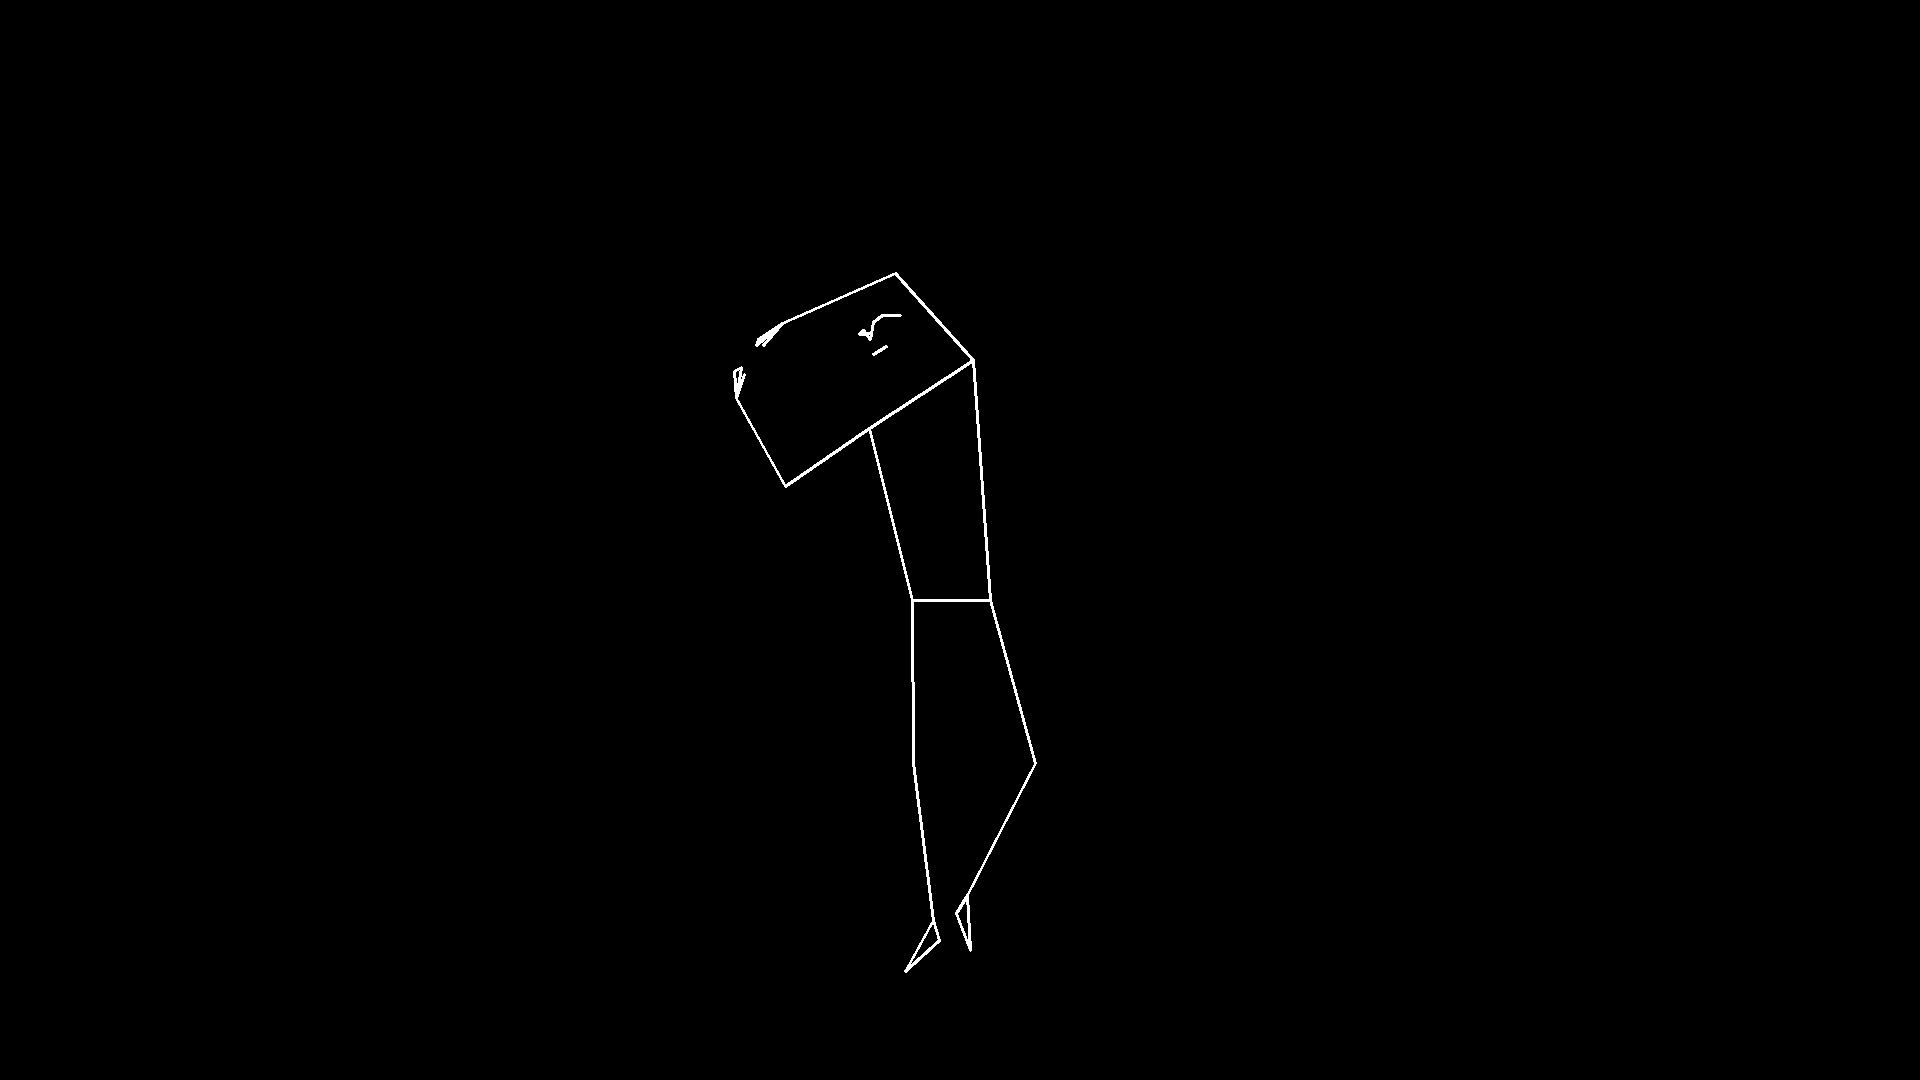

Processing frame 540


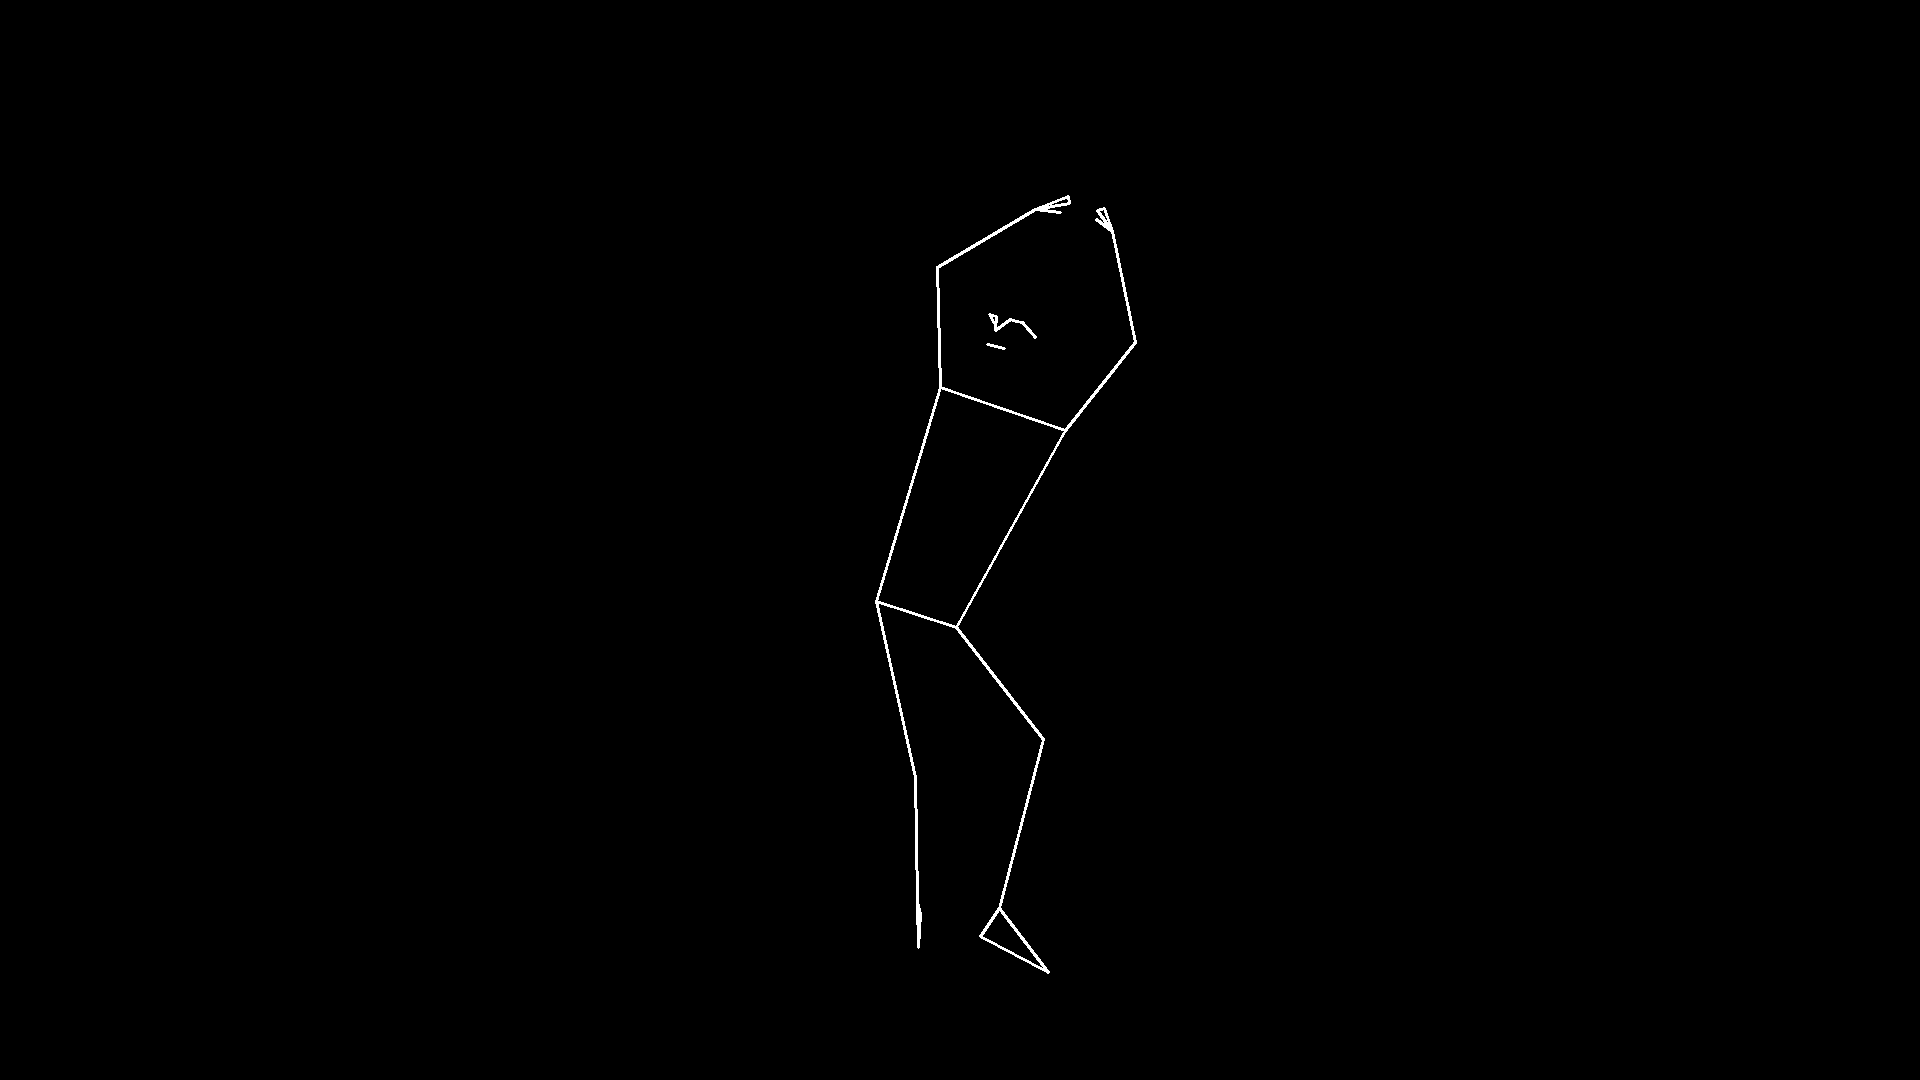

Processing frame 570


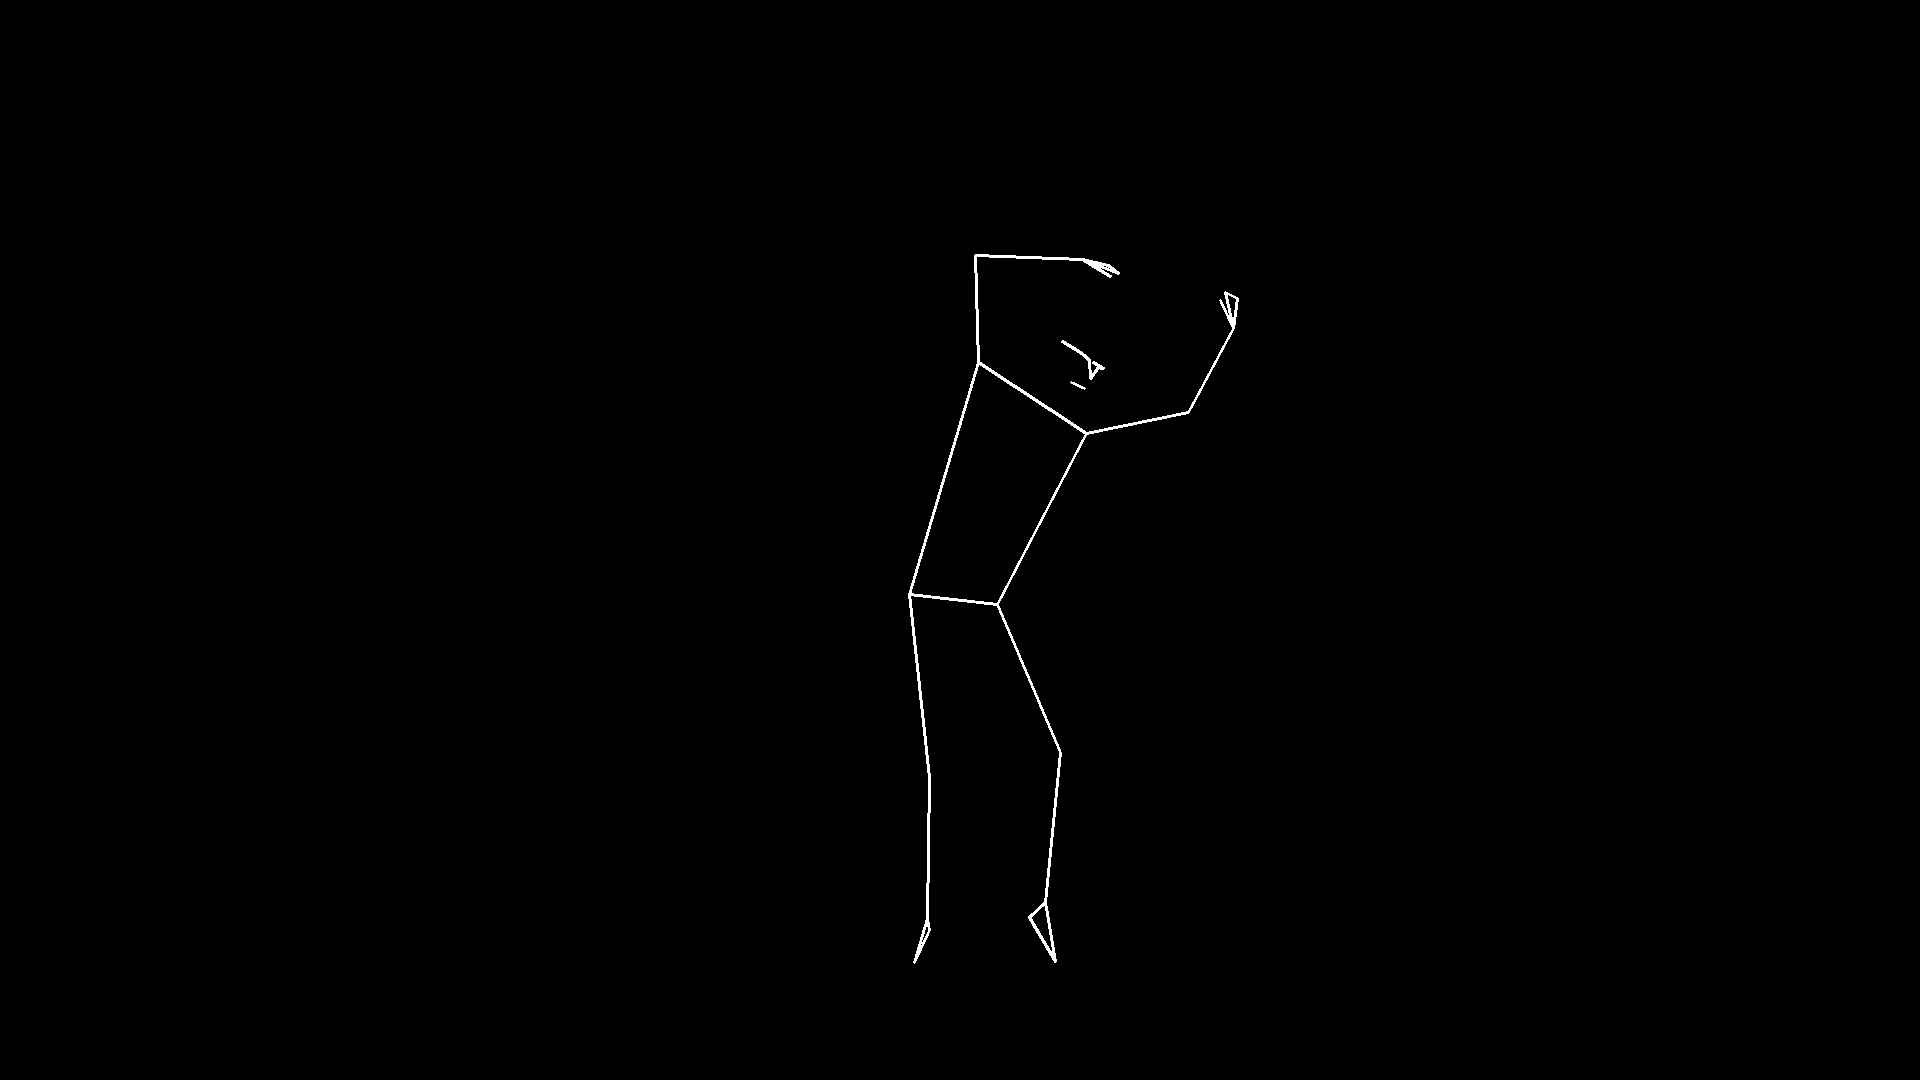

Processing frame 600


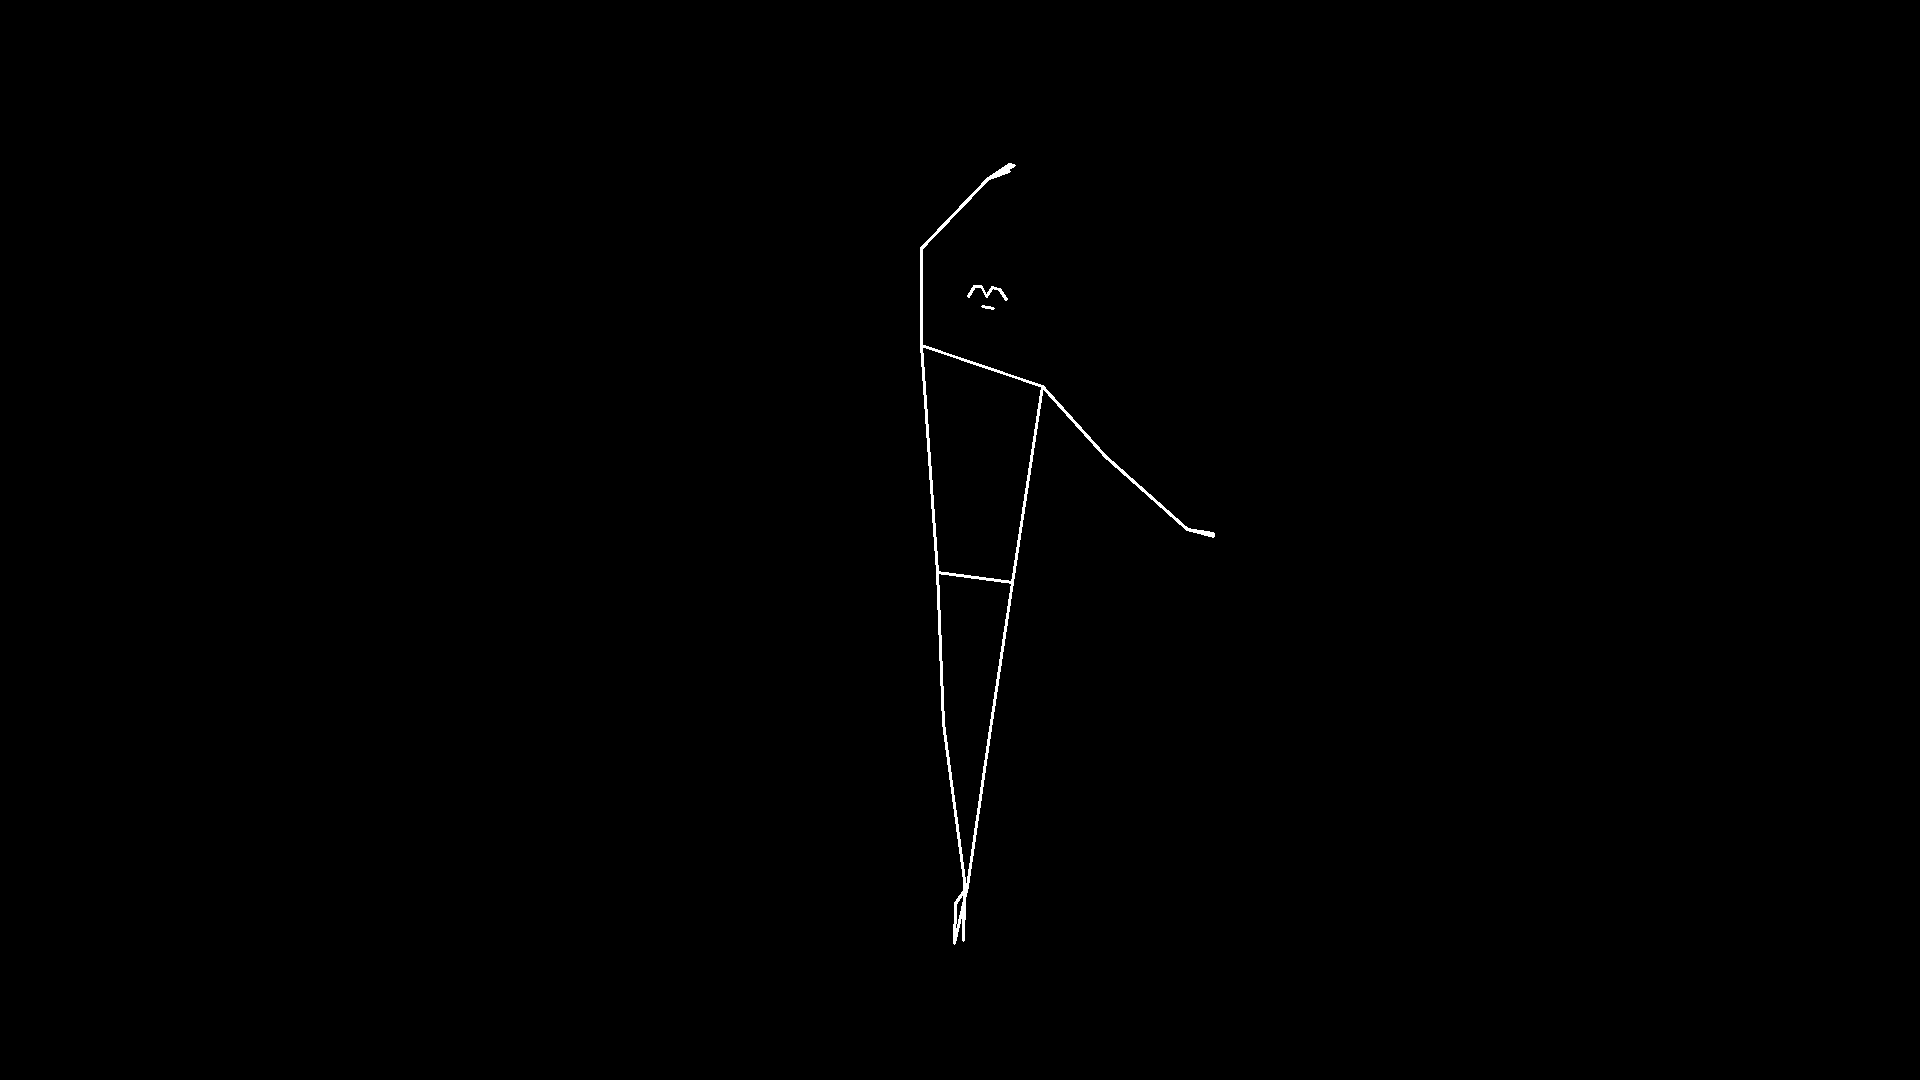

Processing frame 630


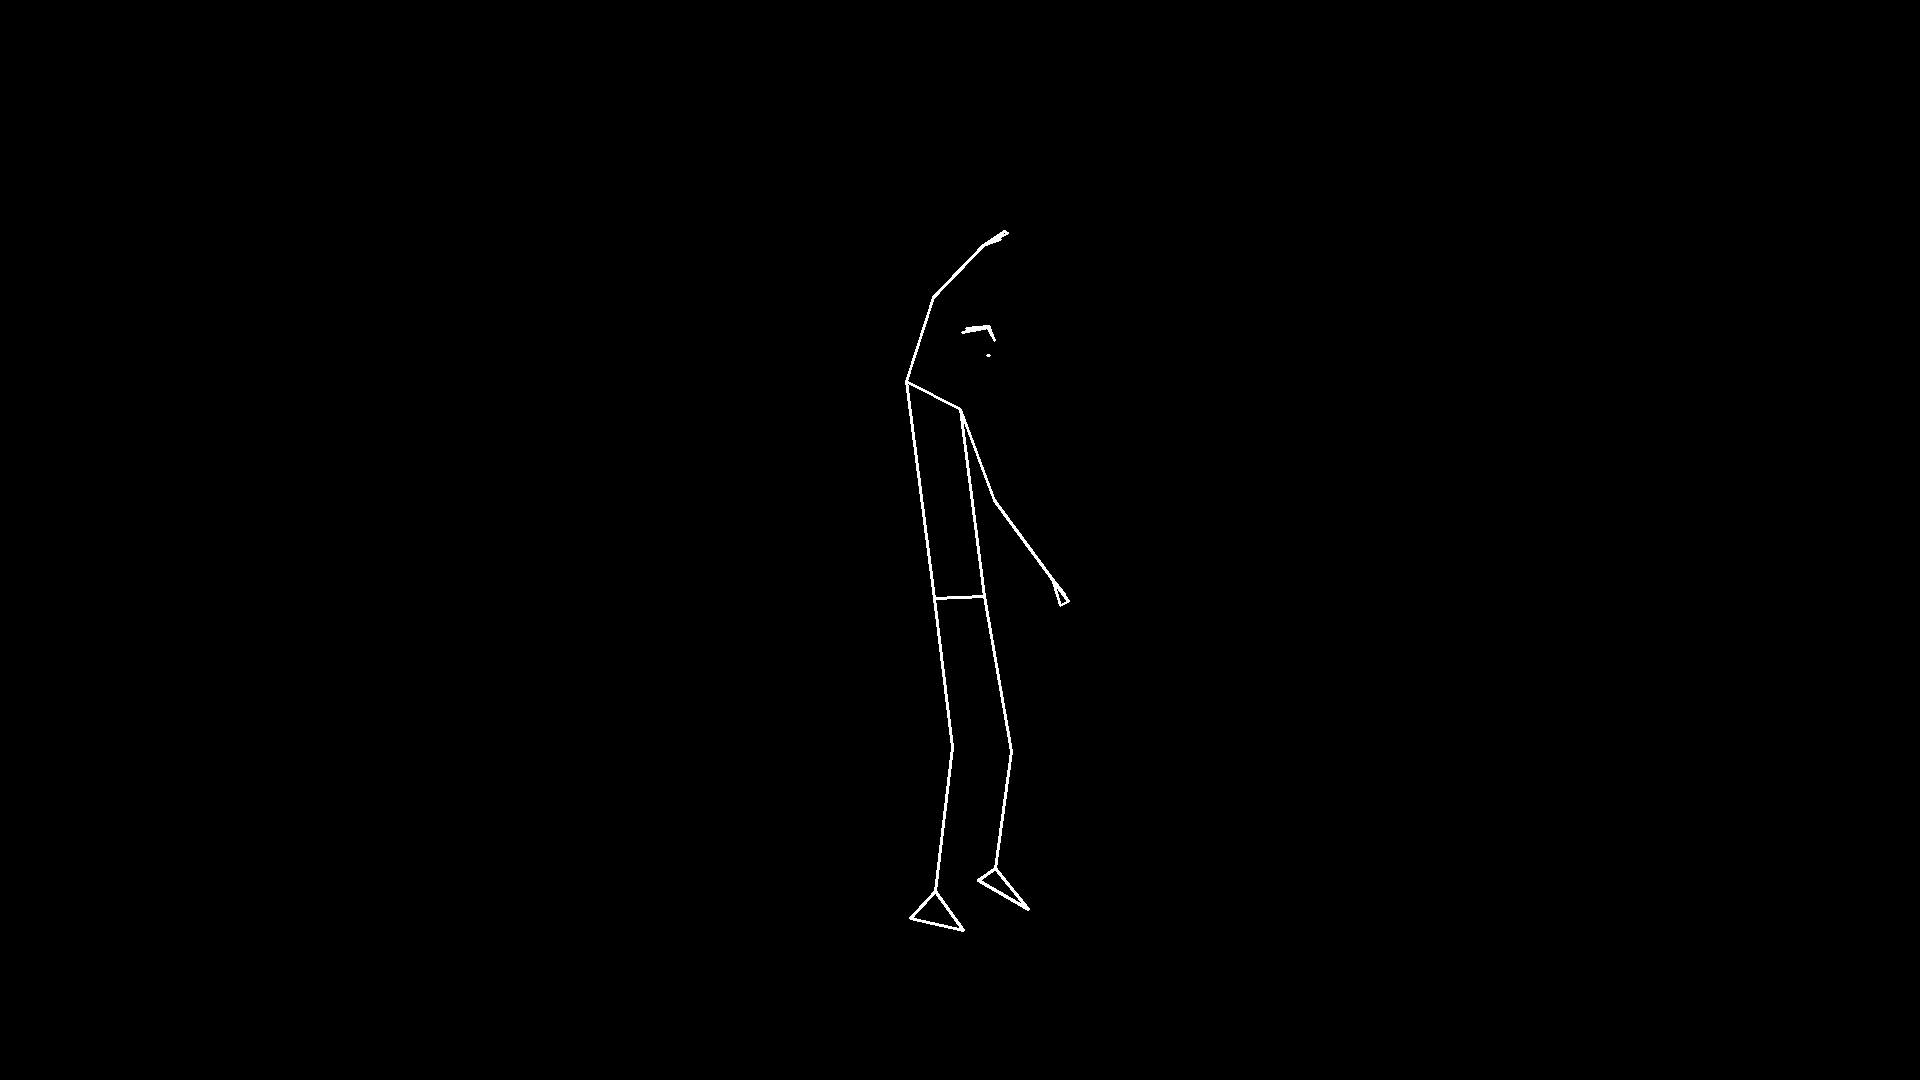

Processing frame 660


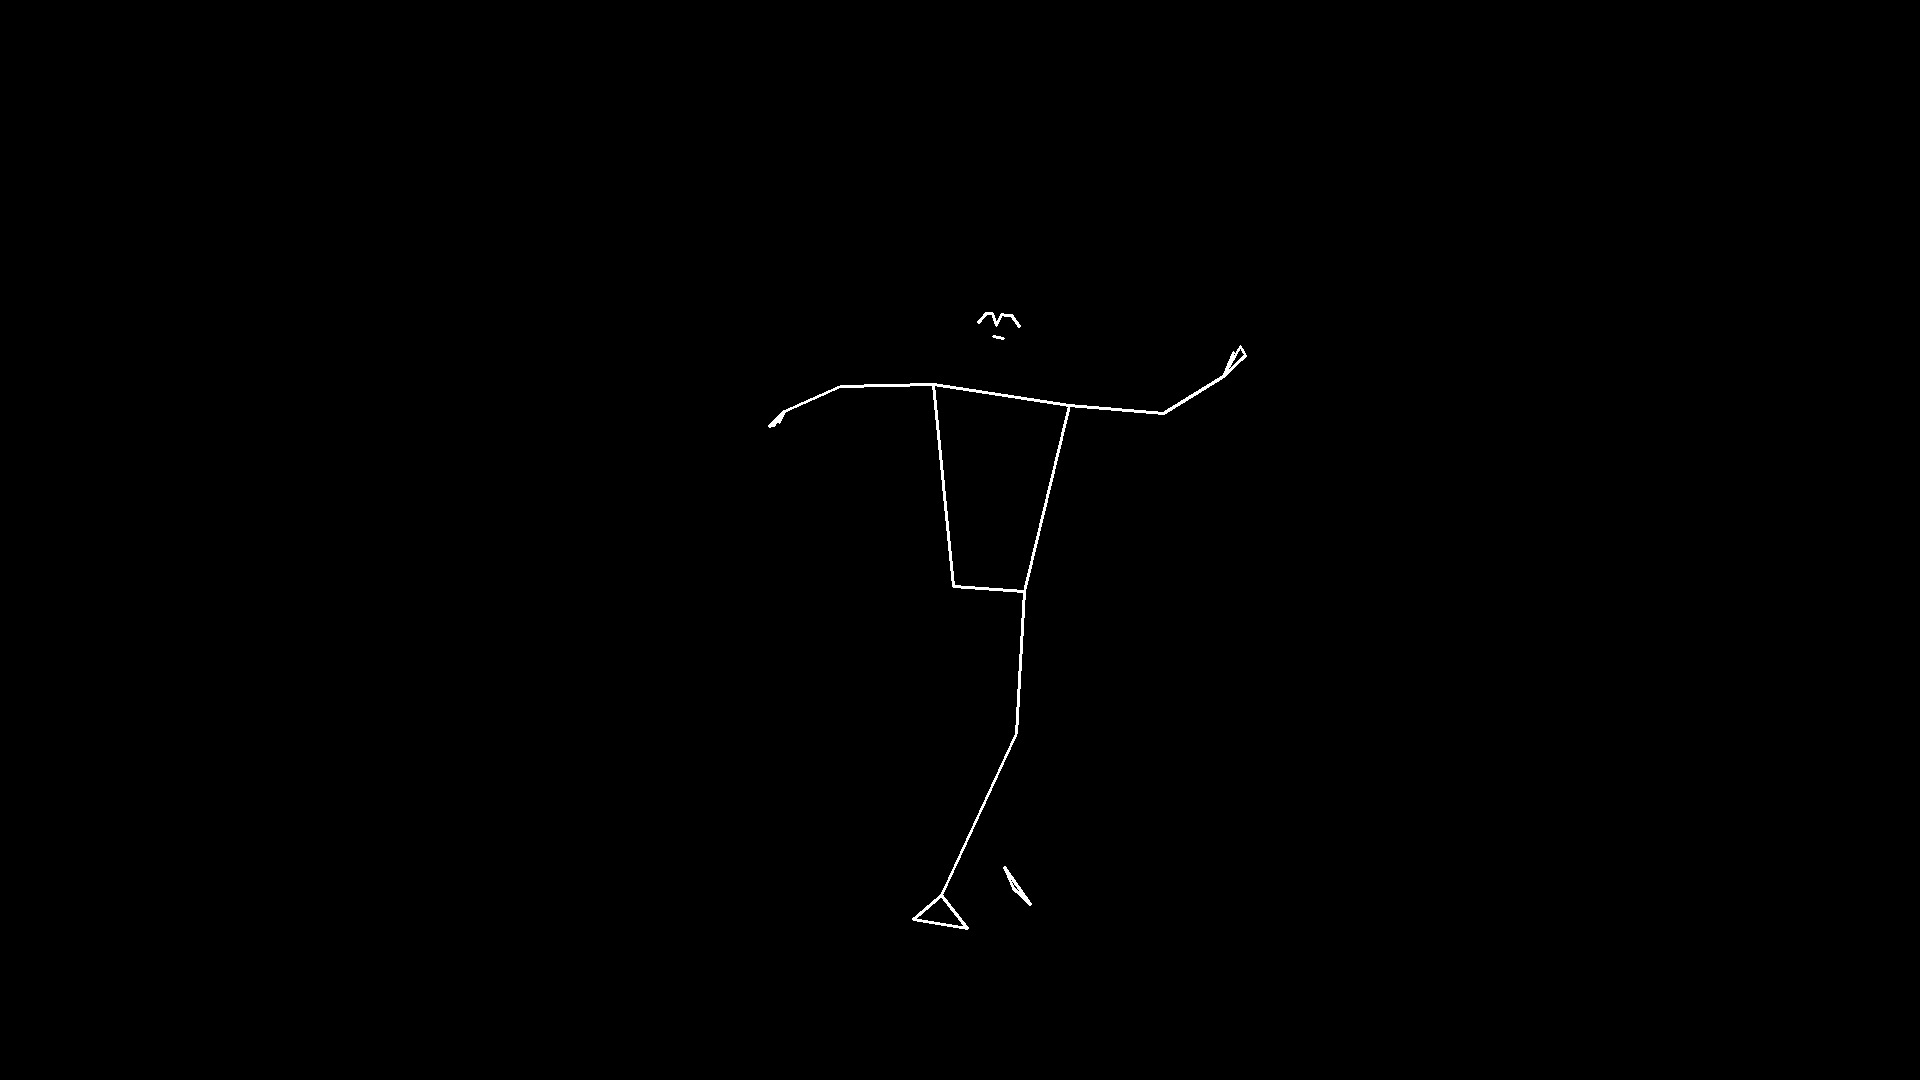

Processing frame 690


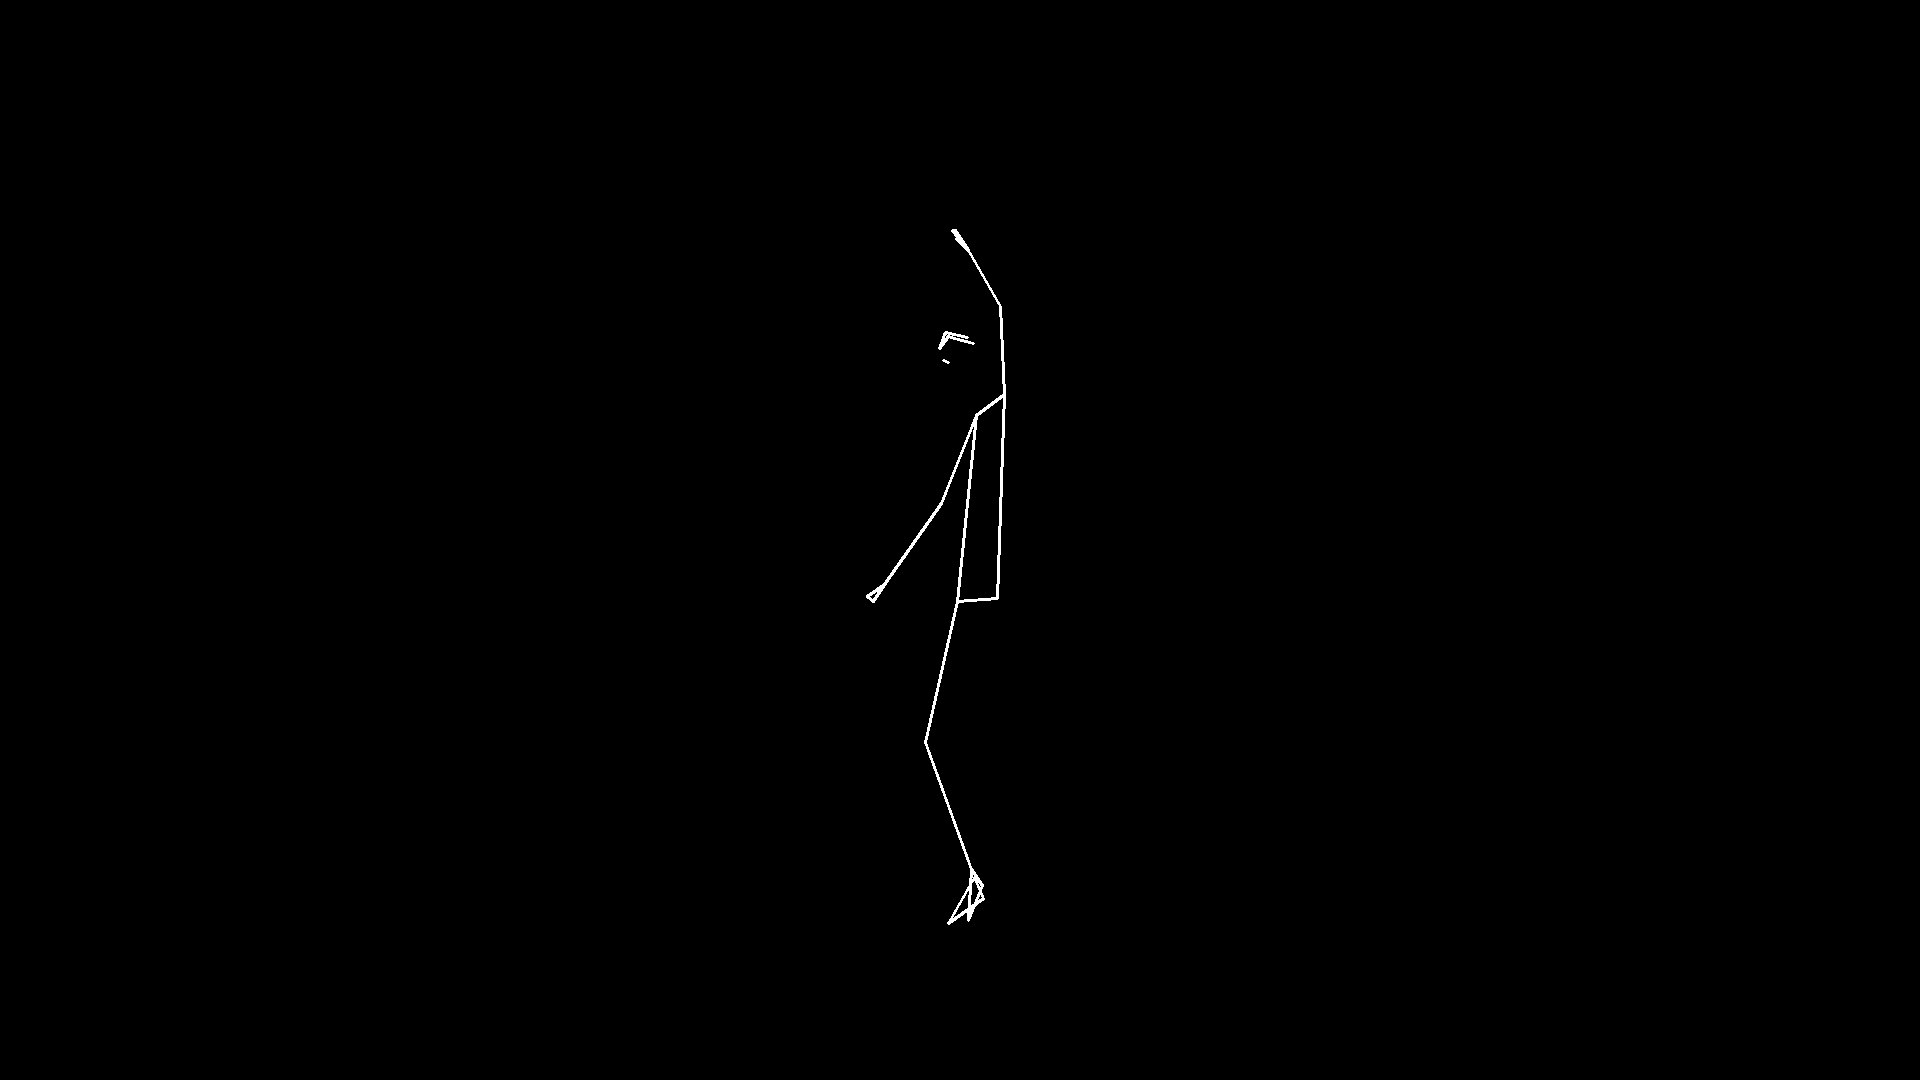

Processing frame 720


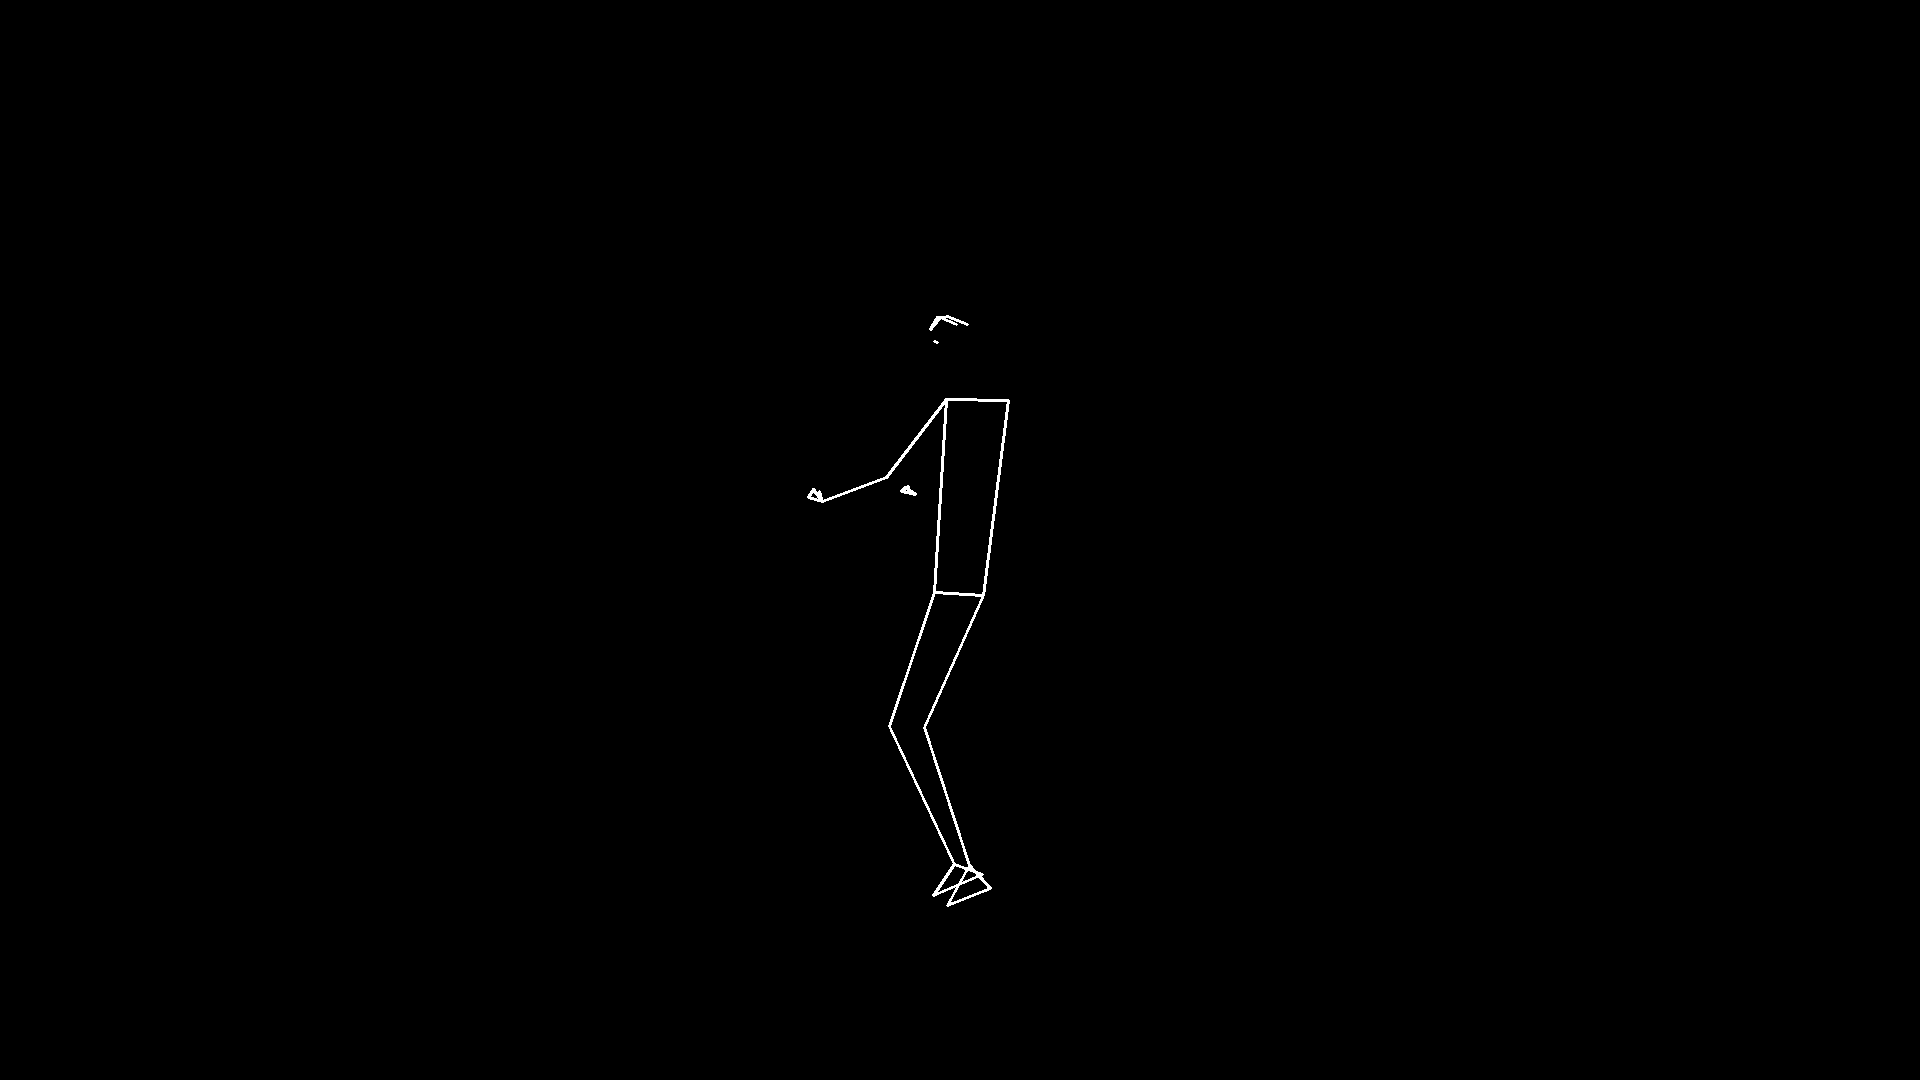

Processing frame 750


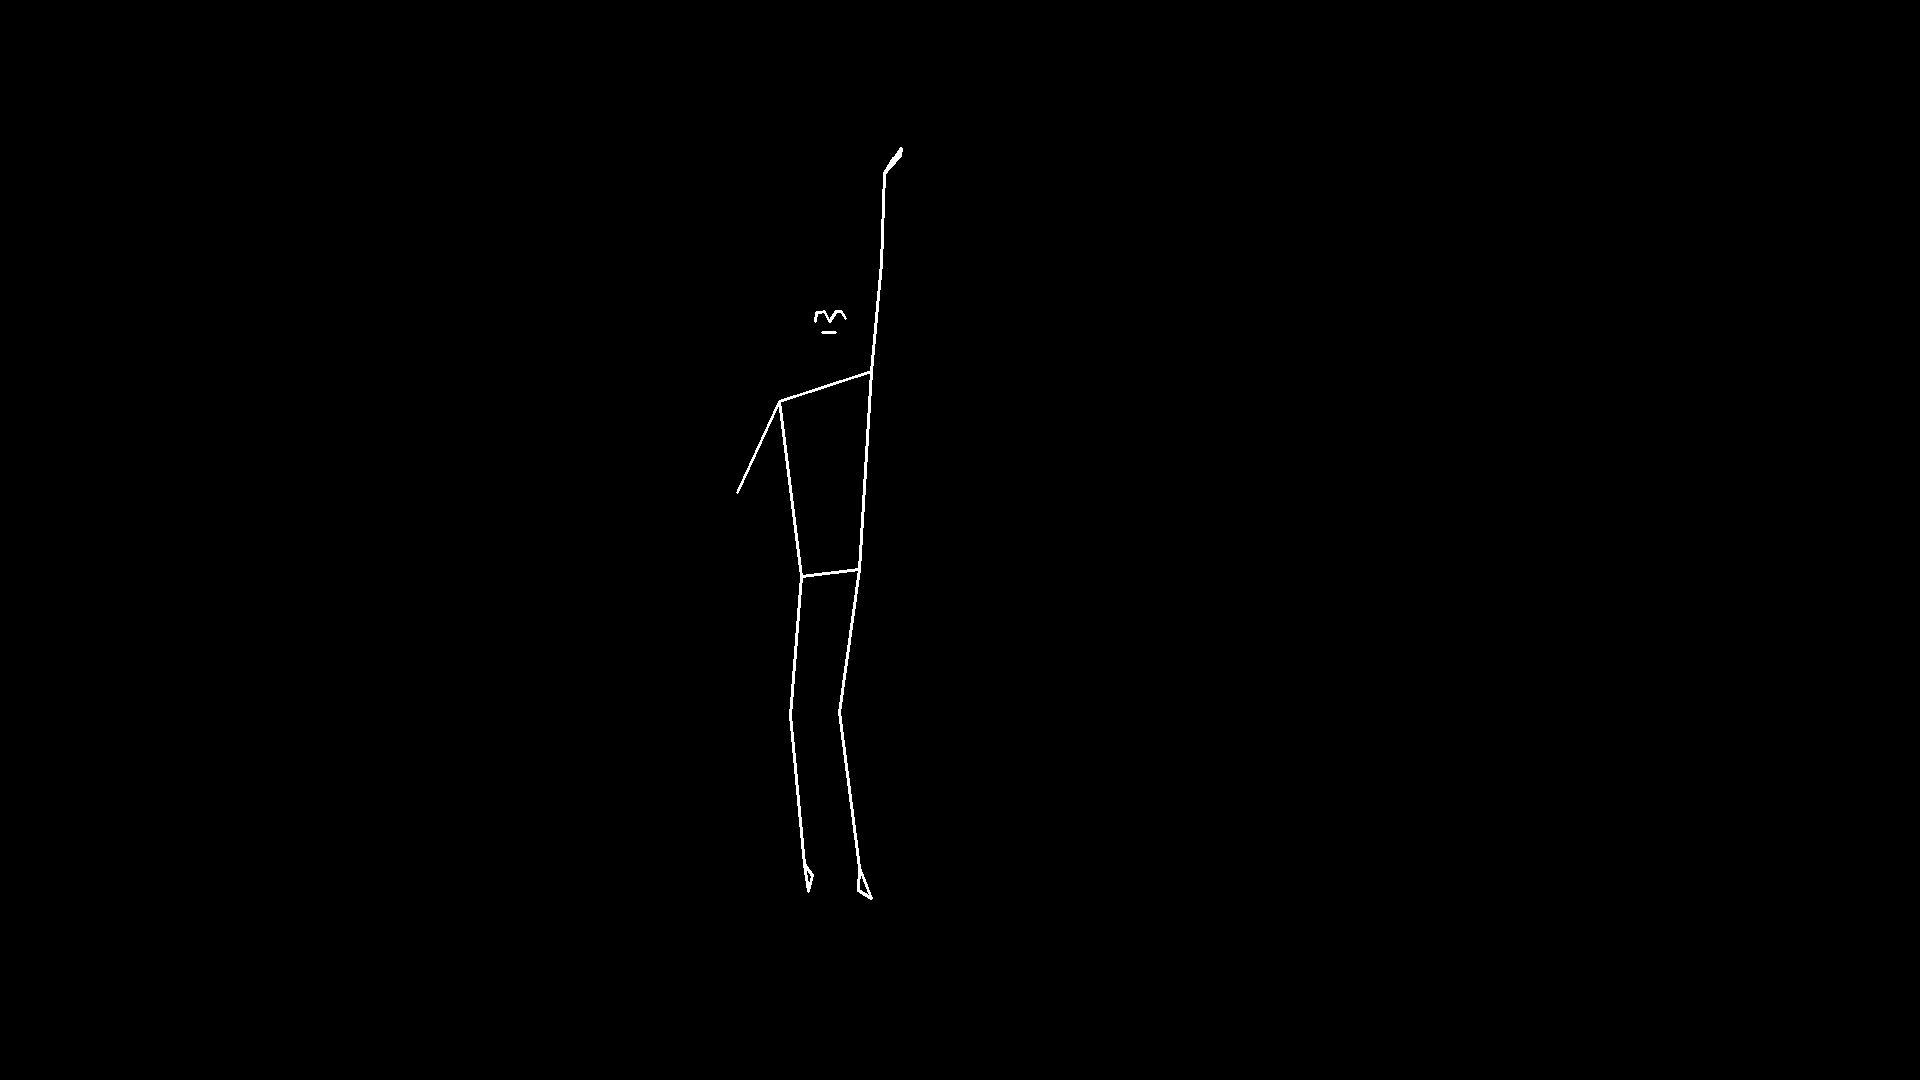

Processing frame 780


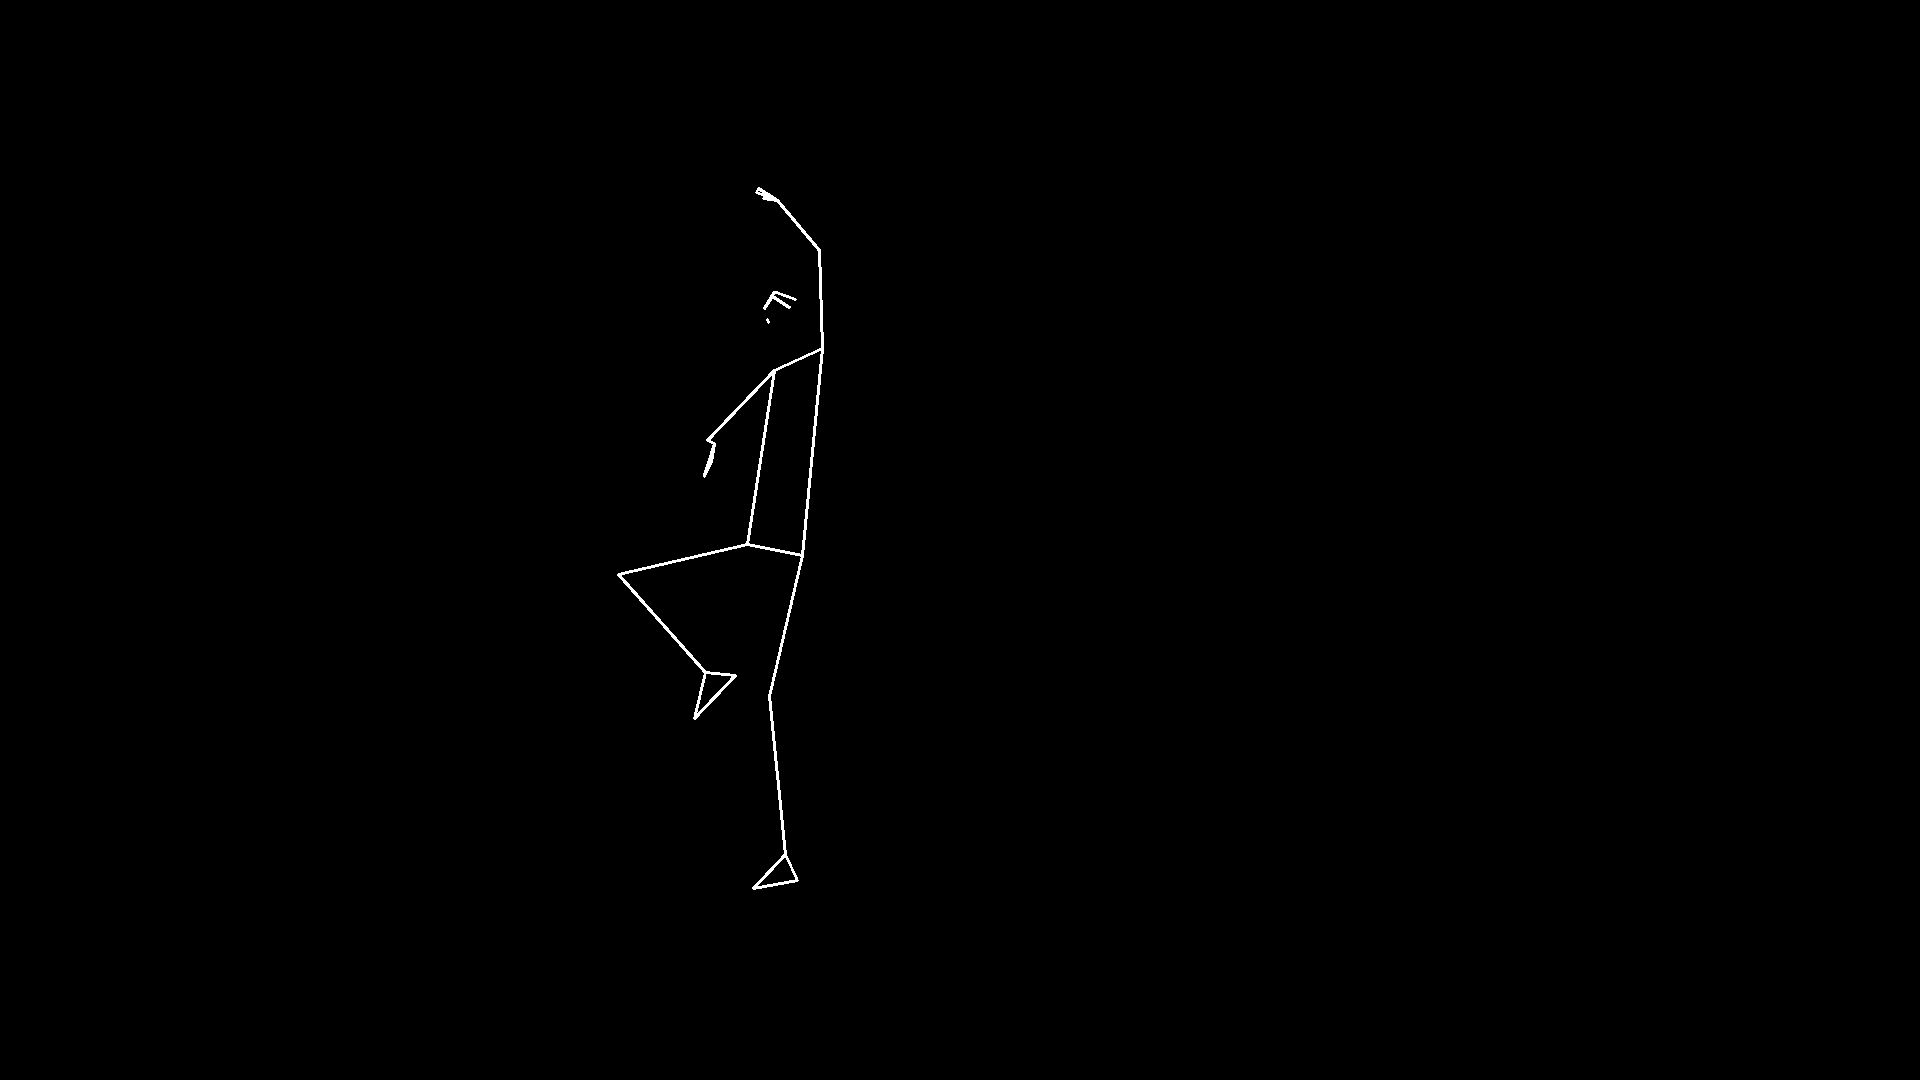

Processing frame 810


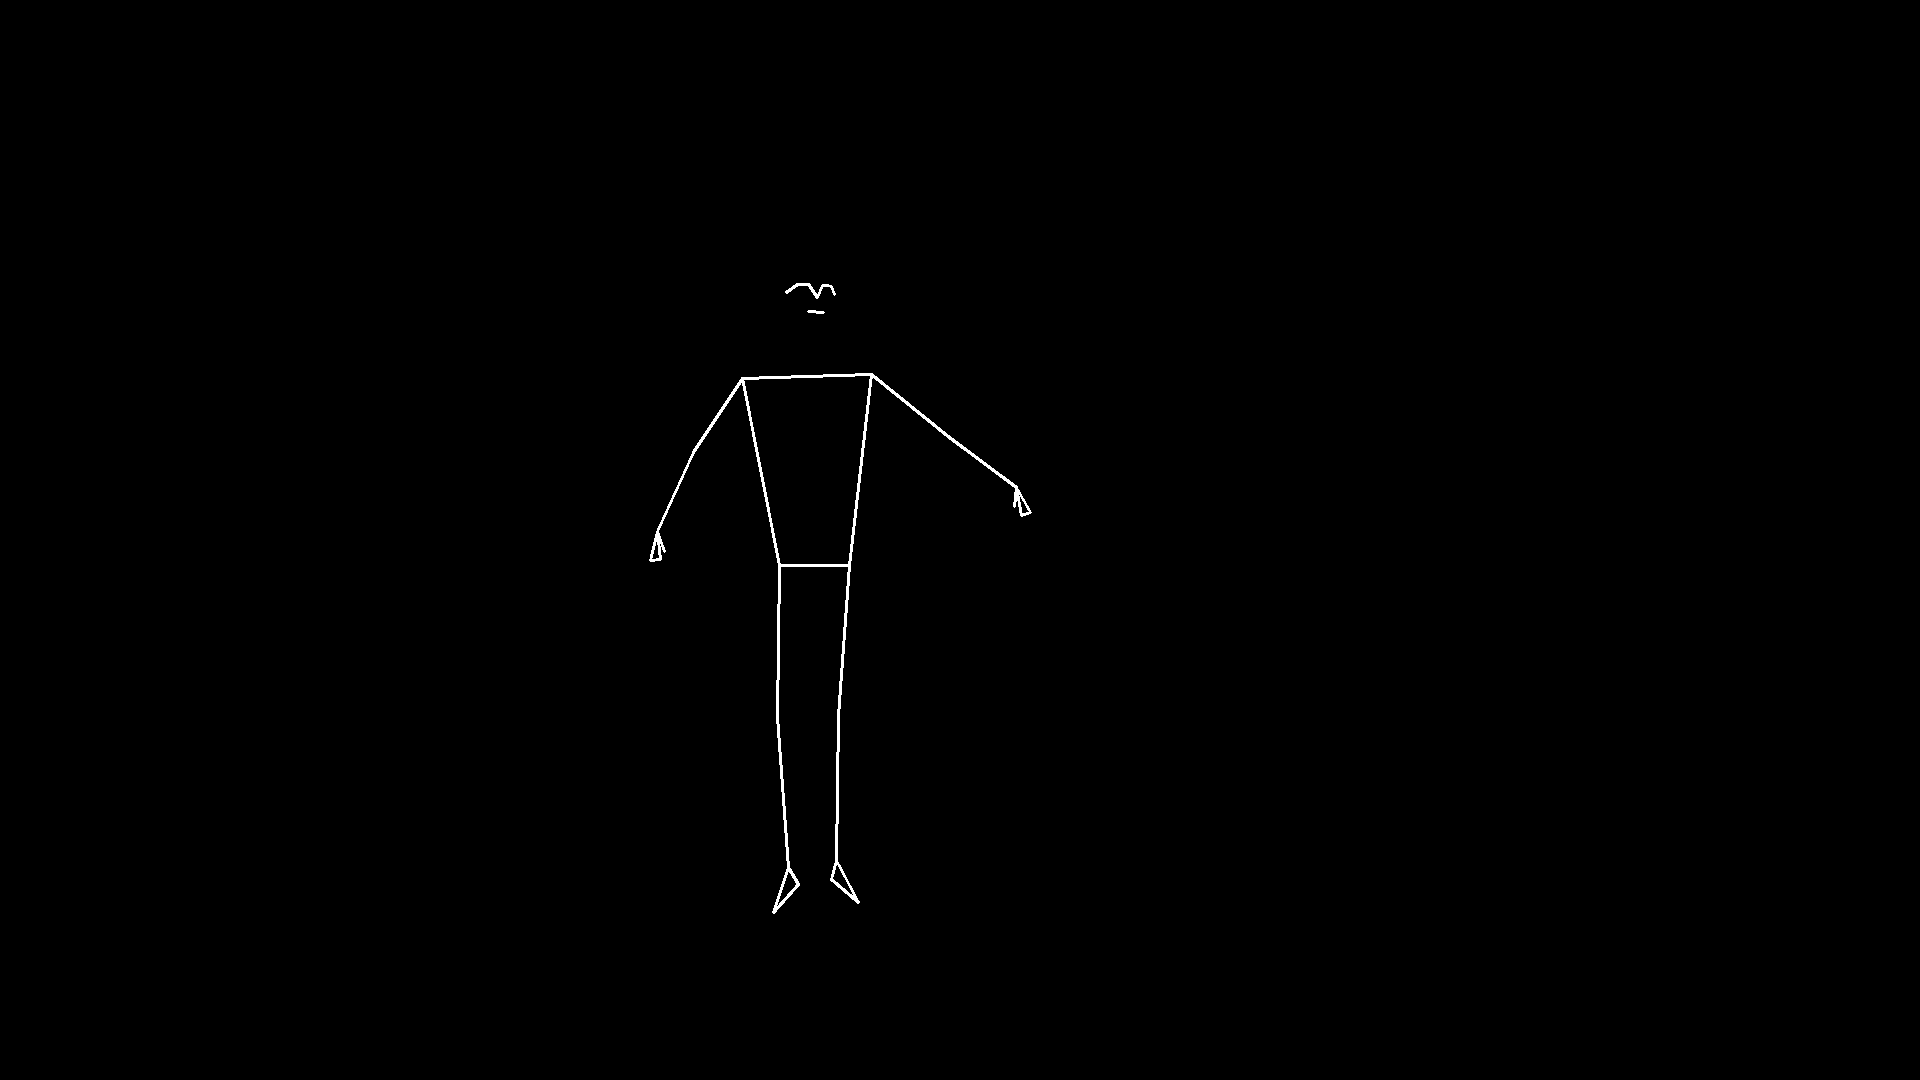

Processing frame 840


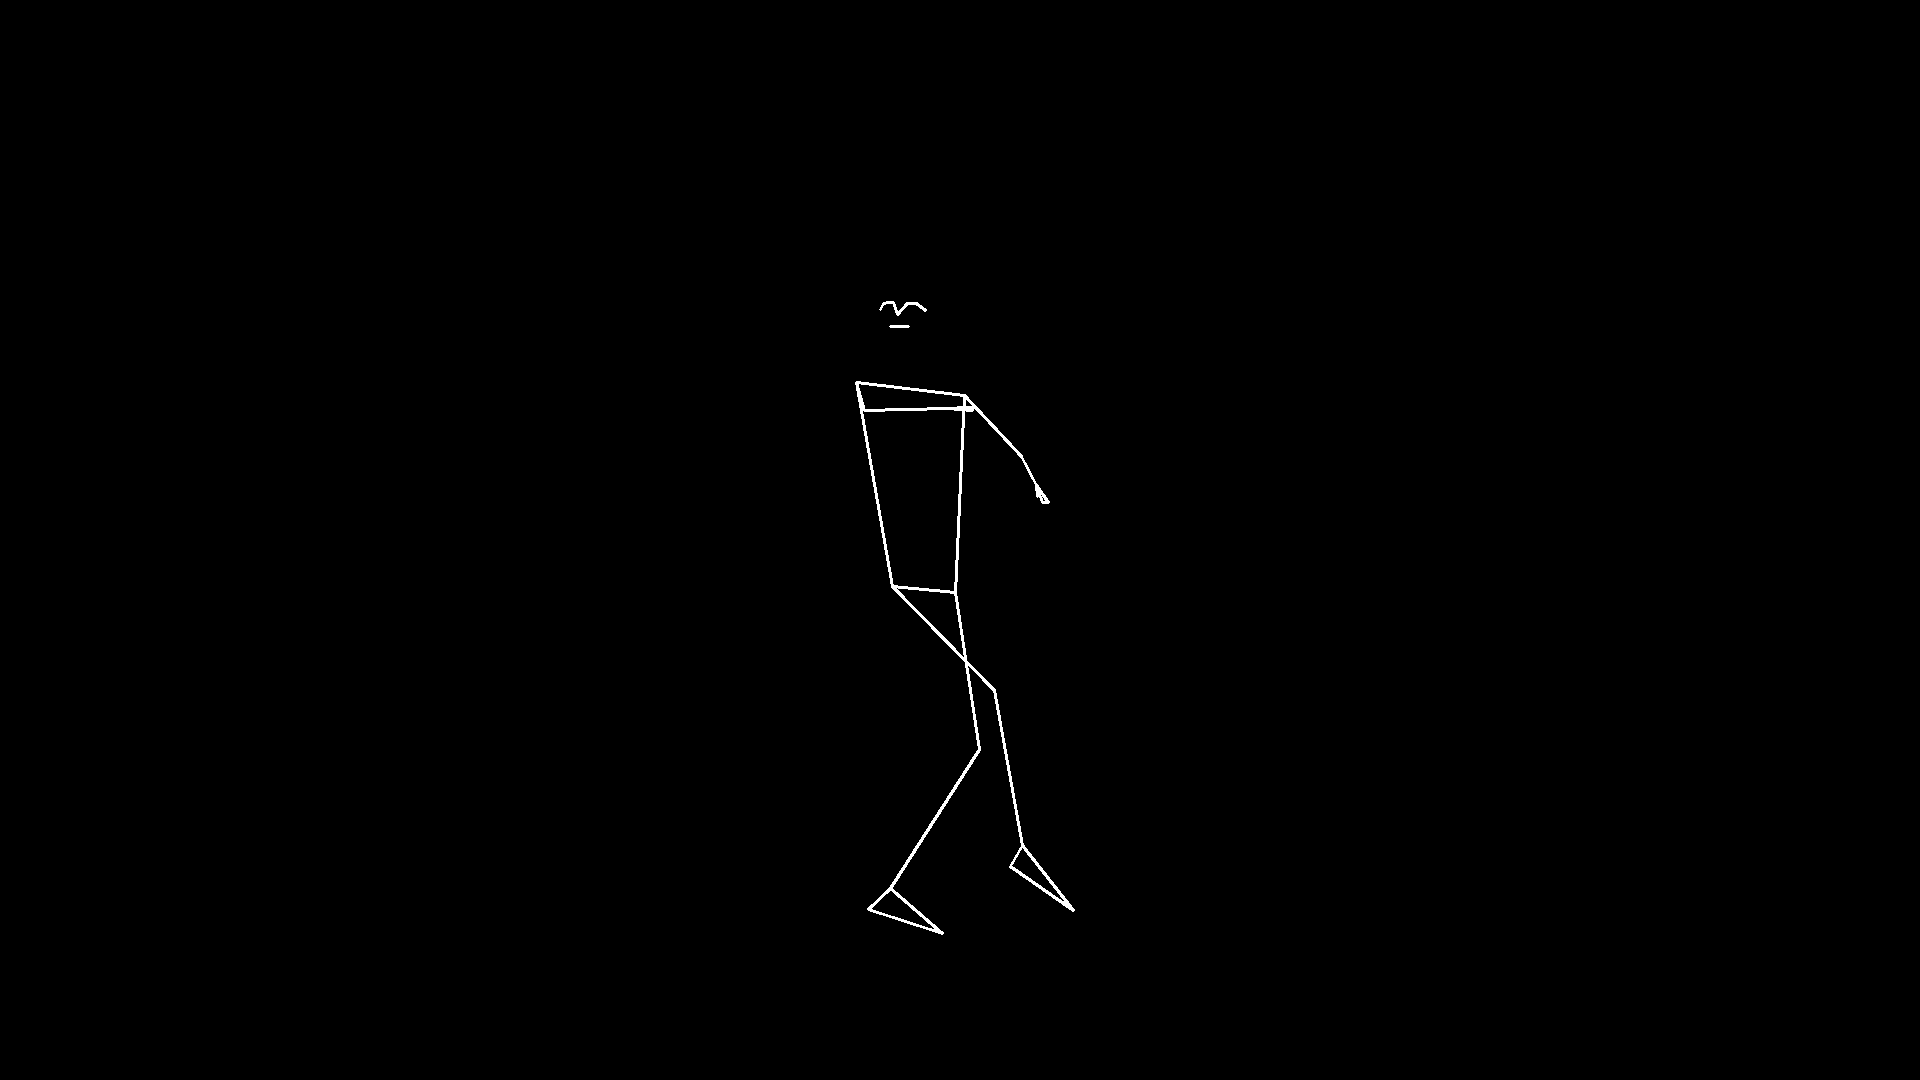

Processing frame 870


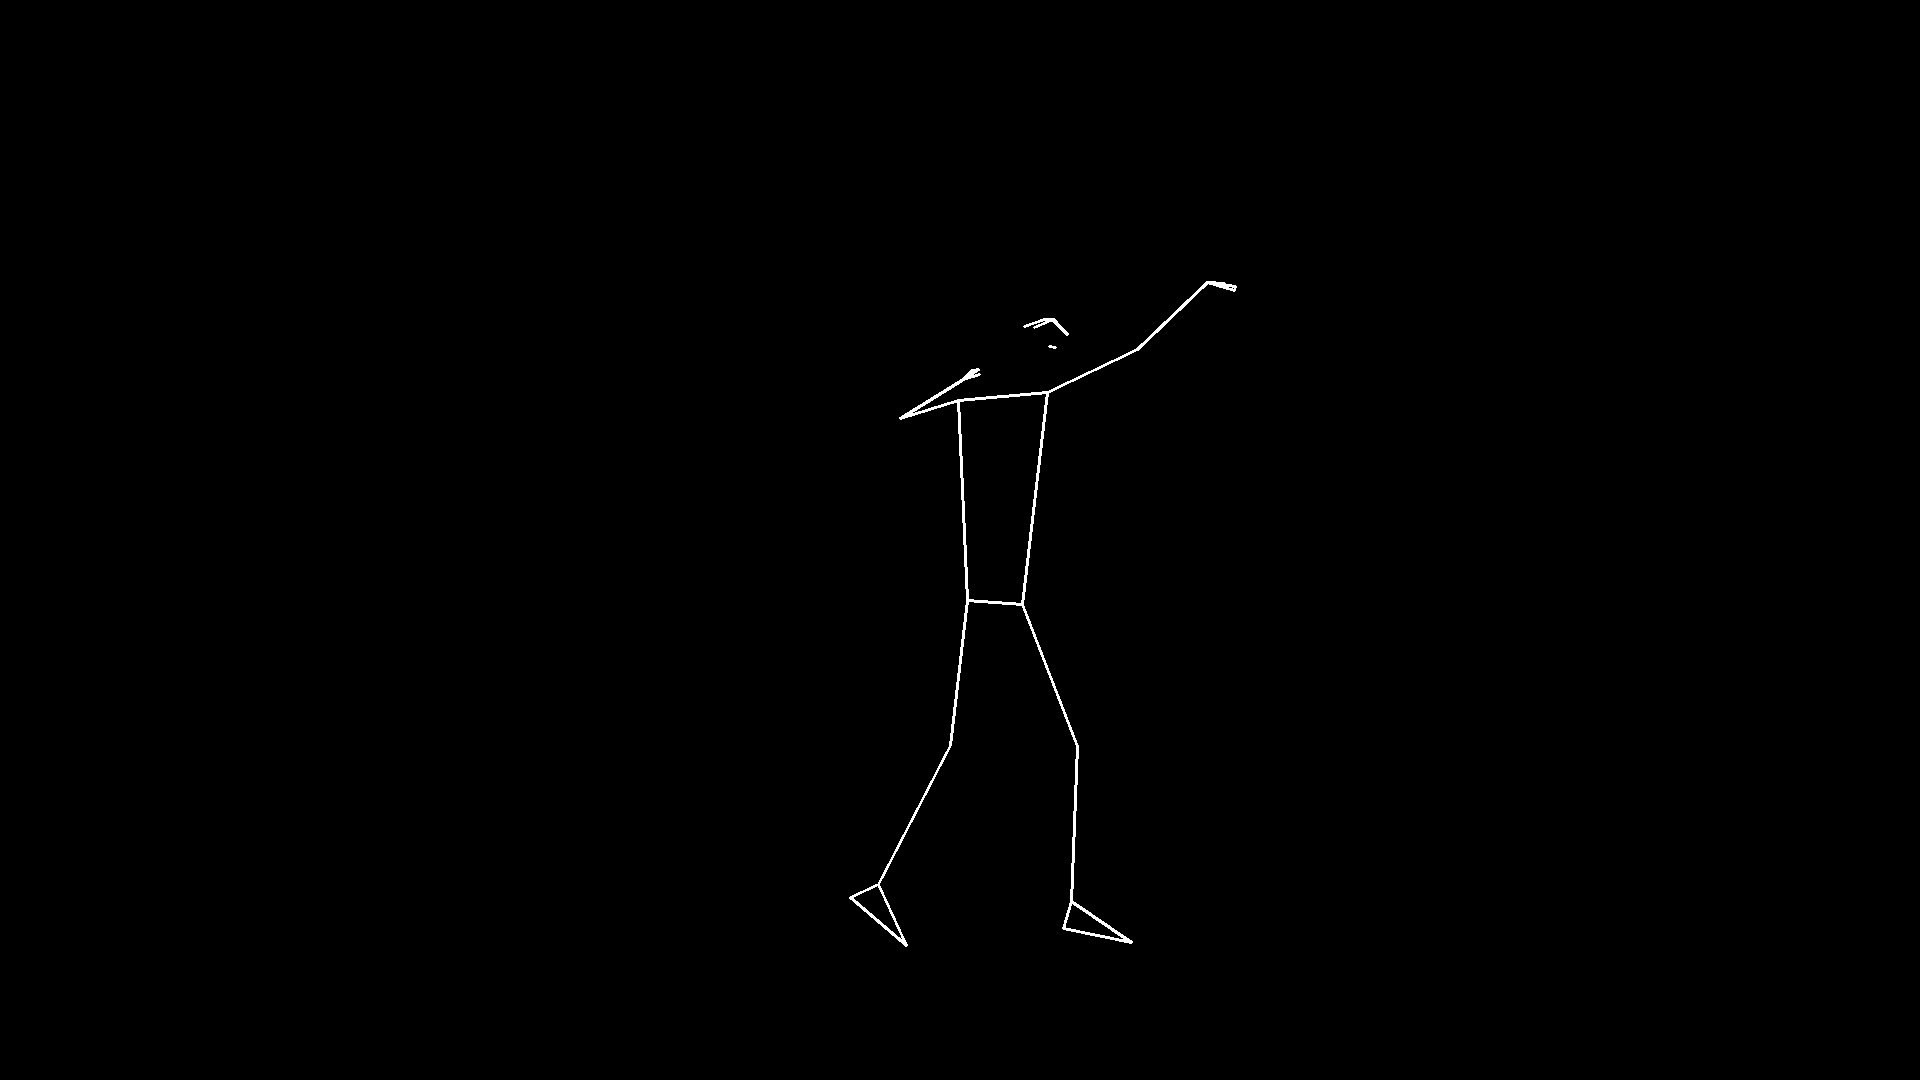

Processing frame 900


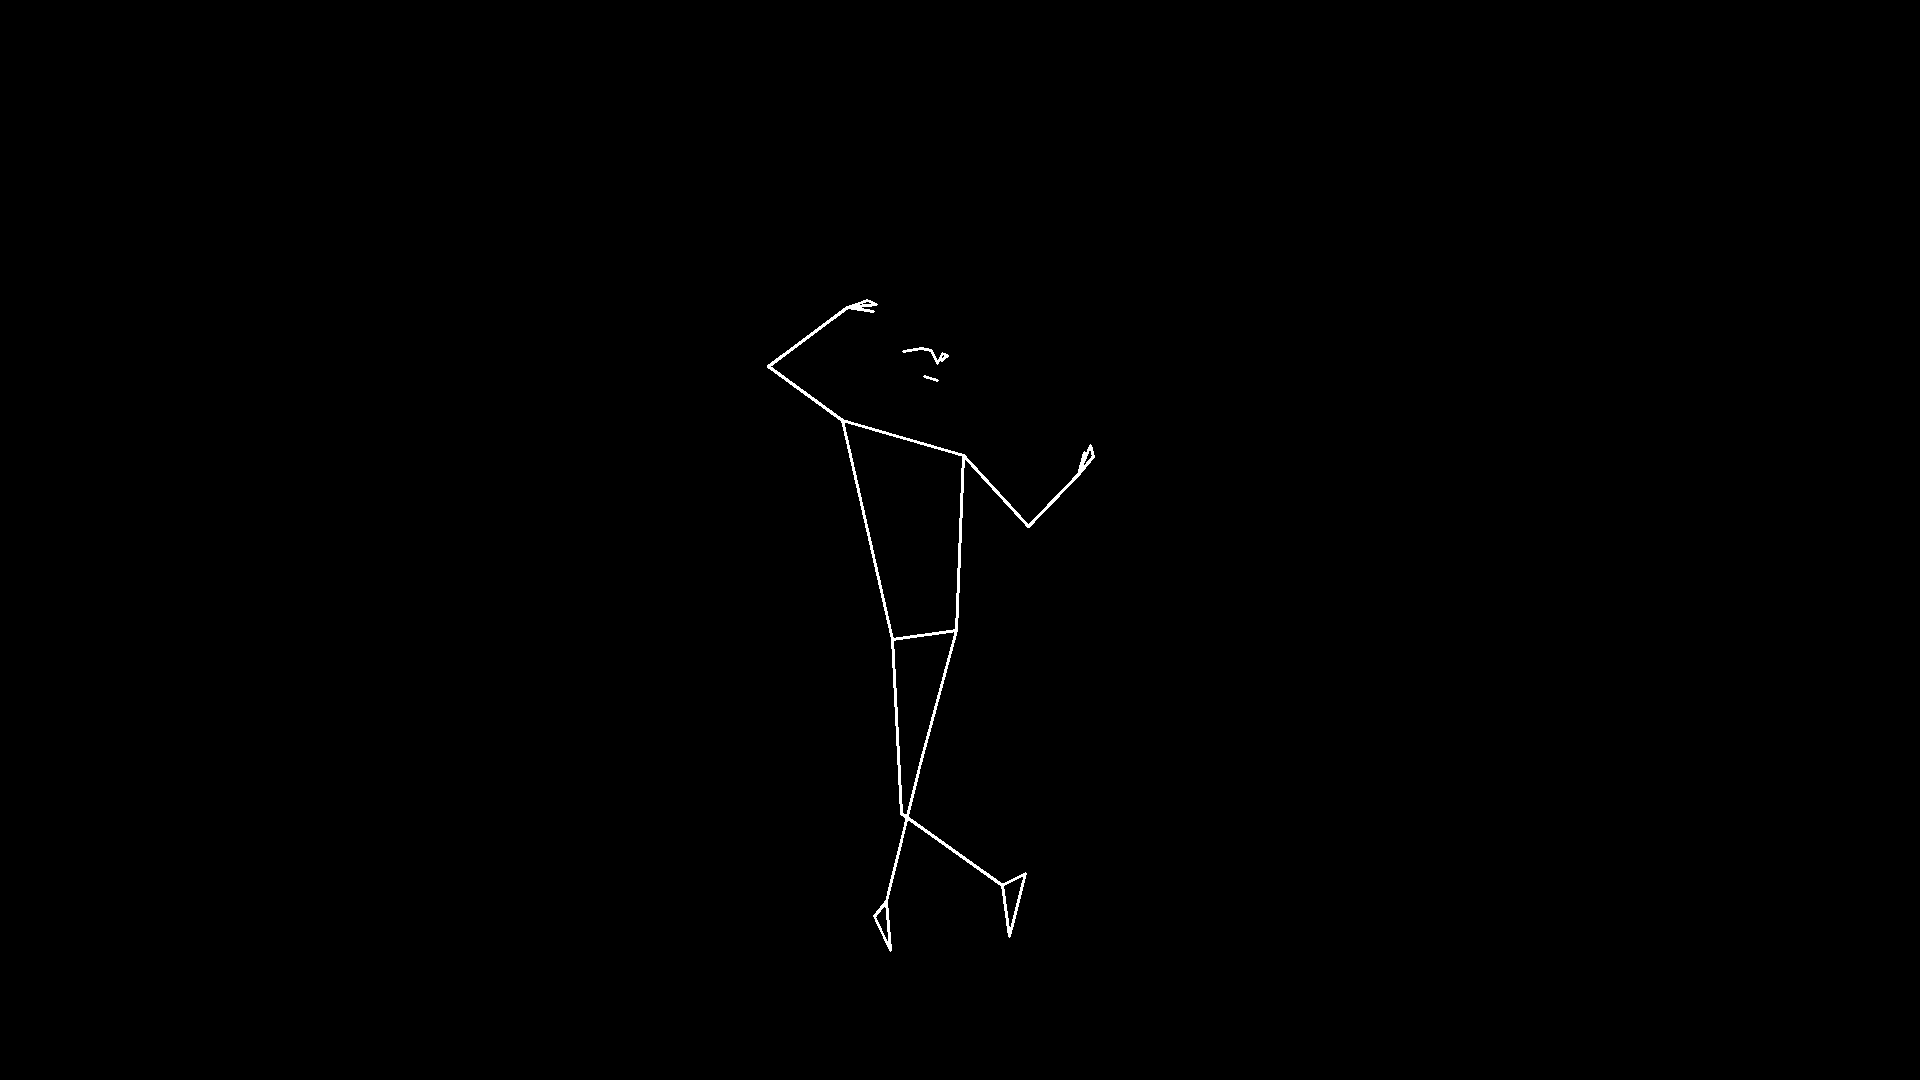

Processing frame 930


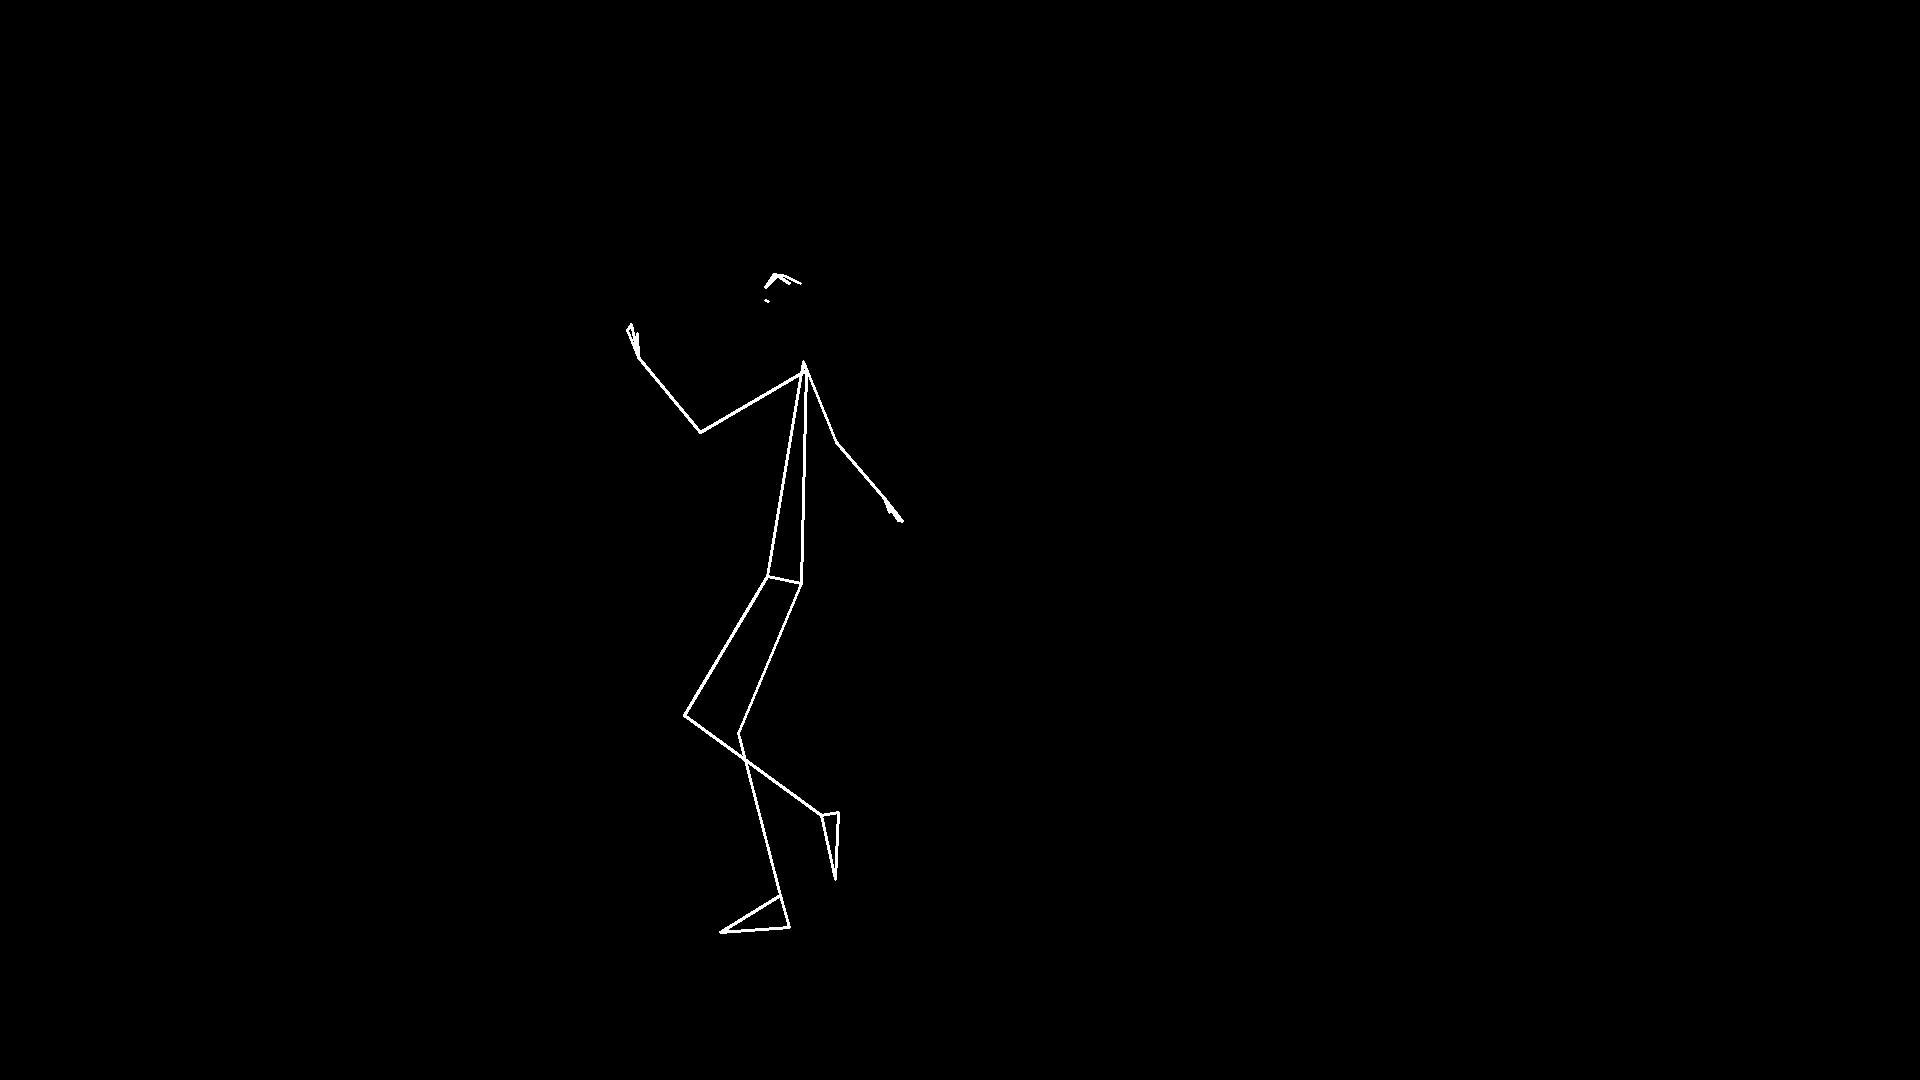

Processing frame 960


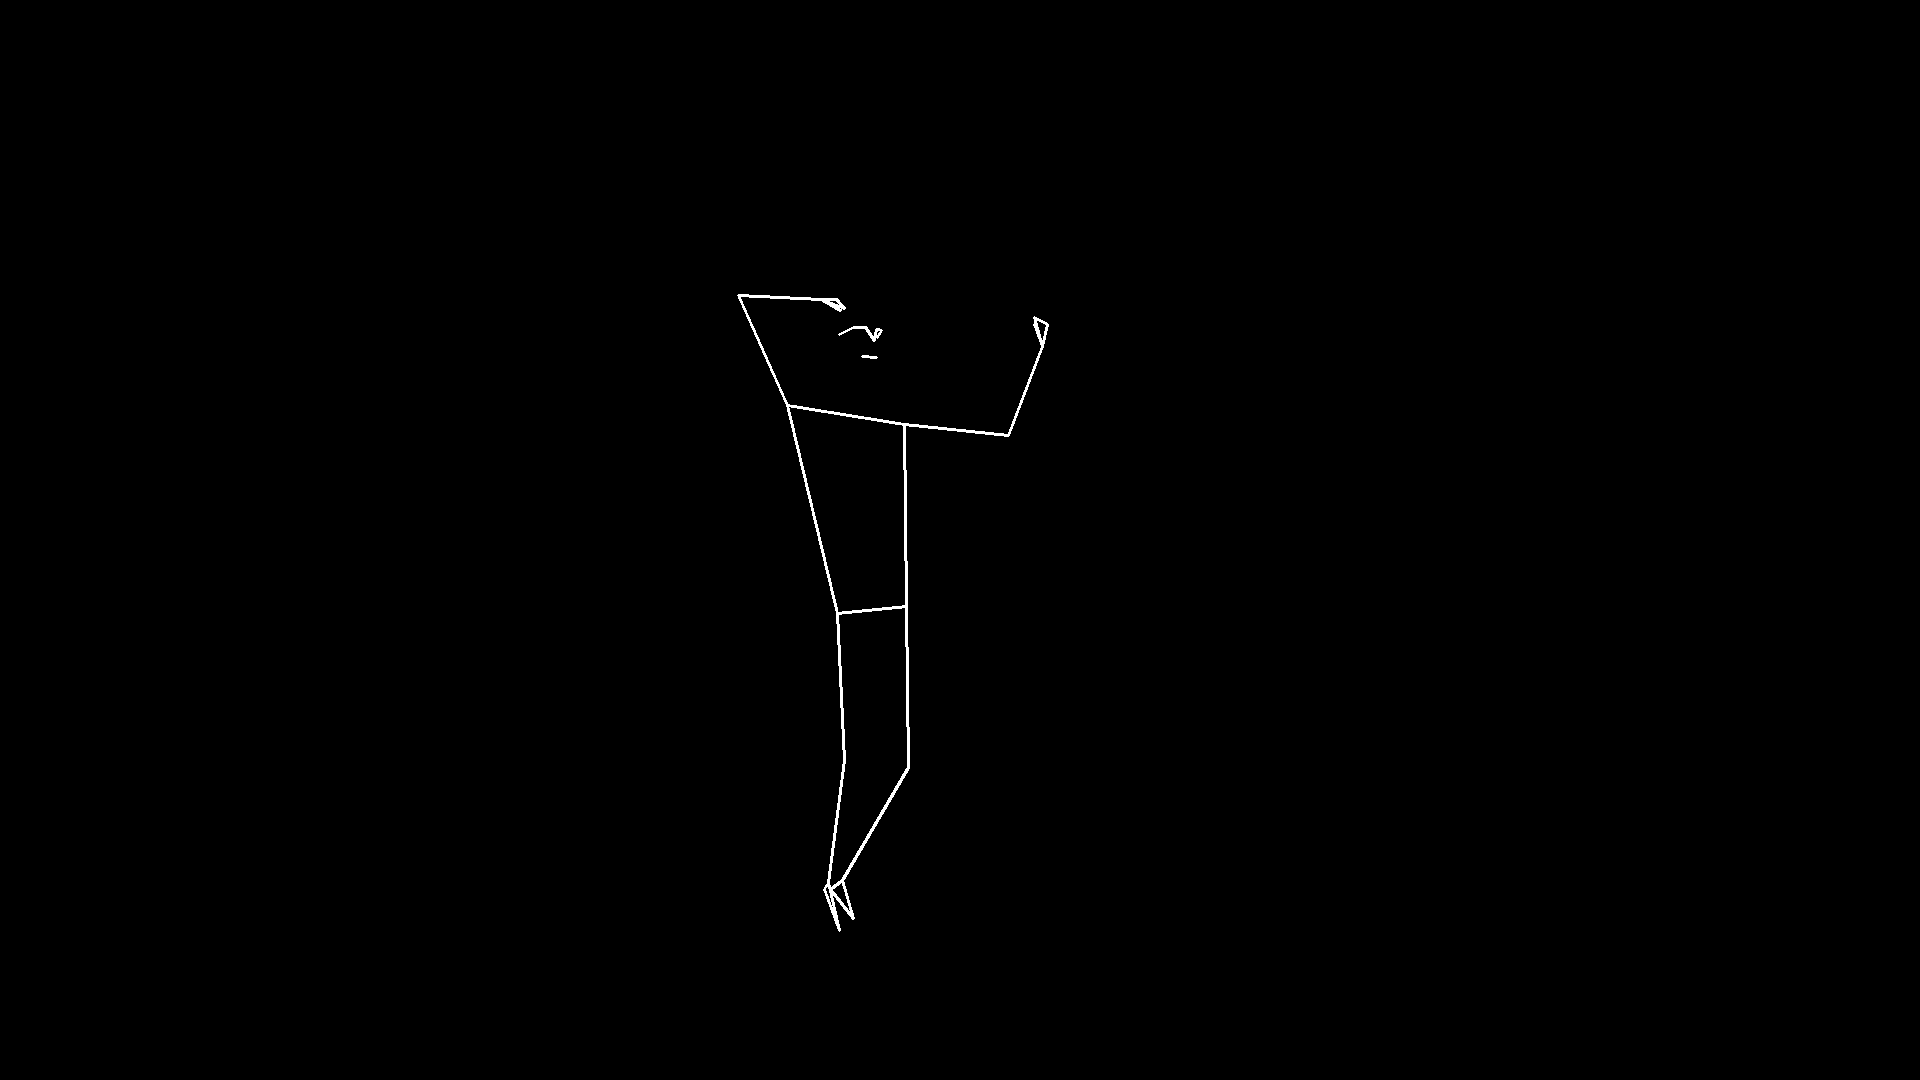

Processing frame 990
Video processing complete. Output saved to: /content/drive/MyDrive/output_stick_figure.mp4


In [ ]:
# Get video properties
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Video writer setup
output_path = '/content/drive/MyDrive/output_stick_figure.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# Function to draw stick figure
def draw_stick_figure(frame, landmarks):
    h, w, _ = frame.shape
    connections = mp_pose.POSE_CONNECTIONS

    # Create a black canvas
    canvas = np.zeros((h, w, 3), dtype=np.uint8)

    # Draw lines
    for connection in connections:
        start_idx = connection[0]
        end_idx = connection[1]

        if landmarks[start_idx].visibility > 0.5 and landmarks[end_idx].visibility > 0.5:
            start_point = (int(landmarks[start_idx].x * w), int(landmarks[start_idx].y * h))
            end_point = (int(landmarks[end_idx].x * w), int(landmarks[end_idx].y * h))
            cv2.line(canvas, start_point, end_point, (255, 255, 255), 2)

    return canvas

frame_count = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the BGR image to RGB
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the frame with MediaPipe
    results = pose.process(rgb_frame)

    if results.pose_landmarks:
        # Draw stick figure
        stick_figure = draw_stick_figure(frame, results.pose_landmarks.landmark)

        # Write the frame
        out.write(stick_figure)

        # Display every 30th frame (adjust as needed)
        if frame_count % 30 == 0:
            cv2_imshow(stick_figure)
            print(f"Processing frame {frame_count}")

    frame_count += 1

    # Break the loop if 'q' is pressed (note: this won't work in Colab)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
out.release()
cv2.destroyAllWindows()

print(f"Video processing complete. Output saved to: {output_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Shape of audio_features: (1, 75, 1193)
1/1 [==============================] - 1s 752ms/step
Shape of predictions: (1, 75, 20)
Shape of predictions after reshaping: (1, 750, 2)


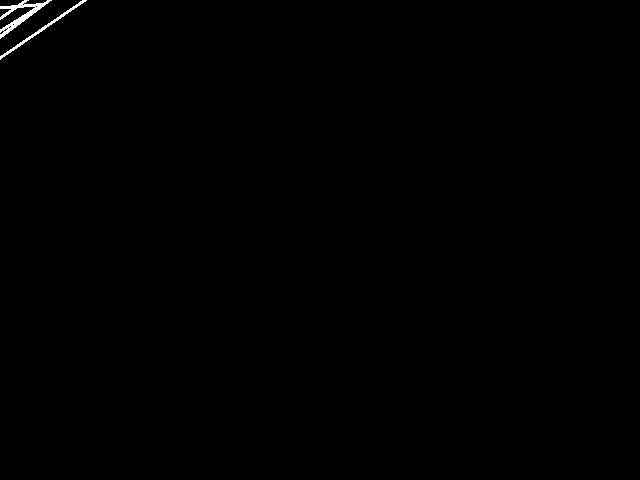

Processing frame 0
Video processing complete. Output saved to: /content/drive/MyDrive/output_stick_figure_odissi.mp4


In [ ]:
import numpy as np
import cv2
from tensorflow import keras
from google.colab.patches import cv2_imshow
from google.colab import drive
import librosa

# Mount Google Drive
drive.mount('/content/drive')

# Load the LSTM model
model_path = '/content/drive/MyDrive/odissi_dance.h5'
model = keras.models.load_model(model_path)

# Define the skeleton structure
joint_pairs = [(11, 13, 15), (12, 14, 16), (23, 25, 27), (24, 26, 28),
               (11, 23, 24), (12, 24, 23), (23, 11, 12), (24, 12, 11),
               (11, 12, 24), (12, 11, 23)]

def predict_joint_coordinates(audio_features):
    """Use the LSTM model to predict joint coordinates from audio features."""
    predictions = model.predict(audio_features)
    print(f"Shape of predictions: {predictions.shape}")

    # Reshape to (-1, 750, 2) instead of (-1, 33, 2)
    return predictions.reshape(-1, 750, 2)

def draw_stick_figure(joint_coords, frame_size=(640, 480)):
    """Draw a stick figure based on predicted joint coordinates"""
    canvas = np.zeros((frame_size[1], frame_size[0], 3), dtype=np.uint8)

    # Use only the first 33 joints (66 coordinates) for drawing
    scaled_coords = joint_coords[:33] * np.array([frame_size[0], frame_size[1]])

    for joint_set in joint_pairs:
        for i in range(len(joint_set) - 1):
            start = joint_set[i] - 1
            end = joint_set[i+1] - 1
            start_point = tuple(scaled_coords[start].astype(int))
            end_point = tuple(scaled_coords[end].astype(int))
            cv2.line(canvas, start_point, end_point, (255, 255, 255), 2)

    return canvas

def extract_audio_features(audio_path):
    """Extract audio features to match the expected input shape (None, 75, 1193)"""
    y, sr = librosa.load(audio_path)

    # Extract multiple features to reach 1193 dimensions
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    mel = librosa.feature.melspectrogram(y=y, sr=sr)
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    tonnetz = librosa.feature.tonnetz(y=y, sr=sr)

    # Concatenate all features
    features = np.concatenate([mfcc, chroma, mel, spectral_contrast, tonnetz], axis=0)

    # Ensure we have 1193 features
    if features.shape[0] < 1193:
        features = np.pad(features, ((0, 1193 - features.shape[0]), (0, 0)), mode='constant')
    elif features.shape[0] > 1193:
        features = features[:1193, :]

    # Transpose and add batch dimension
    features = features.T[np.newaxis, :, :]

    # Ensure we have 75 time steps
    if features.shape[1] < 75:
        features = np.pad(features, ((0, 0), (0, 75 - features.shape[1]), (0, 0)), mode='constant')
    elif features.shape[1] > 75:
        features = features[:, :75, :]

    return features

# Video writer setup
output_path = '/content/drive/MyDrive/output_stick_figure_odissi.mp4'
fourcc = cv2.VideoWriter_fourcc(*'H264')  # Updated codec

out = cv2.VideoWriter(output_path, fourcc, 30, (640, 480))

# Extract audio features from your input song
audio_path = '/content/drive/MyDrive/Output_Music/Shrita Kamala Kucha Mandala _ Sujata Mohapatra _ Remembering Guruji 2023-00.01.47.282-00.02.15.931-seg02.wav'
audio_features = extract_audio_features(audio_path)

print(f"Shape of audio_features: {audio_features.shape}")

# Generate stick figure dance
predictions = predict_joint_coordinates(audio_features)

print(f"Shape of predictions after reshaping: {predictions.shape}")

for i, coords in enumerate(predictions):
    stick_figure = draw_stick_figure(coords)
    out.write(stick_figure)

    if i % 30 == 0:  # Display every 30th frame
        cv2_imshow(stick_figure)
        print(f"Processing frame {i}")

out.release()
cv2.destroyAllWindows()

print(f"Video processing complete. Output saved to: {output_path}")


In [ ]:
!pip install tensorflow tensorflow-addons


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 16.3 MB/s eta 0:00:00


Model input shape: (None, 75, 1193)
Model output shape: (None, 75, 20)
Epoch 1/100
3/3 [==============================] - 23s 4s/step - loss: 3.8401 - val_loss: 1.2864
Epoch 2/100
3/3 [==============================] - 13s 4s/step - loss: 1.0346 - val_loss: 0.4004
Epoch 3/100
3/3 [==============================] - 13s 4s/step - loss: 0.6545 - val_loss: 0.3825
Epoch 4/100
3/3 [==============================] - 13s 4s/step - loss: 0.5893 - val_loss: 0.3490
Epoch 5/100
3/3 [==============================] - 14s 4s/step - loss: 0.5468 - val_loss: 0.3227
Epoch 6/100
3/3 [==============================] - 13s 4s/step - loss: 0.5334 - val_loss: 0.2964
Epoch 7/100
3/3 [==============================] - 14s 4s/step - loss: 0.5147 - val_loss: 0.2828
Epoch 8/100
3/3 [==============================] - 14s 4s/step - loss: 0.5056 - val_loss: 0.2831
Epoch 9/100
3/3 [==============================] - 14s 4s/step - loss: 0.4924 - val_loss: 0.2827
Epoch 10/100
3/3 [==============================] - 14s 

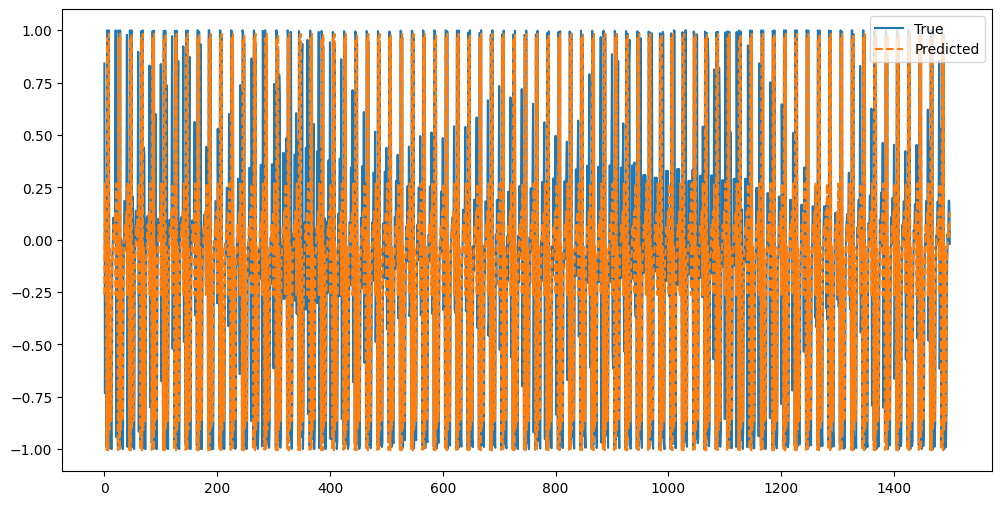

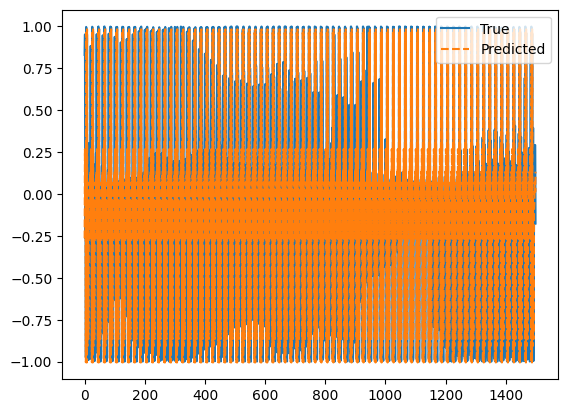

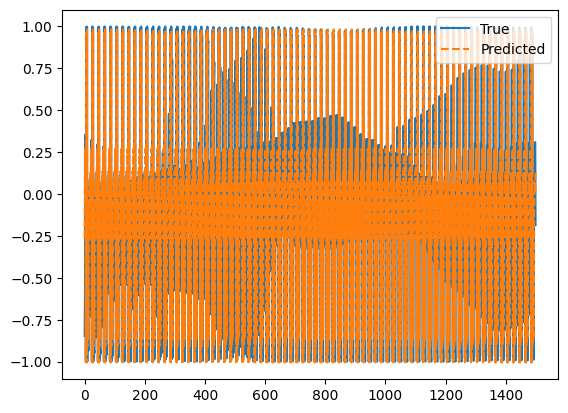

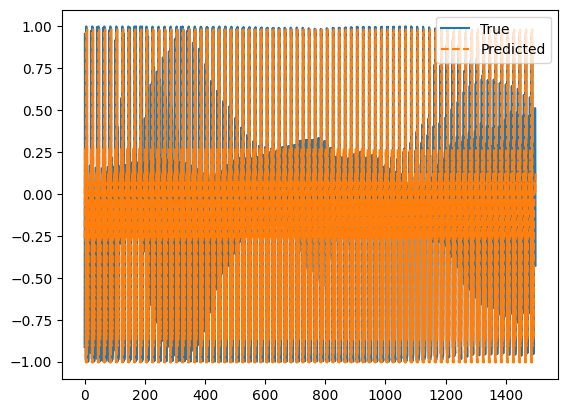

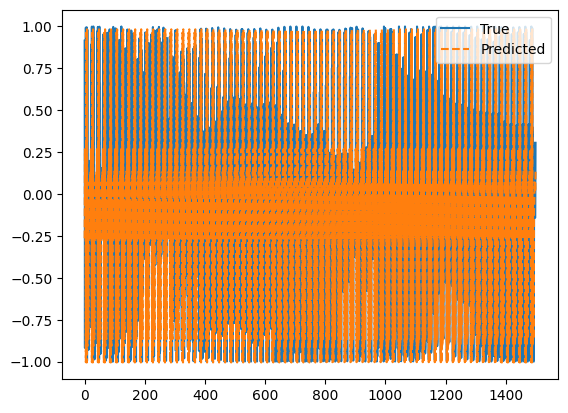

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow_addons as tfa

# Data Loading and Preprocessing functions remain the same

# Define Transformer model
def build_transformer_model(input_shape, output_shape, num_heads=8, ff_dim=512, num_layers=4, dropout_rate=0.1):
    inputs = keras.Input(shape=input_shape)

    x = layers.Dense(ff_dim, activation='relu')(inputs)
    x = layers.Dropout(dropout_rate)(x)

    # Encoder layers
    for _ in range(num_layers):
        x = layers.MultiHeadAttention(num_heads=num_heads, key_dim=ff_dim)(x, x)
        x = layers.Dropout(dropout_rate)(x)
        x = layers.LayerNormalization(epsilon=1e-6)(x)
        x = layers.Dense(ff_dim, activation='relu')(x)
        x = layers.Dropout(dropout_rate)(x)
        x = layers.LayerNormalization(epsilon=1e-6)(x)

    # Decoder
    x = layers.Dense(output_shape)(x)

    model = keras.Model(inputs=inputs, outputs=x)
    return model

# Define model parameters
input_shape = X.shape[1:]
output_shape = y.shape[2]

model = build_transformer_model(input_shape, output_shape)

print(f"Model input shape: {model.input_shape}")
print(f"Model output shape: {model.output_shape}")

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4), loss="mse")

# Training the model
history = model.fit(
    X_train, y_train,
    epochs=100,  # Reduced number of epochs for demonstration
    batch_size=64,
    validation_split=0.2
)

# Evaluation functions remain the same

predictions, mse_value, mae_value = evaluate_model(model, X_test, y_test)
plot_predictions(y_test, predictions)


In [ ]:
# Evaluate the final loss on the test set
final_loss = model.evaluate(X_test, y_test)
print(f"Final Test Loss: {final_loss}")

# Get validation metrics from the training history
val_mse = history.history['val_loss'][-1]
print(f"Validation MSE: {val_mse}")

# Calculate Mean Absolute Error (MAE) on the test set
from sklearn.metrics import mean_absolute_error

predictions = model.predict(X_test)
mae = mean_absolute_error(y_test.reshape(-1, y_test.shape[-1]), predictions.reshape(-1, predictions.shape[-1]))
print(f"Mean Absolute Error (MAE): {mae}")

2/2 [==============================] - 2s 409ms/step - loss: 0.2539
Final Test Loss: 0.2539040446281433
Validation MSE: 0.2702365219593048
2/2 [==============================] - 2s 400ms/step
Mean Absolute Error (MAE): 0.3024137606488707


In [ ]:
# Assuming 'model' is your trained model
model.save('/content/drive/MyDrive/odissi_dance2.h5')

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Load the model
model = keras.models.load_model('/content/drive/MyDrive/odissi_dance2.h5')

# Assume X_test is your input data for which you want predictions
# Replace X_test with your actual test data
X_test = np.random.rand(1, *input_shape)  # Example; replace with actual test data
predictions = model.predict(X_test)
print(predictions)


1/1 [==============================] - 0s 464ms/step
[[[-0.2633813   0.27195084 -0.06216842 ...  0.07289579  0.01212417
    0.12784371]
  [-0.2633813   0.2719509  -0.06216818 ...  0.07289573  0.01212411
    0.12784362]
  [-0.26338136  0.27195096 -0.06216818 ...  0.07289573  0.01212408
    0.12784362]
  ...
  [-0.26338065  0.2719518  -0.06216765 ...  0.07289588  0.01212363
    0.1278438 ]
  [-0.26338053  0.2719518  -0.06216801 ...  0.07289585  0.01212372
    0.1278438 ]
  [-0.26338047  0.2719519  -0.06216801 ...  0.07289603  0.01212381
    0.12784389]]]


In [ ]:
print(predictions.shape)  # Check the dimensions
#print(predictions)        # Print the predicted values
print(predictions[:, :])

(100, 10, 3)
[[[0.28588582 0.71191309 0.12963959]
  [0.12401127 0.56332519 0.0077224 ]
  [0.57358404 0.92542578 0.57318009]
  ...
  [0.57801011 0.74265812 0.66030988]
  [0.86235843 0.01758896 0.01710548]
  [0.25804938 0.89800094 0.03701777]]

 [[0.02321412 0.21355262 0.19517041]
  [0.47397677 0.27837811 0.80033401]
  [0.62401102 0.07571443 0.20591651]
  ...
  [0.13874644 0.24147513 0.75682467]
  [0.66941288 0.73958295 0.3684289 ]
  [0.56399381 0.1553992  0.90298601]]

 [[0.54283588 0.21274479 0.87342867]
  [0.02742109 0.65646763 0.40530158]
  [0.02068325 0.52588846 0.8915351 ]
  ...
  [0.05803591 0.09248842 0.4911972 ]
  [0.6928718  0.75471706 0.57265794]
  [0.298812   0.49882702 0.95948713]]

 ...

 [[0.7617389  0.83507298 0.25058067]
  [0.85441845 0.93195322 0.23354125]
  [0.26976925 0.06316438 0.60824489]
  ...
  [0.57795476 0.16056526 0.18561664]
  [0.0933837  0.09700511 0.29923786]
  [0.89920113 0.07485453 0.36457752]]

 [[0.02141619 0.50456212 0.88213653]
  [0.4252388  0.93168444

In [ ]:
print("Predictions shape:", predictions.shape)
print("Ground truth shape:", y_test.shape)


Predictions shape: (1, 75, 20)
Ground truth shape: (42, 75, 20)


In [ ]:
# Correct test data with 42 samples
X_test = np.random.rand(42, *input_shape)  # Replace with actual test data

# Predict
predictions = model.predict(X_test)
print("Predictions shape:", predictions.shape)

# Predictions should now match the shape of y_test


2/2 [==============================] - 2s 351ms/step
Predictions shape: (42, 75, 20)


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Flatten arrays to 2D
y_test_flat = y_test.reshape(-1, y_test.shape[-1])
predictions_flat = predictions.reshape(-1, predictions.shape[-1])

# If y_test and predictions only have a single sequence, use the following instead:
# y_test_flat = y_test.flatten()
# predictions_flat = predictions.flatten()

print("Flattened Ground Truth shape:", y_test_flat.shape)
print("Flattened Predictions shape:", predictions_flat.shape)

# Compute metrics
mse = mean_squared_error(y_test_flat, predictions_flat)
mae = mean_absolute_error(y_test_flat, predictions_flat)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Flattened Ground Truth shape: (3150, 20)
Flattened Predictions shape: (3150, 20)
Mean Squared Error: 0.2535357213042334
Mean Absolute Error: 0.30167897001532884


1/1 [==============================] - 0s 74ms/step


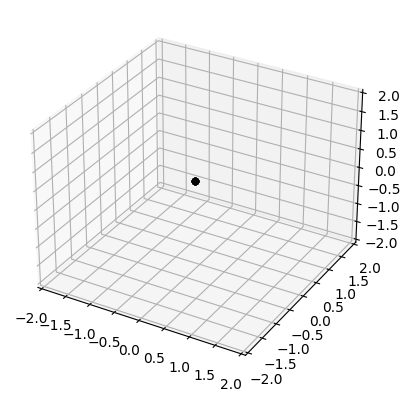

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FFMpegWriter
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf

# Load your TensorFlow model from the .h5 file
model = tf.keras.models.load_model('/content/drive/MyDrive/odissi_dance2.h5')

# Example function to convert model predictions to joint positions in 3D
def update_joint_positions(predictions):
    joint_positions = {
  11: (np.arcsin(predictions[0, 0]), np.arcsin(predictions[0, 1]), np.arcsin(predictions[0, 2])),
  12: (np.arcsin(predictions[1, 0]), np.arcsin(predictions[1, 1]), np.arcsin(predictions[1, 2])),
  13: (np.arcsin(predictions[2, 0]), np.arcsin(predictions[2, 1]), np.arcsin(predictions[2, 2])),
  14: (np.arcsin(predictions[3, 0]), np.arcsin(predictions[3, 1]), np.arcsin(predictions[3, 2])),
  15: (np.arcsin(predictions[4, 0]), np.arcsin(predictions[4, 1]), np.arcsin(predictions[4, 2])),
  16: (np.arcsin(predictions[5, 0]), np.arcsin(predictions[5, 1]), np.arcsin(predictions[5, 2])),
  23: (np.arcsin(predictions[6, 0]), np.arcsin(predictions[6, 1]), np.arcsin(predictions[6, 2])),
  24: (np.arcsin(predictions[7, 0]), np.arcsin(predictions[7, 1]), np.arcsin(predictions[7, 2])),
  25: (np.arcsin(predictions[8, 0]), np.arcsin(predictions[8, 1]), np.arcsin(predictions[8, 2])),
  26: (np.arcsin(predictions[9, 0]), np.arcsin(predictions[9, 1]), np.arcsin(predictions[9, 2])),
}

    return joint_positions

# Define bone pairs for the stick figure in 3D
bone_pairs = [
    (11, 12),
    (12, 13),
    (13, 14),
    (14, 15),
    (15, 16),
    (23, 24),
    (25, 26),
    # Add other bones as needed
]

def draw_stick_figure(ax, joints):
    ax.clear()
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_zlim(-2, 2)

    # Draw joints
    for joint in joints.values():
        ax.scatter(joint[0], joint[1], joint[2], c='black')

    # Draw bones
    for bone in bone_pairs:
        p1, p2 = bone
        if p1 in joints and p2 in joints:
            ax.plot([joints[p1][0], joints[p2][0]],
                    [joints[p1][1], joints[p2][1]],
                    [joints[p1][2], joints[p2][2]],
                    color='black')

def animate(frame):
    # Assuming X_test is your input data for which you want predictions
    # Replace X_test with your actual test data
    X_test = np.random.rand(1, 75, 1193)  # Example; replace with actual test data with shape (1, 75, 1193)
    predictions = model.predict(X_test)

    joints = update_joint_positions(predictions[0])
    draw_stick_figure(ax, joints)
    return ax,

# Example predictions shape (num_frames, num_joints, 3)
# Ensure that predictions has shape (num_frames, num_joints, 3)
predictions = np.random.rand(100, 10, 3)  # Replace with your actual predictions

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ani = animation.FuncAnimation(
    fig, animate, frames=len(predictions), repeat=False, interval=50
)

# Save the animation as a video file
writer = FFMpegWriter(fps=20)
ani.save('3d_stick_figure_animation.mp4', writer=writer)

plt.show()
